In [1]:
# Import Python packages
import math
import sympy as sm
from sympy import *
import numpy as np
from numpy import *
from fractions import Fraction
import matplotlib.pyplot as plt

Generate random data as $n_{xxxx}, n_{xxxy}, n_{xxyx}, n_{xyxx}, n_{xxyy}, n_{xyxy}, n_{xyyx}, n_{xyyy}$
---------------------

In [3]:
h1_range = np.linspace(0, 1, num=50)  # 0 <= h1 <= 1
K = 1000 #TODO
data = np.zeros((50,K,8)) # Make a 100 by K by 8 array

for i in range(50):
    h1 = h1_range[i]  # θ1
    h2 = 0.9          # θ2
    h3 = 0.9          # θ3
    # h5 = 0.5        # θ5
    
    p_xxxx = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxxy = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxyx = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxx = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xxyy = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxy = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xyyx = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)
    p_xyyy = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)

    # 1000 trials
    data[i] = np.random.multinomial(1000, [p_xxxx]*1 + [p_xxxy]*1 + [p_xxyx]*1 + [p_xyxx]*1 + [p_xxyy]*1 + [p_xyxy]*1 + [p_xyyx]*1 + [p_xyyy]*1, size=K)
print(data)

[[[218. 224.  26. ...  19. 224. 251.]
  [228. 227.  16. ...  19. 229. 226.]
  [240. 224.  20. ...  28. 221. 220.]
  ...
  [223. 239.  20. ...  16. 248. 200.]
  [205. 231.  19. ...  21. 244. 237.]
  [226. 259.  25. ...  36. 204. 210.]]

 [[247. 222.  23. ...  19. 216. 224.]
  [238. 218.  33. ...  21. 206. 232.]
  [222. 199.  28. ...  21. 238. 253.]
  ...
  [245. 222.  21. ...  30. 208. 227.]
  [243. 233.  25. ...  17. 211. 216.]
  [247. 224.  24. ...  18. 224. 214.]]

 [[234. 262.  22. ...  27. 202. 202.]
  [240. 243.  24. ...  26. 220. 213.]
  [208. 228.  26. ...  21. 231. 227.]
  ...
  [238. 248.  23. ...  24. 202. 220.]
  [243. 221.  34. ...  22. 229. 209.]
  [210. 240.  24. ...  30. 213. 238.]]

 ...

 [[428. 470.  23. ...  23.   8.  14.]
  [422. 468.  19. ...  17.   9.  16.]
  [444. 446.  21. ...  29.  13.   9.]
  ...
  [411. 489.  23. ...  27.   6.  10.]
  [446. 429.  28. ...  21.  14.  14.]
  [487. 401.  22. ...  18.  21.   6.]]

 [[443. 456.  16. ...  19.   6.   7.]
  [456. 443.

Find $θ$ and $δ$ that achieves the maximum likelihood
---------------------

In [4]:
# Reference: https://en.wikipedia.org/wiki/Newton%27s_method
def newtons_method(
    x0,               # The initial guess
    f,                # The function whose root we are trying to find
    f_prime,          # The derivative of the function
    tolerance,        # 7-digit accuracy is desired
    epsilon,          # Do not divide by a number smaller than this
    max_iterations,   # The maximum number of iterations to execute
    ):
    for i in range(max_iterations):
        y = f(x0)
        yprime = f_prime(x0)

        if abs(yprime) < epsilon:       # Stop if the denominator is too small
            break

        x1 = x0 - y / yprime            # Do Newton's computation

        if abs(x1 - x0) <= tolerance:   # Stop when the result is within the desired tolerance
            return x1                   # x1 is a solution within tolerance and maximum number of iterations

        x0 = x1                         # Update x0 to start the process again

    return None                         # Newton's method did not converge


In [5]:
# case 1: 
# Notations to simplify expressions
def expr1_A(h1, h, h3, t):
    return h1*(t/h) + h + h3*(t/h) + h1*h*h3

def expr1_B(h1, h, h3, t):
    return h1*(t/h) + h - h3*(t/h) - h1*h*h3

def expr1_C(h1, h, h3, t):
    return h1*(t/h) - h + h3*(t/h) - h1*h*h3

def expr1_D(h1, h, h3, t):
    return h1*(t/h) - h - h3*(t/h) + h1*h*h3

def expr1_P(h1, h, h3, t):
    return 1 + h1*t + h1*h3 + t*h3

def expr1_Q(h1, h, h3, t):
    return 1 + h1*t - h1*h3 - t*h3

def expr1_R(h1, h, h3, t):
    return 1 - h1*t + h1*h3 - t*h3

def expr1_S(h1, h, h3, t):
    return 1 - h1*t - h1*h3 + t*h3

In [6]:
# case 2:
# Notations to simplify expressions
def expr2_A(h1, h, h2, t):
    return h1*(t/h) + h + h2*(t/h) + h1*h*h2

def expr2_B(h1, h, h2, t):
    return h1*(t/h) - h + h2*(t/h) - h1*h*h2

def expr2_C(h1, h, h2, t):
    return h1*(t/h) + h - h2*(t/h) - h1*h*h2

def expr2_D(h1, h, h2, t):
    return h1*(t/h) - h - h2*(t/h) + h1*h*h2

def expr2_P(h1, h, h2, t):
    return 1 + h1*t + h1*h2 + t*h2

def expr2_Q(h1, h, h2, t):
    return 1 - h1*t + h1*h2 - t*h2

def expr2_R(h1, h, h2, t):
    return 1 + h1*t - h1*h2 - t*h2

def expr2_S(h1, h, h2, t):
    return 1 - h1*t - h1*h2 + t*h2

In [7]:
# case 3:
# Notations to simplify expressions
def expr3_A(h3, h, h2, t):
    return h2*(t/h) + h + h3*(t/h) + h*h2*h3

def expr3_B(h3, h, h2, t):
    return h2*(t/h) + h - h3*(t/h) - h*h2*h3

def expr3_C(h3, h, h2, t):
    return h2*(t/h) - h - h3*(t/h) + h*h2*h3

def expr3_D(h3, h, h2, t):
    return h2*(t/h) - h + h3*(t/h) - h*h2*h3

def expr3_P(h3, h, h2, t):
    return 1 + h2*t + h2*h3 + t*h3

def expr3_Q(h3, h, h2, t):
    return 1 + h2*t - h2*h3 - t*h3

def expr3_R(h3, h, h2, t):
    return 1 - h2*t - h2*h3 + t*h3

def expr3_S(h3, h, h2, t):
    return 1 - h2*t + h2*h3 - t*h3

In [8]:
# case 1:
theta_2 = [] 
for i in range(50):
    theta_2.append([])
theta_2_unique = []
for i in range(50):
    theta_2_unique.append([])
theta_2_mult = []

# case 2:
theta_3 = [] 
for i in range(50):
    theta_3.append([])
theta_3_unique = []
for i in range(50):
    theta_3_unique.append([])
theta_3_mult = []

# case 3:
theta_1 = [] 
for i in range(50):
    theta_1.append([])
theta_1_unique = []
for i in range(50):
    theta_1_unique.append([])
theta_1_mult = []

cnt_0 = [0 for element in range(50)]     # number of times delta = 0
cnt_1 = [0 for element in range(50)]     # number of times branch 1 was chosen
cnt_2 = [0 for element in range(50)]     # number of times branch 2 was chosen
cnt_3 = [0 for element in range(50)]     # number of times branch 3 was chosen
cnt_4 = [0 for element in range(50)]     # number of times star wins

temp = 0

In [9]:
array = np.linspace(0.25, 1, num=100)  # τ < θ < 1
init = 0.05
tolerance = 0.0001
epsilon = 0.001
max_iterations = 10000

for u in range(50):
    for j in range(K):
        y1 = []          # δ (case 1)
        y2 = []          # δ (case 2)
        y3 = []          # δ (case 3)
        z1 = []          # log likelihood (case 1)
        z2 = []          # log likelihood (case 2)
        z3 = []          # log likelihood (case 3)
        A = data[u][j][0]
        B = data[u][j][1]
        C = data[u][j][2]
        D = data[u][j][3]
        E = data[u][j][4]
        F = data[u][j][5]
        G = data[u][j][6]
        H = data[u][j][7]
        t = 0.25         # τ
        h1 = 0.5         # θ_1
        h2 = 0.5         # θ_2
        h3 = 0.5         # θ_3
        d = symbols('d') # δ

        # case 1:
        # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
        for h in array:
            # the first derivative of the log likelihood function
            def f(d):
                return A*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d) - B*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d) + C*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d) - E*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d) + D*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d) - F*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d) + G*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d) - H*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d)

            # the second derivative of the log likelihood function
            def f_prime(d):
                return -A*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d),2) - B*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d),2) - C*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d),2) - E*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d),2) - D*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d),2) - F*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d),2) - G*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d),2) - H*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d),2)

            sol_1 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
            y1.append(sol_1)

        # Compute log likelihood using δ obtained above
        for i in range(100):
            if y1[i] <= 0:
                d = 0
                y1[i] = 0 
            elif y1[i] >= 1:
                d = 1
                y1[i] = 1
            else:
                d = y1[i]

            h = array[i]

            # the log likelihood function
            expr_1 = A*math.log(1 + h1*t + h1*h3 + h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h1*h*h3*d, 2) + B*math.log(1 + h1*t + h1*h3 - h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h1*h*h3*d, 2) + C*math.log(1 + h1*t - h1*h3 + h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h1*h*h3*d, 2) + D*math.log(1 - h1*t + h1*h3 + h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h1*h*h3*d, 2) + E*math.log(1 + h1*t - h1*h3 - h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h1*h*h3*d, 2) + F*math.log(1 - h1*t + h1*h3 - h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h1*h*h3*d, 2) + G*math.log(1 - h1*t - h1*h3 + h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h1*h*h3*d, 2) + H*math.log(1 - h1*t - h1*h3 - h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h1*h*h3*d, 2)

            z1.append(expr_1)

        max_likelihood_1 = max(z1)

        # case 2:
        # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
        for h in array:
            # the first derivative of the log likelihood function
            def f(d):
                return A*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d) - B*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d) + C*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d) - E*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d) + D*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d) - F*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d) + G*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d) - H*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d)

            # the second derivative of the log likelihood function
            def f_prime(d):
                return -A*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d),2) - B*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d),2) - C*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d),2) - E*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d),2) - D*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d),2) - F*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d),2) - G*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d),2) - H*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d),2)

            sol_2 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
            y2.append(sol_2)

        # Compute log likelihood using δ obtained above
        for i in range(100):
            if y2[i] <= 0:
                d = 0
                y2[i] = 0 
            elif y2[i] >= 1:
                d = 1
                y2[i] = 1
            else:
                d = y2[i]

            h = array[i]

            # the log likelihood function
            expr_2 = A*math.log(1 + h1*t + h1*h2 + h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d + h1*h*h2*d, 2) + B*math.log(1 + h1*t + h1*h2 - h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d - h1*h*h2*d, 2) + C*math.log(1 - h1*t + h1*h2 + h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d - h1*h*h2*d, 2) + D*math.log(1 + h1*t - h1*h2 + h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d - h1*h*h2*d, 2) + E*math.log(1 - h1*t + h1*h2 - h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d + h1*h*h2*d, 2) + F*math.log(1 + h1*t - h1*h2 - h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d + h1*h*h2*d, 2) + G*math.log(1 - h1*t - h1*h2 + h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d + h1*h*h2*d, 2) + H*math.log(1 - h1*t - h1*h2 - h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d - h1*h*h2*d, 2)

            z2.append(expr_2)

        max_likelihood_2 = max(z2)

        # case 3:
        # Solve expr_1 = 0 and get a list of δ corresponding to each θ_1
        for h in array:
            # the first derivative of the log likelihood function
            def f(d):
                return A*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d) - B*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d) + C*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d) - E*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d) + F*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d) - D*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d) + H*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d) - G*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d)

            # the second derivative of the log likelihood function
            def f_prime(d):
                return -A*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d),2) - B*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d),2) - C*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d),2) - E*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d),2) - F*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d),2) - D*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d),2) - H*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d),2) - G*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d),2)

            sol_3 = newtons_method(init, f, f_prime, tolerance, epsilon, max_iterations)
            y3.append(sol_3)

        # Compute log likelihood using δ obtained above
        for i in range(100):
            if y3[i] <= 0:
                d = 0
                y3[i] = 0 
            elif y3[i] >= 1:
                d = 1
                y3[i] = 1
            else:
                d = y3[i]

            h = array[i]

            # the log likelihood function
            expr_3 = A*math.log(1 + h2*t + h2*h3 + h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h3*h*h2*d, 2) + B*math.log(1 + h2*t + h2*h3 - h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h3*h*h2*d, 2) + C*math.log(1 + h2*t - h2*h3 + h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h3*h*h2*d, 2) + D*math.log(1 - h2*t - h2*h3 - h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h3*h*h2*d, 2) + E*math.log(1 + h2*t - h2*h3 - h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h3*h*h2*d, 2) + F*math.log(1 - h2*t - h2*h3 + h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h3*h*h2*d, 2) + G*math.log(1 - h2*t + h2*h3 - h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h3*h*h2*d, 2) + H*math.log(1 - h2*t + h2*h3 + h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h3*h*h2*d, 2)

            z3.append(expr_3)

        max_likelihood_3 = max(z3)

        max_likelihood = max(max_likelihood_1, max_likelihood_2, max_likelihood_3)
        print(max_likelihood_1, max_likelihood_2, max_likelihood_3)
        if max_likelihood == max_likelihood_1:
            for k in range(100):
                if max_likelihood == z1[k]:
                    theta_2[u].append(array[k])
                    if y1[k] != 0 and array[k] != t:
                        cnt_1[u] += 1
                        theta_2_unique[u].append(array[k])
                    if y1[k] == 0: # delta = 0
                        cnt_0[u] += 1
                        if array[k] != t:
                            temp += 1
                    if array[k] == t:
                        cnt_4[u] += 1
                    break
        elif max_likelihood == max_likelihood_2:
            for k in range(100):
                if max_likelihood == z2[k]:
                    theta_3[u].append(array[k])
                    if y2[k] != 0 and array[k] != t:
                        cnt_2[u] += 1
                        theta_3_unique[u].append(array[k])
                    if y2[k] == 0: # delta = 0
                        cnt_0[u] += 1
                        if array[k] != t:
                            temp += 1
                    if array[k] == t:
                        cnt_4[u] += 1
                    break
        elif max_likelihood == max_likelihood_3:
            for k in range(100):
                if max_likelihood == z3[k]:
                    theta_1[u].append(array[k])
                    if y3[k] != 0 and array[k] != t:
                        cnt_3[u] += 1
                        theta_1_unique[u].append(array[k])
                    if y3[k] == 0: # delta = 0 
                        cnt_0[u] += 1
                        if array[k] != t:
                            temp += 1
                    if array[k] == t:
                        cnt_4[u] += 1

                    break

44.129611068285655 44.959416440156915 224.43288063119013
60.787134882362835 56.797729911266046 228.8507296267911
69.0689735316199 68.6106519201788 232.10984689269486
68.24533768467577 62.39306332775173 242.64480019237678
72.63918818870414 73.46926318726182 236.21012963832965
66.1489631930311 69.46926318726189 236.4990107424363
54.1428287391238 53.59028140086572 221.34994784974734
49.78956318149258 47.71437568509836 215.39002396307382
81.92774643589418 79.14896319303105 244.74892540528973
65.80911319014652 70.79244857349808 230.18993157111797
77.08082935711039 74.65719875510852 235.9642445356347
35.29933818581952 37.37452568221373 209.0187421033324
23.283877189175413 22.685839416573018 200.9646967623732
85.46926318726189 82.9790381915888 244.8436629103379
52.781787686092 52.36505492823444 233.38037175956703
44.849662224108215 49.0351744328608 219.1975112664143
43.227599173131566 49.86819916159304 224.02970181408108
82.20141273177782 81.63030379400321 238.667837929073
47.74209457990793 5

74.2993381858195 73.88430068654068 234.1147440747237
40.36631578219597 35.059128988067314 218.56379479370884
22.692286559203737 24.01532355458383 195.0727269304972
75.46926318726187 76.2993381858195 235.67662330090093
70.61843542660122 83.08132690719805 234.24731713073638
52.30864855161467 53.85628613581798 214.8065747146549
57.299338185819494 57.71437568509836 223.314337897357
29.129413184377228 24.564000692309918 209.6707253706743
31.538675918215475 34.1008769158518 208.35693477850222
74.4597456008346 71.6753787222087 245.21750509671807
58.88430068654074 58.46926318726187 226.1444128959148
66.46926318726179 69.37452568221372 228.33388790601086
70.56030974670416 72.26760006913602 232.43601890067944
71.18913968412733 69.10721440523197 223.9982956935957
24.042842409102605 28.41955770735298 206.04139595283033
33.39407569086764 40.86475067788679 209.78501288437624
62.71437568509836 66.8647506778868 221.67373790889553
33.18890631867686 36.16418938060012 213.38524063302768
73.07377569663686

77.71437568509843 69.41362569952155 243.54861058346782
58.46926318726189 61.78956318149265 223.38053913387992
40.20460068077142 33.97903819158877 212.93284875992384
48.56400069230996 48.97903819158883 227.8602003807705
38.495411944551606 40.15559783516255 213.22472330052616
56.420044357417055 56.08291472765349 231.1639074745192
54.96658995647067 56.232300124378 226.1754099729509
67.73827142579803 61.097671437336444 225.6795643935835
41.919216152771156 53.950654468780115 216.81931073666703
57.279788177165656 48.97903819158883 219.88319887313054
59.9521510051744 58.407382685814795 227.93227978581393
76.14896319303104 79.05422568798299 242.57900040384743
52.71437568509842 48.564000692309946 224.86364886447677
76.29933818581951 74.57331105810506 236.96611688127732
36.25486527302178 29.466724070021087 209.69186583874188
47.06239457413865 45.44717406136718 211.94755424205584
43.89892101504965 40.58098214342645 214.41842495571444
42.71437568509842 44.8011047725974 212.0496753908667
56.2241506

58.034675679329126 52.22415068942527 220.49901074243633
76.0932004249919 75.18757772345698 237.52934584769986
56.44971317860799 56.86475067788683 212.3773336553644
63.866558703170156 67.03812416303536 232.5253788214906
52.697299157447105 51.13966910316083 212.23936404003035
41.05422568798299 41.05422568798302 217.44516288149163
30.03467567932914 28.789563181492596 199.3699753850974
69.02482160634129 68.3744565955661 228.2712374054514
33.974236026571816 35.034675679329155 202.29970132957772
67.59811344579954 69.30799807790115 230.29727066380426
42.4256205629642 44.542749300773934 220.5873166665387
69.56762118638648 70.80971171629946 236.69967545354098
30.97903819158877 33.88430068654067 214.05674210731982
36.85342428117383 35.29183427996465 214.70321329390282
56.81884194318717 55.29770302458947 224.5087723561053
58.224150689425315 61.95948818293492 225.89930039807822
77.78956318149264 74.88430068654068 232.1835129132225
63.68763775932119 68.8721163468497 235.21380549417162
76.1098631757

93.26611488903188 94.99510311301532 246.8682940281939
44.08852354027381 47.04284240910262 227.1349995118016
80.5278068213171 80.8322720890938 241.9661205261826
62.747758992681725 52.40059896218861 227.78650515594174
50.25091481934349 48.19713114065105 234.27583640620225
36.281280448731124 37.65632329406951 211.72326809811514
67.89995708136168 67.58632733269934 226.4663471977049
73.56400069230989 74.39407569086762 242.0692253995205
53.39803916072255 56.40433160965118 228.55832645306785
59.90143579190601 53.81158667114906 226.6802718157682
45.2823579366638 48.93814702970032 216.42694548072046
89.48080477836672 91.31408602945646 243.04306899198878
81.70274704994893 78.42179458567715 243.05093144343846
53.93931975744805 50.54663765056689 220.08831475613923
50.39407569086764 45.82866319880033 231.7654628757224
54.59911225561022 57.03812416303538 225.52321199419688
37.08301622739401 36.252691839534606 211.02946349358382
48.823861033783444 45.0452394281115 226.820051049349
33.07428596700362 3

75.97959136917846 77.63918818870422 241.8675586510375
62.34598941368843 60.77817990261222 220.85300515027683
54.70353587337273 54.70353587337267 225.46785199536006
74.12961106828577 74.93870248619994 242.67127221749624
48.25268782246718 45.884899212693696 213.83326845850848
44.08312524994619 39.4339786503278 217.0307698796214
53.597247666497495 56.08563926766142 219.38128954219957
69.62922348607273 70.67365783571478 232.89487662546063
45.39407569086765 48.71437568509839 220.95493788581857
57.648923523915045 49.4238816183051 227.84941813250552
59.46926318726179 57.809113190146434 228.80744828503538
34.567416910698114 35.40049434876305 206.39614552093315
59.18064548974698 58.20030359679352 229.55960447567895
71.24370069807917 83.27978817716566 238.08877540817437
70.4692631872618 67.56400069230996 236.77282114598944
53.17050245135684 53.1464566289838 224.66378105816335
76.92376355000695 84.79686171653194 241.90801059500643
68.95948818293486 71.03467567932908 224.18351291322244
64.97903819

52.95948818293488 49.63918818870417 220.21960039230896
78.82866319880034 85.054225687983 249.40907540240514
71.43293485289253 72.78325801536424 242.58716929000315
47.4536766484629 41.132861668083464 215.79495571557098
69.03467567932913 66.54445068365607 223.42862541105902
70.79244857349792 65.80911319014645 230.16396290456862
58.809113190146434 59.2241506894253 230.63463789158777
57.21583937690919 52.63918818870411 221.37868558202558
41.054225687982964 46.44971317860795 212.06121698197143
62.13270152564317 65.43537010186334 226.4807829456529
38.88309522191982 38.67872415149681 195.20569681289385
36.73392569375227 43.83572991525352 216.49132961525254
80.32819856026848 84.54512170276551 241.01358791178023
61.14896319303111 64.4692631872619 233.38952539375128
52.60213167131023 46.38587368918411 226.70502213237668
57.36233871364094 57.36995628305283 229.2442177332442
72.37147414015789 76.26894836543997 229.24934875359907
47.881249144484855 45.91859853883149 226.71053050228753
69.1753235385

56.75097515410158 53.45842337553616 224.58733914567
67.93305769292377 68.03487356323765 231.45660465331997
61.95948818293489 61.95948818293489 222.16396290456862
67.65873819735796 70.97903819158873 243.77602662450477
68.46946476107456 66.61273357679607 216.38682240989604
52.544450683656095 50.46926318726182 220.63860136144274
100.37452568221373 96.22415068942529 247.7243795173081
60.46926318726183 63.37452568221376 224.82411290168397
67.55138429093398 71.23477111336862 240.25628550632823
67.05472425730557 69.06353605377812 231.7333558839327
63.6196381800503 55.733925693752255 226.72937539663593
45.11896775762999 48.0882858690086 217.38094867589615
63.158273558826295 64.54203739238889 231.83756963416474
66.14896319303111 71.12941318437723 234.6541879002417
80.44668973225814 78.49497920386203 239.0516002831382
36.379494628039694 29.783198896282897 217.11348176476275
56.46926318726186 54.80911319014645 227.04967539086664
90.3745256822137 87.88430068654067 240.24922965563738
75.85098983918

63.95050192306344 64.71132414304253 233.1967098491322
74.8940360217516 71.50941262960586 228.92148568296963
76.05422568798296 74.39407569086761 239.57900040384743
49.064992733718626 47.40224457702334 214.04848784504478
55.261969427089696 55.06570807598332 221.5840121221629
49.054225687982964 50.29933818581948 220.8797503894243
62.48881319591574 68.71437568509835 235.8480086423836
79.18524855602605 74.28490581097341 233.29101629370885
84.54445068365615 81.6391881887042 239.3996046484258
70.37452568221377 62.903850695194535 233.4842628987994
71.86475067788678 64.80911319014646 227.5038129074532
70.88430068654071 66.73392569375221 236.8993003980782
49.90385069519459 55.29933818581955 227.95493788581857
70.15184858503646 77.96879854873006 234.50492385166606
42.40882353450458 44.44072691873649 218.29811680850173
60.959488182934976 58.884300686540726 223.65418790024174
85.69502356035298 82.83183869232657 240.47145812298962
99.78956318149254 100.2046006807714 241.73238793485714
76.03467567932

57.49523185381112 60.789563181492625 222.65418790024168
60.224150689425315 66.03467567932917 224.99403790312633
73.61963818005029 68.63918818870417 229.6737379088956
71.4533351910084 62.73392569375221 230.34319827180602
49.14896319303109 54.12941318437721 224.70982538798202
79.48080477836672 79.0661929448727 239.40008914253372
65.1340938414664 72.83374999364531 232.3473368375503
46.37452568221373 46.37452568221373 212.04662384881078
52.299338185819565 54.374525682213786 218.75534406318525
75.72731359967304 70.02735628978238 240.07893966738712
67.78313593006709 69.28850156973492 236.01378948559287
73.87350687045725 71.7178241688046 238.02349756765037
45.809113190146476 49.12941318437724 220.86364886447674
64.75106079911762 67.52509855891064 229.53734985104282
89.56400069230989 92.88430068654071 249.079789148303
86.73392569375223 91.29933818581948 248.47207116041247
69.39407569086767 73.95948818293495 233.74892540528984
68.77872336976681 65.51270893661548 231.27269593341077
58.7260912112

73.59818461131721 74.86667965226646 238.30662534124514
57.75513012885645 64.84669294079846 223.5733506848013
55.394075690867666 57.89584227764546 227.63463789158783
82.05422568798299 84.5448801407053 239.58771060077567
78.18331243146702 77.05425134810272 235.59482379228047
58.81009947755187 61.71132414304256 233.54411164474112
52.88430068654071 53.71437568509839 221.38952539375128
54.03517424865176 48.22701548155574 218.3953255294829
70.39947968517416 71.25785754522504 238.14136135385888
56.05422568798299 63.109863175723305 220.4367942972148
46.383462916841054 44.44996373450023 224.45810079606625
86.05465478370498 85.63918818870418 244.59904898182393
96.80911319014649 100.95948818293493 250.52485518767256
78.39407569086762 79.2241506894253 242.7489254052898
54.979038191588785 53.3188881944734 232.61508788293392
79.94864837120922 82.7636091401248 235.80258559740804
95.63664907146344 95.49812356171086 256.71569389462394
65.22415068942531 67.29933818581954 233.9175175582072
44.22415068942

80.64892352391507 75.9919761061634 240.04820910151858
48.86475067788683 43.88430068654068 211.97448789447245
106.46926318726186 106.05422568798299 255.06422952019273
49.054225687983006 49.46926318726187 221.70982538798205
75.5140815794062 78.38227543280694 237.00931087340575
77.22415068942536 77.22415068942536 240.7518107972951
46.89361105233586 47.374525682213786 213.38952539375128
84.21650994463837 81.0282716466152 238.90371558943994
65.89802014679795 61.775170605183746 229.67055115633786
54.38302176214563 51.25959470269797 225.07555217931053
100.20048515030524 98.63437730471725 255.42437273035054
73.69862101486207 73.88479925586338 235.54484204964675
69.34485686102269 75.54445068365605 237.4090754024051
68.4692631872619 69.71437568509845 231.16396290456865
47.95948818293489 50.44971317860798 211.48426289879936
64.63785534017919 63.23388602463622 224.57809378404917
62.95948818293489 60.46926318726186 225.38053913387986
72.73582683570521 73.49518943176729 244.10856691517458
78.0542256

110.37452568221374 104.97903819158876 254.8075754312514
63.03043548621609 73.16557766066069 231.7616804903292
62.935245597848606 65.47924113653677 232.41650931635522
67.22415068942534 68.88430068654073 233.3805391338799
53.8843006865407 55.12941318437724 221.5594503951936
79.39407569086764 75.2437006980792 248.3143378973571
47.378489152068695 43.846319794902726 217.49326257785478
68.81842355594162 71.19321740189108 230.0726306333496
77.05422568798296 77.70299240621794 238.08877540817437
71.81728207630213 70.86819916159307 229.41123645444023
69.06017873009827 66.83175167089794 232.50151712454962
70.87935389378451 73.36915903827351 235.6386896200789
74.2993381858195 75.95948818293488 232.01358791178015
60.13350219638693 61.986240507082854 230.68868317142775
32.374525682213715 35.69482567644451 200.46471289014545
87.17837846176059 92.18913968412733 238.6051970999743
80.21934852440836 75.05422568798296 232.35343791466477
52.299338185819536 51.05422568798305 222.09584212462767
72.9869072390

66.33602329983874 66.3672033339687 234.67487506970636
48.72591727620318 50.789563181492596 215.5594503951936
94.7050242678504 86.18985837504424 241.51946137851309
73.97903819158876 73.97903819158876 242.06922539952052
47.01532355458376 42.32705708062909 212.77168566107665
78.30306012858088 78.34169658397481 236.24731713073623
74.65632329406951 72.51146632309498 233.62106060089877
83.01748804716009 80.65674014911127 238.9137906374342
76.16962598943269 75.50118986016003 239.41503857333615
105.44971317860796 97.97903819158876 248.63765042980907
84.5899693588592 86.22415068942536 247.67373790889556
41.714375685098375 44.20460068077146 211.04967539086667
93.22510526098905 99.45207212543285 244.7168013960582
66.0256894194576 62.979038191588856 232.72937539663596
88.14896319303112 92.71437568509837 247.93840041538598
68.45285831566484 78.08877942417585 230.78224899836215
72.44024242462854 73.26802869323879 239.42382324604208
100.91223563169315 98.4724631279756 264.883825395966
68.737877788617

104.29933818581952 101.80911319014643 253.7128379262033
89.66693754568824 96.80956567715066 250.96821635324127
73.43421169489334 74.69891955753612 230.87138180514748
73.44971317860804 65.14896319303115 230.74892540528984
92.65873819735803 98.46926318726189 255.76847541394366
59.6556767775035 59.999129771946215 227.56341386504855
71.97903819158881 74.46926318726187 238.4090754024052
102.78651163943672 99.46621164520602 252.5747590145732
70.92012326772674 66.21825945747122 234.42256907348877
46.38843059099031 49.584338547939225 220.82840984783985
82.4454729854949 87.50465010681341 245.4694065429484
72.09847989684303 68.18656895921835 224.19581880837066
99.73392569375223 105.95948818293489 254.12787542548216
56.34595471841946 57.118573372651454 226.1804836388672
65.73392569375221 69.05422568798292 237.97845136432733
62.31888819447333 65.22415068942529 236.86836711054383
99.54445068365604 96.22415068942533 248.542912924761
64.61418077885887 64.75225526759527 234.4466299642284
71.8843006865

49.46926318726189 55.69482567644452 216.34205679216666
67.9129897262111 64.14932226927974 240.13471828504873
70.45242212553364 69.69860646342089 237.99519362073903
69.78962504952706 63.70538942522694 230.82554395715127
68.63918818870414 68.22415068942533 235.3577836467106
106.25295446410976 99.49520232420835 257.2983989530774
70.78956318149258 63.3188881944734 232.65418790024168
63.821359472235955 67.86986046600096 233.55129054846807
76.9967841414906 77.02520492534973 243.87232225565725
52.47951910604539 50.29998668109812 219.35395400038837
95.54445068365601 92.63918818870411 245.78802542259746
82.46678617539766 82.79182045533665 236.38172973477796
63.09894168701963 70.90195507154588 221.88035730103402
99.31888819447339 100.97903819158874 259.87252328478684
85.65873819735799 93.95948818293493 249.18351291322247
72.22415068942531 76.78956318149257 233.28466907616607
76.69038752800243 72.71508770867058 236.76538239466223
82.37452568221373 79.8843006865407 235.52336291610712
70.0664512398

83.8285201820203 85.80189047746704 239.4394588392378
78.6484985544993 77.81842355594156 237.20020685676718
63.809113190146505 63.80911319014656 234.11587662738947
67.7895631814926 63.63918818870415 227.57900040384746
79.27998606107414 76.99273516412929 237.69599459230406
82.95948818293489 80.46926318726186 237.12307326046522
80.57206008759711 81.29425315282536 243.49254741317105
76.37452568221374 74.29933818581952 231.5985504125013
81.40752462240698 83.7208918656797 242.1485264557098
112.03232425026827 114.26602733846858 263.2241091184067
93.17301641772735 95.29486653065663 254.60524712541624
86.66926684906213 84.57089531173553 248.41316441441495
86.1972965340203 92.6165396560905 246.13567257390844
79.54445068365605 73.73392569375225 239.3338879060109
63.03343568702532 64.0986644645165 236.338892837755
89.31401369733607 96.28149271447705 246.6630832493805
64.4692631872619 65.29933818581952 229.3430269370274
72.95948818293493 67.02248394094224 234.84757146133273
77.07377569663693 86.619

75.03467567932913 70.054225687983 229.42862541105904
83.95948818293498 79.39407569086761 239.59855041250134
90.54445068365607 88.4692631872619 242.0331379204341
87.15032904119592 84.80953955925196 240.21331884065995
68.0808424130901 63.469263187261845 224.91885040673205
66.43752144022115 69.54191156641531 236.92182409710352
109.54445068365605 104.14896319303112 256.47926701947165
66.54139914160022 65.66515685525343 232.0763601002551
84.80911319014652 86.054225687983 248.1580629247461
79.87629317797175 82.12035315603877 239.88256756178015
69.28795490693922 68.45323576857596 234.87752592693548
63.12941318437724 63.54445068365611 224.57900040384752
85.56400069230996 88.46926318726186 247.0135879117802
65.91316106098976 69.23346105522053 235.00710661930822
75.22415068942534 77.29933818581956 237.50381290745327
84.99521494184323 77.92228422430901 244.62514159233427
103.45316166231413 101.31584503550184 251.09133592733028
78.89804903346368 83.48173356112639 242.52649995581396
80.394075690867

81.80928214811391 85.31408602945643 241.1835129132225
78.95948818293498 76.46926318726183 234.70242694856597
54.73392569375221 55.56400069230992 233.3039269197197
54.12560144907178 55.097671437336516 229.6963729120892
54.47857355305696 58.05759681740922 216.30688869802637
91.0635360537781 86.88774917024689 247.17828554447848
82.05669916898563 82.08351103184782 246.6860303701718
94.05422568798299 91.56400069230996 251.01053636972435
90.054225687983 85.07377569663689 251.65438578415024
85.63918818870413 90.20460068077143 241.56004803012632
63.97903819158883 67.29933818581954 232.89930039807822
122.3940756908676 126.5444506836561 265.1669754427899
128.80961175946896 131.0689735316199 270.4415368109083
83.05422568798294 86.79244857349796 238.32441715203151
96.97423602657177 90.43752144022115 247.1534471202863
57.0737756966369 59.57639873171546 237.4886086308451
84.29933818581954 87.61963818005025 236.22903158842567
77.05422568798303 75.80911319014649 239.89031413820675
97.78956318149258 95

106.29933818581956 105.46926318726189 253.2226129305303
87.3022235778249 90.21614227187632 238.3729928598301
52.43292312801091 49.00688596293382 228.81136227450955
91.44971317860792 85.22415068942526 239.20306292187632
91.54923342238396 94.93612213131367 244.29744571565993
84.46684346596483 83.56362470881108 250.8238985662505
75.79352665134753 68.91859853883146 236.20904099694812
85.62442788414572 86.24091803222545 239.41634740528457
78.2185222121156 73.20385527242509 225.5695041045939
99.80927717134894 99.39502113611684 256.01378579568876
64.29289339803977 67.09684312545032 233.9117349668319
97.79646008151131 95.35075628564154 253.39012302868397
64.22415068942536 66.71437568509839 230.6541879002417
73.85836979902392 68.95858944978556 230.41847670848867
93.46926318726187 86.8286631988004 253.67373790889562
75.80324492825045 81.18233672555594 234.50790191946305
52.63918818870415 56.789563181492596 221.14441289591474
57.809113190146476 60.714375685098375 227.63158634953197
87.85313345617

79.81842355594159 78.05080709935083 240.81260493201535
70.72351471611482 64.74323605954739 229.1904263423773
91.97903819158877 91.14896319303104 253.42862541105902
93.05422568798298 95.1294131843772 245.83419215635854
77.24321294476879 68.6158560062433 236.49045595893958
110.4043316096513 109.26338039827348 257.1814333377365
92.00069501386425 89.06180786023826 244.41651556842345
86.4456157466631 84.10835117007203 243.5230912835154
95.14247797516823 97.10684618694059 252.75950382806477
94.27978817716571 85.58996935885921 241.2030629218764
77.054225687983 78.29933818581955 237.2587004096167
107.41362569952152 112.8091131901465 268.0331379204341
92.14896319303112 93.39407569086767 253.59855041250137
96.22415068942533 95.80911319014646 252.30421908481992
100.53361087193035 101.69502356035294 249.0794907769404
66.37502425153637 66.52509855891066 224.8188209259095
94.29953606972802 99.78575961782947 251.28340995091386
67.46926318726187 66.2241506894253 233.06922539952058
67.39407569086755 76

121.19819664805756 125.10905454640584 265.19720374911327
88.05736694957425 89.27385931634367 257.1154333843212
102.5170425762906 96.57873452070552 244.43441458101594
95.742094579908 94.47322665711674 249.31565436566962
42.7143756850984 40.63918818870418 216.20005038365514
84.63918818870413 84.22415068942526 244.5700141439761
59.80911319014646 66.03467567932913 225.40907540240516
102.65589936203492 101.46982529401357 253.95752083026917
92.78956318149255 92.78956318149261 238.2373607741672
77.86790165321743 75.93939796207947 240.4906549459669
93.96237357494022 88.17493185958041 246.6934098777862
73.54191156641531 71.39457426019018 238.57592283074806
67.23231957558102 60.97953676091136 230.54105753100612
96.449713178608 90.22415068942533 242.12787542548213
89.63918818870413 88.39407569086758 248.53267328190222
46.49315892796152 40.809113190146476 215.13102252510382
85.07377569663683 90.88430068654068 250.26158580162195
111.9309726046347 111.70901298552006 256.49023603339054
100.3940756908

83.93095191440959 82.9854568494842 233.6252659445562
85.94402718629082 78.59171566596682 240.72632320464703
74.01806227710362 80.15489728396082 243.30843791753452
89.95948818293493 92.86475067788683 236.7921144346073
91.29933818581951 86.31888819447339 248.59855041250128
88.63973967956962 87.38020358433333 246.66807399973035
81.2046006807714 77.8843006865407 233.5233629161071
76.59634323377723 79.51012373472392 237.66415365312773
87.44971317860798 81.22415068942531 236.86321291899174
88.13047112287407 94.1490665388284 254.1518677007093
81.13872355017233 81.77021105674727 230.85484543127998
98.60749476060577 98.28651130421598 255.17864468216902
107.5640006923099 108.39407569086758 261.9579504240398
80.22415068942533 83.5444506836561 239.2296796469835
77.39407569086761 78.63918818870415 241.74892540528975
68.39407569086761 70.46926318726183 235.65418790024168
62.101494591446425 64.33993358221564 242.96982545282273
88.56400069230995 90.63918818870422 249.59855041250137
93.80961175946915 9

78.15375475180257 74.1416979541712 238.49104759631288
106.12941318437723 101.97903819158878 254.29780042692448
82.37452568221376 78.22415068942531 237.18351291322247
61.619638180050316 54.97903819158881 224.54806711631315
90.80911319014645 92.4692631872618 248.10832541682825
52.39407569086764 60.69482567644452 220.06922539952058
82.78968325901482 72.85733868431443 227.657369229476
71.44971317860791 66.05422568798292 226.8584107539748
88.64207358070954 91.54445068365605 243.4481754197129
97.12941318437724 95.48080477836658 246.54291292476105
97.22474921557831 102.0515055687371 244.3551251276458
93.81158667114909 100.03968587371872 249.78582995766607
133.54445068365607 127.31888819447346 271.6254586914222
115.5011104732352 112.71404023424266 257.20587988530565
71.03023841843459 73.86046246194012 239.40121382054105
88.83656861326843 90.12975271181534 245.32366999852132
80.86234922455414 77.91185989985114 242.74506758669082
62.959488182934905 61.71437568509836 223.9940379031263
81.61963818

81.73392569375224 85.46926318726182 246.0887754081744
107.12941318437731 101.3188881944734 256.7275857698403
77.16190110760569 81.59172080310651 245.17191134169082
62.480804778366604 62.88430068654068 228.48426289879936
70.1098631757233 68.44971317860795 217.86321291899168
90.94864837120913 91.96299338883162 241.3755897278515
75.8426621324499 81.95304043719925 229.70598231215183
84.22238695450203 82.01589451812345 242.65879981543105
81.63918818870418 77.48881319591574 246.40907540240516
105.72368605089353 100.74323605954747 251.66233621570638
77.80499729845982 76.08344128056292 240.92053793813847
62.894556605324325 64.8455316825817 220.1986985230815
89.37918189789028 85.18694738432818 242.648976992299
62.88430068654071 62.46926318726187 228.66893574387865
87.20609295233687 91.82515159359583 242.75834205415438
102.71437568509835 95.658738197358 256.3244171520315
102.94153862277172 100.31724590503873 256.3149355322899
94.8091131901464 95.63918818870414 251.27825041827055
76.8782917329075

71.0829147276534 76.24804643012499 235.36016111751275
105.15538185092649 105.96237357494029 248.73238793485714
92.15921911181474 94.83300893084613 246.00152156055472
89.86475067788679 82.80911319014645 238.05910658698338
108.92774643589425 107.42004435741701 259.31631746252145
88.19376086904578 83.86400066073449 242.68764959531106
96.3860672733185 90.16017884824637 247.45971701081768
78.12961106828581 83.44950496461387 240.42798452893422
101.46926318726183 98.56400069230993 254.6181004211552
94.46926318726183 94.46926318726183 248.03363648975665
74.14896319303114 74.56400069230995 244.1330296170344
56.38025779616049 52.1743695630185 219.91388414630435
73.91316106098974 75.49742598354555 241.4932381716725
50.52778606700761 42.63918818870415 211.5594503951936
79.97903819158876 81.63918818870417 243.9188504067321
89.49501250449164 90.73216195882905 249.51185388660684
123.04460997914788 124.70389619244894 267.1254666438953
83.81069699754384 82.74867014372796 244.97904115673109
76.150746613

95.14416102801414 91.22415068942533 245.20306292187638
87.09195392371528 85.96833709071471 252.302119931705
98.32802722548995 106.94043674360367 244.97237714489583
97.18773136209232 97.30992458799187 245.51465511168726
102.05773380470066 103.81842355594162 254.7575669151733
104.63950689229344 110.91091741164782 249.49589919129664
107.73392569375224 110.25011935597462 262.542912924761
90.86475067788686 85.88430068654068 236.54291292476103
101.08291472765345 100.99057978269363 257.8646044317867
74.96320192025851 70.05028002167974 233.87057483518905
71.37452568221377 70.12941318437728 227.84366291033788
101.63918818870422 102.05422568798309 253.64678946082566
82.57216957846562 85.20409886590699 235.805498589086
94.80911319014645 93.99057978269363 252.93840041538596
88.88430068654071 87.63918818870422 244.52336291610715
100.51900069517959 95.03760867103702 247.52964304015262
119.66833807516338 118.47609640740663 271.40195925109475
103.03232748814237 103.37910918572787 252.42112976032277
10

70.95358820311228 72.39231195594422 238.05226547852024
97.1817899299412 103.3176831813257 249.10519900125368
84.73548976922108 85.25207942686464 242.6262693073109
89.65011381232729 88.76054241885926 241.03710139028897
96.80911319014648 103.44971317860795 246.63765042980907
95.93270782299997 96.36204067835156 245.77714717789087
99.25301106387428 104.9110162350643 256.3615755034689
85.29933818581954 84.46926318726186 241.12307326046522
59.12941318437724 59.54445068365608 222.23915040096287
100.2993381858195 99.88430068654068 249.29780042692443
63.12941318437724 60.22415068942534 228.1878586452682
125.28461829694618 122.96765491270841 271.3630687653475
79.7802438081765 85.3090735210304 237.48790131164282
65.08411675619149 59.184110602738144 222.81327308995833
98.10805544217997 101.25186958423487 259.6607225373393
79.78956318149261 77.71437568509839 232.87252328478687
111.90385069519458 117.29933818581951 266.65058834438366
95.14896319303107 98.8843006865407 252.86321291899174
97.318888194

104.2993381858195 105.54445068365604 250.0236671664547
71.48052539392492 66.0753500875285 236.6645895920485
78.39407569086765 78.3940756908676 243.5790004038475
87.94701853989277 81.03234327892824 247.5695539015218
82.26840489828525 80.24804643012502 230.79040079598226
82.54445068365604 80.46926318726182 237.4573144507295
103.14896319303111 106.054225687983 258.7885239919201
100.8843006865407 96.73392569375225 254.6328482647921
85.61963818005025 81.88430068654067 235.55205195577753
120.22914326788765 118.28323666087186 255.62841587905282
92.09608583905606 101.23737082591788 246.07910479653822
93.95948818293493 91.05422568798298 243.8919019586622
85.63918818870415 85.74306472476876 244.60716546305736
68.8091131901464 72.9594881829349 232.74892540528975
94.49319286351215 101.39128436792147 243.195191114171
97.48220110183652 101.29993671197259 250.03891866447128
75.697812217904 79.62013674937285 232.9205730595653
97.12636164232138 98.3537047031656 249.44563630247214
103.78262327275877 104

107.21614227187627 104.7143756850984 247.92828160284878
116.14643414833299 120.8972386011153 267.01016970188175
70.90905206968196 69.63918818870414 234.55964827910213
98.58996935885922 109.04381471034559 247.15244174609833
101.7143756850983 109.18505067211751 241.16986083479523
90.44971317860792 87.95948818293489 234.88276292764556
109.56699923352096 100.99108933968779 252.8719231159199
78.1254440214545 70.22662417042794 232.40175774144876
90.80911319014642 89.56400069230993 251.01358791178015
88.29933818581951 88.29933818581951 242.15177116618176
82.75989436030162 83.14896319303108 249.9940379031263
108.54445068365608 106.05422568798305 253.00346909924303
87.99733707840791 81.99002919347124 250.44576051642449
125.2442705228186 125.10882929098892 268.1515144461457
95.05422568798308 97.54445068365611 246.54291292476103
69.97903819158876 74.12941318437723 235.57900040384746
99.5864457500549 94.83839853401118 251.7725896385023
71.27650968653028 72.0136557733693 230.14381460386883
122.2332

109.31888819447337 112.22415068942527 264.2000113798205
88.2241506894253 88.2241506894253 247.1835129132225
92.05422568798299 91.66515685525346 247.6932879175494
63.279788177165685 54.56400069230993 223.06922539952055
89.88430068654068 92.37452568221377 241.5576607683979
93.29655500696822 97.54841415351105 250.49779351970471
95.82363236627904 99.03655943828392 242.19987173738735
112.86182017146174 107.10800026935989 255.70793442738386
59.46709106125962 64.0557564813878 223.94849759171237
106.01586385308242 100.80229658368421 267.59052649451775
95.39407569086761 106.60008817139645 242.31735043557833
63.44717406136715 60.17791855062268 225.89310756871436
87.07377569663693 97.44971317860804 247.0478857640709
75.66751450577317 83.96292800299997 233.98427561165218
98.58639197712901 98.65212610327876 250.50578517858622
77.73392569375225 83.12941318437724 243.02384383056378
88.37452568221383 87.5444506836561 237.38452951442358
100.22415068942533 105.20460068077145 249.22261293053023
107.57216

90.4612547697127 84.68535492246511 238.20346269731618
95.17609710609337 101.27388819734303 251.21074255192528
85.476569553405 85.08019435453221 243.00220463289975
92.22415068942523 91.80911319014642 250.0105363697243
91.12941318437721 87.39407569086764 245.10832541682825
106.32425987227772 99.64061160548535 252.11703561375637
69.12941318437724 71.27673663510978 226.42862541105902
117.97903819158877 123.78956318149257 262.83108890976024
122.95948818293489 117.97903819158871 262.83001083191056
132.90385069519454 137.05422568798292 277.751937943511
89.22415068942529 91.94810490405455 245.27825041827057
88.78956318149258 85.88430068654068 242.15559553627878
78.47294420974326 73.06587784215928 233.19565208815348
72.422764730538 79.9742360265718 238.04469628285204
92.77737144310589 102.17878583074601 250.00265987903924
80.00918234173997 78.10443030990663 240.40994906558439
101.44971317860788 86.92340070384839 253.36497950576964
108.17668208784058 111.86092539098065 262.76378427688803
87.1294

82.07311987555575 84.10703046835829 241.08395110879832
93.2530110638744 100.89455660532427 251.9576109141693
68.44976594363908 67.39203229172706 222.43998574117933
103.22523381928046 94.49369861421445 252.18107306913143
108.71437568509835 103.31888819447336 258.693485801458
105.03487356323765 101.25283972909568 257.00492619339536
73.96542865621109 68.00423450881934 234.34008035148466
98.11088277872206 96.82461414914259 252.80684421194633
91.05422568798302 91.05422568798302 246.69328791754947
78.14896319303114 81.88430068654071 243.5681605921217
95.20609295233693 98.85339219772312 248.10270833419435
110.97903819158874 113.05422568798296 261.63765042980907
122.55625429125607 133.47702393297445 269.9502917570839
88.4181961416202 76.29532243399349 240.57353420925241
100.7700131728387 91.22415068942527 239.39253793197253
93.65873819735803 98.22415068942534 257.64471714626217
112.29933818581956 112.71437568509837 255.490160829026
105.4692631872619 106.72807443783637 253.9620394360496
114.076

116.05422568798306 114.3940756908676 262.9775004326937
118.61496373240941 112.5509910102536 262.3097464307367
90.56400069230989 95.54445068365601 247.86321291899168
104.56566826608797 106.2962866437637 259.3729879233187
141.06298027310834 136.5182304994471 268.45515142778913
128.02470588910654 134.90063230779467 271.3548742718042
97.72463160388196 97.52834915870842 241.10149752669756
91.88430068654066 94.78956318149255 242.12787542548213
86.8843006865407 91.44971317860795 237.58907965852197
92.68263393805763 95.33259390917384 248.88775042809957
90.49701013519538 88.68362713413131 232.45688561664107
88.7345242199053 89.99979171213803 253.76224974921175
126.63918818870414 123.31888819447337 272.08698578137876
106.45339682494355 105.53885020026559 258.24920411036317
92.30959410460315 90.52036297934353 240.6051778165564
100.94908843531458 95.06425988027414 251.57779852851206
102.43016316995416 95.37452568221376 233.58201294206876
120.12941318437723 115.56400069230997 262.9023129362995
94.4

78.95948818293488 77.71437568509836 233.35343791466477
79.76054241885934 78.46926318726183 237.0135879117802
92.10986317572338 82.58996935885918 238.61810042115528
96.31156247759628 94.78721499030581 250.59105053898037
89.73392569375221 92.63918818870417 252.99553017469177
96.52490067500212 86.97903819158874 240.12787542548207
90.6391881887042 91.05422568798306 247.29299826190748
82.65923676668059 90.20273995025536 248.70585894026178
88.37452568221381 83.8091131901465 241.10832541682834
95.88430068654071 100.86475067788689 242.3925379319726
97.05818915783794 101.20856415062639 248.2807168886542
98.76464774125637 101.2660135025728 252.23971392255933
85.99057978269357 86.03222595785866 249.3225046271305
89.37502425153635 85.36553942234227 241.77245203729453
89.29933818581956 85.14896319303112 248.12546052219366
69.97903819158876 74.61709906280949 235.59131451711525
103.13489548571242 103.4417080011882 251.23555084510488
95.96922351814582 86.89044434662604 241.56766962564075
70.7339256937

94.52490067500219 89.14095477548203 234.8075754312514
79.54445068365604 78.2993381858195 234.76847541394366
126.18335770753423 125.35874565736671 272.45208842177914
103.50124104224771 110.25534696492319 257.41970341667917
104.67323606231346 107.97769366906357 258.6590198491962
116.63918818870414 121.20460068077139 258.16697544278986
98.45721885362649 98.0952110576359 253.46618617189802
116.67810058239745 123.01887938233831 270.7895176941629
93.80911319014648 100.86475067788687 244.46772542836683
107.65873819735803 119.69482567644455 258.31735043557836
106.96216677146857 102.96196166393754 244.9419223799242
87.78956318149262 85.7143756850984 237.2059483138817
97.29933818581958 93.56400069230995 250.86321291899182
112.9790381915888 116.71437568509843 261.14742543413604
94.46926318726183 95.29933818581951 246.81399408914683
84.3555733084927 96.40790117096657 247.29604111035496
94.46926318726186 93.22415068942537 249.047885764071
97.12941318437724 98.37452568221379 243.8713796487652
120.92

76.05422568798296 82.27978817716563 231.69328791754938
93.33967624399695 94.62402926202553 252.2012991869533
119.9469138601718 112.86466239029608 255.81574216102484
116.31457930279107 110.00562937142183 250.26537689984227
117.63918818870418 115.14896319303115 265.83354409780065
94.79070767623176 99.18849915582382 243.17460446593637
113.12941318437721 115.6196381800503 251.75193794351105
123.20460068077143 115.80606164809062 262.24216293918414
144.24804643012502 135.8237818487065 278.6307610913773
123.65779230414125 124.80923383342783 268.35454240145646
96.71437568509836 95.88430068654074 246.6150488790993
119.02091484063209 124.00136483197821 263.68428818082316
82.27031742318617 82.23569228053009 243.67413354151438
95.97903819158877 98.88430068654073 252.03313792043403
120.03467567932917 112.97903819158877 257.8271254399053
91.21758191281978 88.8708870160285 251.1483251342964
111.05422568798302 108.9790381915888 261.6221894331649
101.05422568798298 103.12941318437726 250.46772542836675

82.49315892796149 75.14896319303111 237.84366291033794
116.20804916447767 119.78787339087069 256.04849875391403
100.38606727331857 97.46926318726183 246.46772542836675
86.56400069230996 89.0574546052937 250.2769175697457
82.4407269187365 86.32323392651921 234.836656764139
94.20460068077145 90.88430068654068 241.41643367267227
101.71437568509836 106.32595491092665 244.0722379377418
106.90385069519454 116.86475067788678 256.7439295259621
110.43595233991098 111.08633536597837 261.8353196415735
126.39013507204595 127.38942888850194 272.88537687168906
131.95948818293493 127.39407569086767 267.6767504471169
99.14896319303111 102.05422568798306 256.03313792043406
96.29628664376371 96.24483653443897 251.87530696883553
106.48015775185038 112.7409924102055 248.42691065220768
111.78956318149261 107.22415068942536 254.0209461820472
116.56281176562136 109.53109563458557 253.15137791511953
76.53414904651059 80.68438469979168 233.00744088035998
131.151169154981 133.69078964561 274.3458795353412
105.7

109.46926318726189 107.39407569086767 258.4677254283668
107.66515685525353 106.41744477414255 258.7849738805416
100.13601552124997 94.25186958423485 248.01924359898524
95.79870044168229 96.03889916622144 247.68010572289194
111.70299240621802 115.02329240044872 254.40147778927448
89.64166166970676 87.43076080488686 253.68527638869173
109.544450683656 107.05422568798296 254.05014881184724
87.14018868439898 96.1770679976381 244.2241247452522
94.22415068942536 97.12941318437726 248.43733560798717
83.12196272267772 75.27369073320023 237.84762638019288
101.22415068942526 107.86475067788679 248.14742543413598
94.09240003269976 94.92318859203348 246.82784362892764
99.13634337448102 95.29195940429683 253.42885821232406
124.22415068942533 121.31888819447343 271.14742543413604
77.95948818293495 80.86475067788685 228.61810042115525
81.80911319014646 84.71437568509836 242.87138180514754
108.30959410460311 101.63664907146348 254.40782920039354
85.88430068654067 85.05422568798299 242.35343791466482
1

133.95643664087902 131.0616146246516 272.5602404954432
89.55564791842745 89.32587626599006 240.85618075285294
98.78956318149268 97.54445068365608 242.85374216501233
103.57550995252588 106.5742566110935 258.4582128353814
126.71437568509842 125.05422568798306 264.92186294495343
85.8388042656484 78.16176793876284 240.58049267541298
117.054225687983 114.14896319303105 264.83354409780077
126.53361087193034 123.40557561443448 268.2409068811785
108.22415068942533 106.97903819158878 260.12787542548216
109.66787722837459 113.30222357782489 260.24053594264444
117.62372719206006 118.99369748540198 258.9361488536241
80.14896319303111 88.44971317860794 239.54933158265652
104.19448450819388 107.80723139227197 261.7948839643482
90.93905149048963 91.44718519473138 243.72917885498885
144.71437568509842 141.39407569086765 277.11133795504963
68.99246733029265 65.73216195882901 232.82736828826296
84.07377569663683 91.12941318437723 248.42862541105902
50.22415068942529 55.61963818005027 219.55945039519358


101.44024242462852 108.13855221539379 250.45047403093014
124.987705296729 119.76823850603701 257.68071391697174
128.4012337514552 131.5709728685238 278.2742645297302
132.00136483197818 126.43844207232532 267.17667625201324
118.34684896285277 117.45120545017343 259.75270428020576
107.85714367618075 103.76446644865572 250.25505256380617
103.37452568221373 101.29939697816401 247.5339266648896
131.98083998112327 138.61963818005023 270.0952364301019
97.03487356323771 99.24128579479067 248.49245387096434
124.5640006923099 128.29933818581947 268.99705044134754
143.93993817428105 133.14896319303114 268.03615045865536
130.22904814549358 129.84618672549342 273.32143944758815
119.89529353362992 122.02827164661522 269.0456205892791
126.39407569086762 127.68535492246514 270.4120879406264
144.37452568221377 144.78956318149258 269.4513858418426
114.57871931175359 109.91572604251103 255.22670194254005
104.71437568509843 103.46926318726189 251.66361909635836
126.2344066082089 125.6397783632453 264.0769

104.25076741453235 105.0346756793291 242.82712543990525
92.38162493114278 95.27080191729421 246.74444342427554
121.9999921171297 115.17920292178881 260.7441028047518
105.7952221905542 110.13872355017239 252.29837007673973
112.4784022182783 110.89593572487503 252.5913233078639
95.07414092460542 92.79847830888454 243.48014354639747
135.1213474601062 141.36935577225017 274.24726395377775
107.29933818581955 103.14896319303111 257.12787542548216
128.55358971467263 127.66580491381123 255.45123189936743
75.83106781626087 75.66489129021024 238.36271200177333
114.054225687983 116.12941318437723 258.0722379377418
111.1137088232899 106.4054460441539 254.62806379935265
109.37861469422346 113.28119108471815 255.57366631423022
109.88430068654068 109.88430068654063 255.56534832542025
109.6087983683246 102.34485686102273 256.43102164235563
111.12941318437717 109.88430068654068 254.31735043557828
114.63918818870418 115.46926318726192 260.80452388919554
103.31888819447336 107.4692631872618 259.606717142

119.30222357782483 116.4056172819725 262.90231293629955
115.27978817716563 105.31888819447339 254.73238793485714
106.39407569086762 111.83572991525357 254.56246293341485
117.62780490982377 116.17941193660081 267.6559995143787
145.4751740423654 150.92176130531146 283.5059149993834
121.14896319303108 127.37452568221374 265.58201294206873
109.97903819158883 111.22415068942537 261.8827629276457
124.56400069230992 127.46926318726182 269.8271254399052
89.67401008377463 89.42883426954964 244.872197650635
132.97903819158876 132.5640006923099 276.99705044134754
113.7333338827274 118.14235109895179 261.073015046819
104.63918818870421 107.95948818293492 252.39253793197258
115.78721524629589 114.61906023927813 258.36079618493187
98.05186159905433 98.60209010249804 244.30830855786223
107.66791777315801 114.18110664168357 250.91732914713396
125.53443311931983 116.35037591999473 260.4197718120785
111.30847721683615 107.61065192017884 251.59995044259304
98.5622526449615 103.444595205661 259.5173152373

109.47511567000845 110.23552455855375 261.8178313500351
118.71437568509832 118.7865116394367 258.5820129420687
106.86883968989655 102.12961106828577 255.8048901145073
122.13914851958808 113.83683208495604 259.8534417123407
98.22415068942526 96.97903819158877 254.27825041827057
131.6391881887042 133.2993381858196 269.8466754485592
116.80911319014649 118.05422568798303 263.8045238891955
117.71437568509837 122.69482567644455 253.01660045000145
119.8843006865407 119.05422568798302 262.24216293918414
121.94013605818958 120.95948818293493 256.26171294783796
126.52152436332716 133.32823774778274 269.3799623646404
117.5444506836561 119.20460068077145 254.0917879463957
81.8675715690043 81.90807522410608 244.99149878588557
107.37452568221374 101.57554228341472 253.46772542836678
104.54445068365607 99.97903819158876 252.71283792620332
126.29933818581955 124.6391881887042 265.75193794351105
102.22464925874787 103.55840456220271 254.76670819702974
134.25205302149408 133.69897341720656 277.398555938

105.9790381915888 104.31888819447344 262.4481754197129
99.78480271280706 108.1436300525587 252.7914739063038
108.94894549987349 111.47908967815106 258.7914441688674
99.48500399256783 96.98711534164276 253.68244810582368
117.20460068077139 117.61963818005026 250.8726441151085
125.47568184515735 115.90385069519456 262.4120879406264
128.47173666826444 130.4822011018364 271.48526982120643
112.58219946969368 114.37931586118764 260.50904420155433
120.12941318437719 118.05422568798302 260.4120879406264
93.4455315246504 90.88815953338853 243.35696648678962
97.24804643012494 94.19561442089997 245.6698103876864
136.46926318726184 134.80911319014643 273.84956084056455
109.50356103955258 121.35497567355988 254.99705044134757
107.97903819158876 110.5413991416002 259.46772542836675
108.54445068365602 103.97903819158871 255.05557332109325
121.45787990838144 119.70538942522687 268.2281433644752
124.31888819447343 129.37198656497299 271.2421629391842
95.54664530917837 95.55791858143247 242.430904988820

87.38323587914188 92.363685870488 248.25451836014605
131.19561442089997 127.31888819447343 273.8271254399053
93.6391881887042 94.51542992102274 248.44817541971295
109.25011935597466 111.32171288604485 257.4059054721785
139.75076144270457 143.6937233935514 277.37461854715457
128.55261741342963 134.6114167480278 271.9806204130544
119.36153593730081 117.51270893661535 262.1879383712653
146.95955982054443 148.13337665423205 277.81609599648766
94.44971317860798 86.1489631930311 243.10527387477248
102.62953119564087 98.07788779480717 246.51117117772029
106.86396124165823 104.5058767263556 255.71531140720586
114.20460068077142 108.39407569086762 255.31735043557828
125.9594881829348 127.20460068077135 258.367992043991
91.63613664664834 94.88430068654073 250.10832541682834
136.97903819158876 138.6391881887041 277.2617129478379
124.3940756908676 126.46926318726182 268.4120879406264
99.31888819447343 109.4211769100827 251.22616280796845
93.80911319014649 100.44971317860802 244.8827629276457
97.12

101.73174901900259 104.45316166231419 252.05643780112374
100.0494235229661 95.78702406425182 241.5686586725756
108.2837528797179 100.45232762240211 251.8957802983939
112.20460068077145 107.63918818870414 252.90231293629947
141.20479856467998 140.53835452847628 277.4928827514744
98.88430068654068 100.5444506836561 247.4677254283668
145.48881319591572 153.37452568221374 282.45118795793417
116.2525928267455 114.52700073128761 259.99960928673784
134.7895631814926 126.9038506951946 270.50682544567456
134.22415068942536 134.22415068942536 274.0917879463957
135.07600541794585 137.57313972332648 275.550271195028
127.47857355305702 124.40215602358286 265.5075224213646
104.10484952102114 102.44496562952533 244.22670194254
124.89788959562584 125.02361440598868 273.0219505771012
150.53546442378456 149.1605047841359 286.96925700505625
123.80911319014649 126.29933818581958 266.5820129420688
114.56400069230989 115.00500685813807 266.4677254283667
132.6226070744582 128.9326619771678 274.14762331804445

136.7578214344518 132.3659345536721 276.42987060273487
114.6205412122405 122.28028674648826 257.45579751625763
136.68892569662194 130.27554798405262 274.3165353081789
146.20460068077148 139.9790381915888 274.4511879579342
136.88430068654066 137.71437568509833 270.53791704543335
153.873460874815 150.60744644166346 288.36166813253084
128.71437568509833 128.71437568509833 264.84717401788174
134.19867883115757 132.46887511491138 276.4897741070706
122.29933818581954 121.05422568798299 262.9970504413476
97.52434609796731 98.82264072403984 246.11371251808663
145.37147414015791 143.66346837756862 276.91300028927367
142.62834837697855 142.1462622399985 282.1463035376367
126.80911319014652 134.00613941080377 263.77148795216493
102.65481240158903 103.13664970647685 246.70607343865336
148.63918818870417 147.80911319014655 282.2812629564919
104.80657407290572 110.86883968989655 259.3834813190366
133.22415068942533 134.054225687983 272.67675044711683
133.09808632928554 134.2334610552204 270.43749755

135.83300893084606 137.24208132811833 264.6306825318115
121.44971317860801 115.63918818870415 256.33690044423224
120.05818915783794 123.51849664228826 263.96435933163593
140.13229857638265 140.12941932481107 270.03615045865536
87.86382156391002 86.50739583215802 239.8010235862792
98.78956318149258 95.88430068654068 244.57160196443144
143.46986171341493 137.664246039001 279.9333870442489
131.2559979753987 127.37944543858289 268.2951111752821
131.71437568509836 126.73392569375218 271.16697544278986
137.44330914589403 144.4202116051882 265.9465224890651
146.80911319014643 145.57554228341473 283.77148795216493
122.88124914448481 126.72912352873541 264.78044376267525
107.44859896357355 110.59150394034219 259.20715193388617
105.14883027634143 96.90632417619722 256.16077761323584
109.88677416754331 109.44445592955938 259.41883956272386
137.63918818870422 135.56400069231 277.09178794639575
157.88297738558555 156.8130766600014 290.6063946516212
123.82256212168579 123.74293958096341 266.89644546

106.25125190864038 100.7143756850984 242.65720043846295
137.0346756793291 129.9790381915888 267.77437334417033
133.14082776234403 137.04873379873112 262.14045433491157
134.22415068942527 137.12941318437723 271.18652545144374
118.12941318437719 119.7895631814926 255.5068254456745
135.67452688775967 138.250107058485 276.429278694604
108.81894523240256 112.54445068365605 257.3012489106308
101.33042978557819 105.46926318726192 258.2030629218765
126.7143756850984 126.2993381858196 263.6767504471169
134.54445068365612 133.7143756850984 266.8755358230082
142.07136079334833 138.70353587337263 272.4697189616868
85.08019435453225 85.05422568798299 243.1835129132225
97.86094602548222 98.13986514524908 251.82269797099158
127.12941318437723 130.86475067788686 258.9848587029607
118.25175401511693 115.018531433625 257.8355923781842
126.020914840632 128.2998367551421 269.36654998730967
121.71754342565387 119.47173666826443 263.58945177615465
132.3940756908676 136.54445068365604 271.0281420411064
118.5

132.8843006865407 129.97903819158876 271.9218629449534
167.47743207341756 157.39752417457385 290.28016591306516
108.11006105963187 104.29914905864088 254.1348202252268
103.48755877833747 105.140954775482 251.78822330650596
122.77099738962107 118.14803367577555 258.11703202447876
107.46926318726184 112.0346756793291 251.22281081443867
122.22926437397192 125.14952731420003 273.3790735608157
101.97903819158877 106.54445068365602 253.8827629276456
131.36392806928245 120.19512992679199 260.037702895006
154.4692631872618 157.42592297684095 283.0558016443742
143.02568941945762 140.99378603522567 276.9627441401202
126.13583184227271 120.30222357782492 254.77617612455083
112.6391881887041 116.7895631814926 256.2421629391841
127.82065478125125 130.34550491958043 268.9218629449534
107.79827337842073 109.63968675802677 261.78598803643905
105.97903819158884 112.61963818005032 254.33209827921524
104.57425661109353 106.0766059493917 257.0724395115545
105.2241506894253 109.37452568221374 252.980385824

125.80911319014646 124.97903819158878 271.5599238161741
112.71437568509832 106.90385069519458 260.8827629276456
131.12728334191948 133.61849040861154 273.10664185839425
146.13337665423217 145.03690717797286 275.9508535339983
131.8172820763021 132.18044899585607 263.2027708219387
104.07765563306626 108.69177413438862 249.76443335078582
111.37452568221381 107.63918818870418 254.22007381328942
127.74332583010334 128.57216957846558 264.38348249222736
124.97903819158878 133.27978817716567 263.6015629507226
127.54445068365607 126.29933818581952 262.84667544855915
96.57800206402175 100.72463160388196 247.18861663127876
123.8091131901465 125.88430068654073 267.04321717510857
120.54445068365611 118.89659894982093 259.58251151139126
114.5640006923099 118.7143756850984 262.7323879348572
124.26418726829185 121.42179458567723 268.55323221527294
109.46130350539357 110.5734029762404 250.35821236871982
134.63918818870417 132.14896319303114 275.85581447957566
130.88430068654066 130.05422568798298 268.6

141.61963818005023 138.29933818581947 267.79103796081876
121.46926318726183 120.2962866437637 264.65720043846295
156.98877352679972 158.52178999594042 280.4926582986652
109.04990164395102 107.26115629988091 262.3101939202872
124.3940756908677 123.97903819158883 270.9051983283048
131.85834664517301 131.32705708062906 270.88132929169825
140.29933818581955 138.6391881887042 273.94429834561254
112.88686591140757 115.78956318149258 254.42362953173125
94.66580491381127 86.36505492823439 245.30220105558115
101.83878010239866 108.7796656666842 244.03006615707508
126.88430068654074 121.48881319591581 270.90231293629955
117.56146157506915 124.03812416303543 269.1174764573515
121.14761994289793 122.1133449690857 257.3786503721816
110.97903819158878 109.7339256937523 264.95795042403984
139.81553184804199 136.46926318726187 268.8662254572131
128.62113045161578 127.1910842035578 271.6927151977116
112.37493579066704 108.51270893661538 254.74816072396857
133.40338605666273 132.78483146476043 271.73820

124.46926318726182 124.46926318726182 265.16697544278986
132.9790381915888 132.9790381915888 276.5820129420688
135.8843006865407 136.29933818581952 270.35645045288607
154.861699135831 148.14896319303102 280.9609629622611
126.19386919917918 129.99832896414964 263.78710128215243
148.54464856756468 154.3564679451254 281.13492831908945
147.42914728453803 145.63625418991165 286.1177492551518
135.28903843482433 134.83688825803713 278.670672752461
113.12941318437719 106.48881319591571 260.8827629276456
133.21299977628559 134.01300701303825 269.8743943433688
122.29933818581954 124.37452568221376 259.67675044711683
124.8043110251295 122.12941318437723 257.0166004500015
136.78956318149258 133.46926318726182 267.4604983237292
112.03647158177998 115.02159304495193 259.82604256776455
162.2103898507283 166.38269241198725 303.5688213629109
122.05422568798303 121.22843343255714 265.89092965741906
129.27918026931917 123.3804133261892 265.3217587604551
141.04652537386022 144.0623945741387 270.6917153971

134.7143756850984 135.12941318437726 267.5985114086668
127.93997425256616 126.11876859130068 271.9815894447035
117.08199035269521 118.77048701900554 260.31509160941454
139.73364839140316 140.58773601942215 270.0564261867351
129.22415068942536 126.73392569375227 273.657200438463
123.66591469135814 127.9161479725141 263.1888405152834
139.30330165567443 138.25971148999218 274.7416429342899
136.73392569375227 138.8091131901465 279.92186294495343
142.37337453125062 139.4602769273904 281.8614232921961
145.1294131843772 146.3745256822137 272.0044087116146
141.05422568798298 140.2241506894253 276.77148795216493
121.95998675225748 119.05422568798305 260.6024207488226
114.05422568798302 107.8286631988003 266.37298792331865
139.178425988899 135.1676758023836 272.937127685666
133.12941318437723 135.20460068077145 264.0076141901301
109.46926318726184 108.2241506894253 257.63765042980907
146.44330914589406 144.2518695842348 282.1760078706918
109.05669916898559 110.30330165567442 259.46224593356726
1

145.11647952000982 140.572822194342 265.7951269728286
144.90596460929402 146.4815393998585 274.7754632440294
134.20549185144756 129.6393444535664 266.70655637455445
130.05422568798298 127.14896319303107 272.5534766735434
121.2819127810494 113.55181635261893 254.61248081459544
118.71437568509837 114.56400069230993 262.74392952596185
145.05422568798298 144.6391881887041 278.768436410109
138.69482567644454 133.29933818581955 262.7910379608188
152.49430916351014 158.6235274007221 286.23790366893
149.4952318538111 146.9790381915888 282.28138110537554
92.35624215478292 93.7935266513475 241.26027795795798
138.39407569086762 136.73392569375227 280.33690044423224
143.8843006865407 140.9790381915888 278.3564504528861
144.78651163943672 139.36505492823434 279.19933346827463
127.61963818005025 120.97903819158877 262.9218629449533
140.9790381915888 146.792448573498 275.4511879579342
152.29933818581958 151.46926318726184 280.1770546974643
150.52490067500221 145.5444506836561 268.19231462140044
139.3

138.83300893084618 135.2241506894253 271.35645045288607
133.91026935309003 133.8843006865407 269.60156295072267
141.97903819158876 146.6483272197206 277.283777816324
143.41021132330573 144.29276940939025 271.494435118076
134.71437568509833 130.97903819158876 271.67675044711683
151.23623945480568 152.94143044584655 276.2663113690272
124.50650742867721 122.91484176004195 256.46092329314513
110.54445068365607 105.56400069230995 256.6491920209139
143.05422568798298 149.69482567644445 270.4822795576928
127.74722661470017 132.25214946000943 266.76925849548263
145.6483272197207 144.51113983630512 274.42480645528605
109.22415068942531 107.56400069230996 261.12787542548216
105.94842869886465 108.68844304499163 247.24558902175096
145.3745256822138 140.8091131901465 274.4511879579342
148.61963818005032 145.71437568509836 271.6121266995051
152.6827534409445 156.47857355305695 283.47830591016634
142.74130262004263 146.51113983630512 280.5691320686575
103.42891361132683 106.71077996803176 260.385925

138.48639829262714 135.4976431859693 268.0840727411245
149.9790381915888 153.29933818581958 283.2176170512024
119.23346105522052 117.09767143733659 263.2004587766263
148.90781416504944 151.70310428458777 289.99231837743366
101.77817990261215 100.29933818581952 247.63765042980907
136.5154299210228 136.46926318726184 272.1865254514438
125.84131532232644 125.50779636234097 266.1836058941975
151.33863977694006 152.02827164661517 286.97499009831057
141.05422568798303 141.05422568798303 275.94141295360726
105.5640006923099 110.95948818293489 256.29474888486857
100.42069241597473 101.27724905992491 243.2523687235433
139.3308811438497 137.99173988755297 270.9858671149822
123.5348635424959 121.19714781994318 261.3258755526539
147.61963818005034 143.4751399641864 272.1424295548083
136.03876469133894 131.97903819158876 273.1615410265519
144.14896319303114 145.8091131901465 283.60156295072267
126.70288482026609 134.53064128188987 275.84776864362277
119.7143756850984 118.05422568798305 260.82712543

154.07377569663686 158.63918818870417 291.86622545721303
131.32705708062906 131.46798591782976 269.304546765139
145.02276359311534 149.36441792741334 274.1615998723863
110.54445068365607 112.61963818005029 249.58201294206876
152.054225687983 158.69482567644454 275.73540047307847
137.97581862278693 132.4827121188011 263.3012426942022
123.57823262495411 132.60361708934522 257.94388643460985
117.20500743068054 109.46027692739037 259.14976216438413
112.80911319014642 114.88430068654064 260.5624629334148
142.36522594516765 139.91316824675488 279.3418385668269
132.65030024599548 133.5625108296411 264.0149914471545
150.78956318149258 147.46926318726176 275.4854858102251
129.80911319014646 130.22415068942533 272.3083641757069
166.05422568798303 167.29933818581958 289.32036297379966
135.31888819447346 137.4004049197593 280.81628562817957
124.054225687983 124.88430068654068 265.1669754427899
113.52089610996765 109.62073720574037 259.1883847832306
135.97903819158878 137.22415068942527 277.0917879

127.97903819158877 125.49169858792116 276.14742543413604
142.0346756793291 131.24370069807912 275.36670637166964
114.12941318437724 115.78956318149265 253.1669754427899
116.74209457990787 115.09551964501375 261.32628461051377
132.48220110183655 130.85550489149233 271.10323751824865
123.39457426019031 128.6096773729955 265.5448187273818
136.5403669223449 141.81133248993274 271.13905684985923
116.64315165855908 112.91416679501872 268.2227317029711
90.61963818005026 91.03467567932913 234.22261293053023
148.37143924171795 151.62211166105283 278.03065953450175
147.319386763796 151.054225687983 285.94141295360726
145.10681163366743 140.14277480388313 270.517389194457
127.71437568509839 123.56400069230995 268.56266081732343
137.31888819447335 141.8843006865407 278.84667544855915
120.56449926163252 121.54464856756452 270.78470479914
112.84280989181163 110.44720878605733 259.01937708173705
133.15942965445356 136.054225687983 276.2710233136331
136.36992416021968 132.03487356323768 265.0965515441

149.63918818870417 153.78956318149267 277.8857754658669
128.34485686102278 130.88124914448483 275.6640442108213
174.14896319303108 175.8091131901465 301.1504379723573
123.61963818005033 120.29933818581956 257.261712947838
137.74366102896312 140.5573885982306 273.14857028640273
145.05422568798298 145.46926318726184 277.86622545721303
152.33370149742728 155.1607189046984 286.6030552222881
147.98284006662567 149.666398878592 283.9300296747268
146.40338605666284 142.50356103955255 282.7595190713484
149.14896319303114 151.63918818870417 285.7078420468755
173.37452568221374 166.3188881944734 293.55409219275566
157.5156687831157 156.39153657362692 294.4953881756247
134.22415068942536 134.63918818870417 273.6767504471169
145.19146566648098 138.3885038702399 276.85315492383546
145.0795586545684 148.62013674937288 273.08071195448196
146.22415068942524 154.52490067500213 272.81058796947264
131.63918818870417 134.95948818293493 268.18652545144374
131.23328972044186 132.80110477259745 263.121125447

123.4692631872618 124.29933818581948 264.2396238219434
143.47063916690712 145.13078428195547 274.8548421783326
152.92640108499958 146.80021908899616 289.87854988273125
145.31888819447346 148.22415068942536 285.9253114286596
152.71437568509833 156.44971317860796 274.73540047307847
129.90364754225305 124.09200446286323 263.56073326143206
130.32208811382225 130.32208811382225 276.38911186173544
141.1008769158519 141.1008769158519 268.39108870141007
121.9231789437863 125.34278393517306 270.12689669418097
146.5323987025239 139.3839124310074 278.29174524766614
154.9564366408791 154.4692631872618 282.30081296514567
152.46976175658455 147.6393860726127 287.7902334195035
141.4692631872619 138.56688608431537 278.0166004500015
141.63918818870417 144.54445068365607 274.45118795793417
140.99217387136335 146.4010575353733 273.83790964927533
113.5535897146726 111.79357082179386 247.52451147062155
154.48881319591578 159.0542256879831 291.08231719241627
155.54445068365612 156.3745256822138 277.19660470

119.67393432546592 125.57712899555581 261.16944892379246
145.64760132142618 144.91641022062555 281.055902041122
180.46168402057316 177.14591165097525 306.6149916370847
163.45218665961062 164.18849915582382 277.71662794136176
140.80569895751148 141.7702213341442 270.85633083645223
125.6972991574472 117.50382220462451 261.7850224231873
136.6391881887041 135.39407569086757 275.91047966607294
149.1375820705329 138.2530110638744 275.1836551664104
127.39407569086762 134.0346756793291 266.089248829155
160.2241506894253 160.2241506894253 289.3008129651457
149.96451489490633 142.77697553079142 284.3879999764951
138.91026935308997 143.38383604800885 268.4203419604862
138.80476123642484 139.63507254623278 268.8693750847623
114.20460068077148 109.22415068942536 254.4872754370207
153.87291740766028 157.0316241372733 281.08761786953494
150.89246957269637 143.95050192306346 275.2912384776882
146.0554199119226 145.63948700962095 279.3072316230411
142.05422568798303 139.98192358359418 278.6015629507226

143.2046006807715 135.7339256937523 273.9414129536073
172.56400069230995 173.02520492534978 300.3955504701939
134.77817990261215 135.86038393015664 264.55840914292344
125.91787884349317 123.22464925874799 265.8039695725861
125.88430068654073 126.29933818581954 264.51836703677935
152.40882353450456 150.61016742607086 286.30772176505775
159.43613531714516 155.731522853335 283.1474641423566
122.39747155659981 123.89416887000225 270.29139639421055
148.685839416573 145.63918818870414 276.79103796081876
149.98333424182013 152.71497421125144 277.65447711792143
133.42446144175508 132.7605168735853 273.8685772408335
162.57313972332645 163.4106929262328 286.70686420455314
145.97903819158876 150.95948818293493 279.2060754600976
171.10087691585187 165.4981235617109 291.83548860799647
160.00675830238532 152.84698857716666 289.92915738584816
122.79599749887645 129.70648425096755 263.1967813702273
136.83300893084612 133.13286166808348 271.41861213097025
155.68535492246508 156.8843006865407 284.300812

166.5797564696677 164.84096047611996 286.0945617831886
136.48401103089878 135.054225687983 271.1865254514438
123.78956318149253 122.9594881829349 257.08873640433984
139.62989409883386 134.4104907251058 262.54483378761597
163.0690216240307 166.0068916212042 291.64116153735296
144.37186849665318 142.65639721784788 276.6304233251717
143.56400069230995 142.73392569375227 284.6767504471169
134.37452568221377 133.9594881829349 263.86622545721303
168.65451383175972 166.61016742607097 295.3295020048161
137.39407569086768 140.29933818581958 275.2586614057822
141.81294895495398 143.06717723568337 278.6450087000761
135.4126222703681 142.05394905085262 269.1254295699396
134.36878336003582 133.27998606107423 265.93767638441875
138.07812142868255 135.83558633210038 266.5987421926298
131.37452568221374 135.5249006750022 257.59209219674324
142.3253068523688 142.3253068523688 273.45118795793417
149.1068116336675 144.05422568798295 272.7158504644245
155.0271981163131 147.23799090506725 283.3605394648959

174.99672139601785 175.79158178516894 290.84312986748535
128.56400069230995 136.44971317860796 267.83583563683334
163.7865116394368 154.67948439805656 294.1775391915724
146.8091131901465 154.2797881771657 275.05570046730924
160.7143756850984 155.3188881944734 289.2847114401981
156.88430068654066 155.6391881887041 284.30081296514567
122.14095477548199 117.56400069230993 264.07223793774176
163.0351742486517 155.70538942522688 283.8732019897723
121.56400069230993 124.05422568798296 268.4872754370206
149.78315914877857 152.8646660964198 283.3950921244927
119.90553348708086 119.90553348708086 259.4097981837608
148.69631030126936 154.1182496700692 276.6213108432849
158.22415068942536 159.4692631872619 286.8857754658669
160.8091131901465 160.80911319014643 290.7158504644246
137.54445068365607 132.14896319303108 276.1847617165206
153.71437568509836 154.54445068365604 278.4593546877076
148.47322665711678 147.677187188878 281.02653353333494
145.8889998500028 143.3497503519809 278.3859765401144
1

142.27437041732696 140.79203666249526 268.45845093820753
168.2735320153095 170.4538021906177 292.4076937981858
160.1318866653798 156.69490901380814 287.87284325137915
148.0202217571057 150.6777276953427 277.1128302266151
155.80911319014643 157.88430068654066 285.7158504644246
152.96819837986308 154.76449741379895 290.4862342328718
139.8962341204492 138.26766265547445 273.7992068469745
157.9854568494842 157.55939922803685 278.839277009143
148.88430068654068 150.12941318437717 277.1308879637034
176.3745256822138 172.22415068942536 292.1699879810112
179.8091131901465 177.73392569375227 303.9053254745208
140.61963818005037 136.8958422776455 267.62111295937655
139.59595106967163 141.68119717822657 267.87550556522774
165.544450683656 163.8843006865407 285.4902879752419
130.71437568509833 130.29933818581947 266.06276718376233
179.20525927578774 176.329144113257 298.200248252709
167.31908976828612 162.7089522202115 287.72407707484206
158.5068429379138 152.67113676779917 273.3585274148223
139.1

145.71437568509836 143.22415068942527 277.3539113356453
137.9743842195916 143.7423762182615 269.5471050549647
141.59672137446196 145.08860180793016 278.3923621290387
151.0328829054188 154.4063729681871 273.6949449840152
157.13486669007818 152.1552697918104 290.4258303636512
152.7145183492977 153.79692383765135 276.93191665435376
162.5769386068846 166.61373820022763 293.43683972356934
172.97903819158876 176.5878964330096 296.66021297668425
137.92774643589416 141.19376086904575 272.39364541940006
136.15444560365825 138.6369132076614 268.10994738908903
167.03467567932915 158.7339256937522 286.56547547163615
146.0599212593482 155.10012035085396 285.25748756879636
157.22415068942533 158.88430068654068 285.8857754658669
159.88718607854614 161.54445068365612 283.15043797235734
154.91238603759518 153.3336360381104 288.9444519852735
162.2993381858195 161.46926318726182 285.98051297091496
133.37452568221374 125.90385069519459 270.3369004442322
144.27359608058288 138.40248338189807 274.1586080745

145.70299240621807 151.73528255898634 271.2333131822344
152.21741263847545 156.05833979075203 280.47607861148833
171.61983606395887 169.3281985602685 295.710204202823
142.38725300740464 146.02030042304347 280.5687967679555
142.14896319303108 140.9038506951946 285.5215732893115
168.73392569375227 177.10681163366752 292.4151004788477
118.80606164809068 128.51406086327648 262.4931723465073
133.27728696729994 131.6310739962556 262.3928807696257
123.56400069230997 123.97903819158884 275.0704742028187
150.2775240125997 150.1112190759706 276.89871338044156
119.80911319014646 124.37452568221372 262.16697544278986
144.12941318437726 140.39407569086768 276.1113379550496
166.48648262391927 164.00546940427856 300.7081455161532
186.34550491958046 187.12941318437723 298.35946299110736
142.95964095261374 142.54445068365604 270.19469218121725
158.3655394223423 155.50356103955266 291.1778373213352
148.37918956738315 152.52372613380982 286.5898479886612
150.83307514296104 148.96293666664116 280.69618254

170.41278698504772 168.64315165855908 292.55372763183095
145.46926318726184 145.05422568798298 277.86622545721303
177.1017182420566 176.80997779303254 293.83572905017417
114.76747405559794 106.32819856026852 252.69800621800394
155.54133291549596 161.6476307920086 293.04747605443595
103.5336108719303 105.71406847410033 250.34179568185624
155.22415068942536 161.86475067788683 279.7354004730785
142.13872355017236 137.87879914344518 271.02518261411603
113.5622369573867 115.31341967107508 260.451857289006
147.63918818870417 145.5640006923099 282.94141295360726
174.46926318726182 171.14896319303105 297.7354004730784
138.5622369573867 137.26039019870908 277.116777926334
143.8091131901465 141.7339256937522 282.84667544855915
150.2993381858196 147.39407569086765 281.0476920497602
187.73392569375227 188.5640006923099 311.00006297956884
173.544450683656 167.7339256937522 294.32036297379955
180.01900188525389 183.33903373138952 300.8041636188109
148.10203023319156 146.96967024287054 276.3857972297

123.22415068942527 129.5218491329463 261.4316379492803
162.6296641859576 157.17312773551595 278.0406507432732
138.46967344718473 130.17493185958034 268.7810628091501
144.97903819158876 147.05422568798298 281.5379170454332
170.8843006865407 169.22415068942536 293.9472021235641
137.80911319014652 143.2046006807715 271.8662254572131
162.69615365725446 160.89752076455372 285.74888228456666
150.8843006865406 155.86475067788678 274.5654754716361
154.8843006865407 155.71437568509833 281.0557004673092
136.21690232233556 137.94913489139017 266.3247087058453
179.05773259866953 182.75094348814912 295.6337939148901
158.71437568509833 158.29933818581947 283.43742711923716
153.73577383673754 160.52236155776143 281.0387456500622
150.05422568798295 150.05422568798295 281.278211414436
140.30111321169096 140.72323668603906 271.91239219097395
142.2869997559369 147.34857164084593 277.4012077739579
140.29933818581958 140.71437568509845 272.43183583318887
177.3270570806291 175.00462944394667 299.70754216421

129.63918818870417 128.80911319014643 271.16697544278986
137.89455660532428 138.72463160388202 266.0176378677024
160.2826735691711 156.59061741741706 274.8301379781265
153.95948818293488 152.29933818581952 277.64066296803037
152.80911319014643 154.05422568798298 284.7910379608188
147.86475067788683 144.54445068365607 268.2256254687515
131.39758560440777 129.74209457990787 266.2210979704632
168.020914840632 173.24432296243876 291.0641992977225
165.92653754841717 171.09995750695361 298.90641866958435
141.363685870488 144.08624627094008 268.22663322806824
166.40111686204665 158.78532428686742 283.6195659506188
177.21035300463973 172.93551275531925 297.2120729147768
140.26003385389674 146.44874721147755 277.3824689919975
146.6391881887041 148.71437568509833 278.20607546009757
171.89221116533076 174.40261061282382 294.8939421956404
154.39407569086765 158.9594881829349 283.47073796658805
135.6484985544993 133.4880702774326 271.70915768523895
143.7143756850984 146.30847721683608 270.715850464

140.14896319303108 145.54445068365607 278.2651614315442
163.05422568798303 163.88430068654077 287.9833983629204
150.05422568798298 150.46926318726184 280.7910379608188
153.4699773325821 149.20768910142985 284.61548199098723
143.97423602657187 139.66690708351376 273.78571678973606
173.0689735316199 171.40192502675677 294.26504244581963
163.32869909797176 163.46234263360085 294.82599817791277
151.58324805538248 147.1582735588263 278.3101233309408
139.1489631930311 139.1489631930311 282.44077698029685
167.67052096554318 165.5307299385088 286.30811471980195
168.63521168690048 170.21203876514133 293.57133765974146
159.52490067500221 149.97903819158878 276.980512970915
156.94723361136369 160.96879854873004 279.45010077551103
145.31408602945646 141.56336987108676 276.9308334059965
173.5747283623877 172.74470493904562 291.60324264041907
139.6772436721601 145.12991175369987 279.547339084511
150.82624829551173 148.8867741675433 280.87028205814784
154.72214836819643 153.91831054673918 281.7294119

149.6391881887041 152.1294131843772 279.5459254629822
164.99977958758177 171.08796497588273 282.7322699681775
166.3745256822138 161.39407569086768 287.15043797235734
152.54445068365607 147.5640006923099 281.2060754600976
133.94055774610524 137.44778563690852 275.9495818397629
165.97903819158878 166.00500685813807 295.8857754658669
144.12941318437726 144.19167639330897 273.6488318541861
176.8350818566958 175.97903819158873 300.90532547452074
147.05422568798295 152.8647506778868 273.6406629680303
162.14944577787315 163.53546442378462 294.5549603235059
169.54445068365612 165.8091131901465 289.9053254745208
146.1294131843772 141.5640006923099 278.12287954615437
158.37741107421914 157.1359306610093 278.9691296920346
188.01012979134742 199.20460068077142 310.4346504875016
158.83300893084612 153.1489631930311 285.13088796370346
183.7605168735853 184.40083028066152 303.4409619714544
180.0542256879831 176.31888819447346 303.53216462428526
177.46926318726184 173.31888819447335 300.3463316403489


130.54445068365607 131.37452568221374 263.46144387671785
156.46926318726184 160.20460068077142 280.1504379723573
151.83015508640742 152.98834855738392 284.62564571169617
143.31186736116032 141.37799378555897 274.92004714008897
147.22811415928032 147.18677506157547 283.14966885133845
150.61963818005026 149.37452568221372 270.98051297091496
142.05974306752802 145.7895631814926 273.7261063832081
202.12729067703523 195.11783557786342 311.8531364704867
150.46926318726187 151.71437568509836 279.13088796370346
170.5407175107886 167.51702709126715 299.7183239454272
157.54128077958134 156.28019723661788 286.80882423454955
166.17787402490728 165.77398841258233 284.1102919133463
192.29933818581944 194.60879836832456 301.05543505642265
164.46926318726187 165.29933818581955 287.73540047307847
161.8091131901465 162.6391881887041 290.47073796658805
176.22974676111636 173.02935977944892 297.1795331258526
172.97903819158878 177.54445068365604 295.4612672126087
162.62780490982374 167.40175985048586 287.

156.07286458533207 155.52236155776149 270.7311877024591
165.7534757024061 174.46926318726184 303.1308879637034
170.29933818581958 166.14896319303114 293.980512970915
171.37452568221374 170.1294131843772 286.3399129824535
139.39407569086762 143.1294131843772 275.5263754543284
159.14896319303108 161.63918818870417 291.64980199904693
144.0927589422394 141.4517709747352 281.8206977677457
169.3745256822138 163.56400069230995 289.7354004730785
135.58602403547337 136.97423602657184 265.17753919157246
159.20460068077145 155.46926318726187 279.56547547163615
148.8812491444848 151.34936235095142 281.39074830517694
152.3745256822138 151.12941318437726 275.22851086075684
159.28431293751981 155.56144742188036 286.2955747496468
171.21370172835373 183.04022604066716 298.9478054289078
160.7895631814926 156.2241506894253 283.3306188925833
152.46999313289353 156.61963818005034 277.62927968914994
175.97974422012902 178.8843006865407 298.9022739324649
166.3108797769244 163.40016099076962 290.5369392031108

144.20616086292034 146.4644610222449 264.9931120607192
171.29933818581952 167.97903819158876 293.73540047307847
149.544450683656 147.05422568798292 276.9609629622611
152.87193372635133 153.8043110251296 272.34240996541695
161.1133116594295 159.00562937142178 282.9894250084281
154.88430068654068 156.9594881829349 279.82212956057754
166.22703608143075 170.8934397175572 288.25431332032866
167.7143756850984 165.2241506894253 289.73540047307847
126.08019435453222 122.75522047078995 270.51198564460833
175.44049542050286 180.2459532700155 303.3437495804599
163.63918818870408 159.9038506951945 293.960962962261
173.05422568798303 171.8091131901465 295.9053254745208
163.71726107710367 167.0346756793291 281.58502548029
155.928814146329 150.87784602101243 284.79701247615026
166.63918818870417 169.95948818293493 288.6602129766843
169.09610233702628 169.23577777855837 291.4747098416363
165.80911319014646 166.63918818870414 294.0834193621188
147.77872336976696 142.25085128606773 280.04873470819325
17

169.20460068077148 161.73392569375227 289.15043797235734
145.39407569086757 150.3745256822137 277.81700662736813
170.7897610654011 178.2158740936688 287.47761611482565
151.37452568221377 150.12941318437723 274.64066296803037
135.54445068365612 135.54445068365607 266.2812629564919
165.12941318437726 158.09974436318623 291.7158504644246
151.12636164232137 159.35583137789808 273.4955157199803
176.12955867088212 175.30144260728503 293.19770687582087
170.89233054723834 174.31408602945638 293.28842511884494
165.05422568798298 166.7143756850984 288.4242395098642
171.29933818581952 170.46926318726184 291.5943358460851
133.54445068365604 134.78956318149258 264.00761419013
166.4692631872619 169.7895631814926 286.4266420699525
135.54445068365607 138.38383604800885 263.7910379608188
153.63918818870417 154.88430068654066 283.1308879637034
169.6353126607719 167.66966301529413 285.55435967646514
163.0361679508946 162.47173666826455 291.33741960873914
162.95118054184695 160.95710073298295 280.41716740

147.05422568798295 147.46926318726182 279.0361504586553
167.20460068077145 163.05422568798295 284.6602129766842
141.11802990549683 135.65788961175792 279.27646079147496
138.6884590082119 148.11382664557829 272.481832837179
145.14896319303108 152.6196381800503 278.37600046153995
152.71437568509836 156.449713178608 274.73540047307847
166.5899693588592 171.14095477548204 292.7363196280832
177.05422568798298 171.06239241775646 303.22653241481345
166.3665172646647 157.63918818870417 278.0000629795689
134.4692631872618 129.90385069519454 275.5820129420687
170.9594881829349 165.1489631930311 292.4741864502943
126.67081836831004 129.62374531544407 261.66367321266284
140.90385069519456 143.39407569086765 284.0917879463957
157.39407569086765 157.0050068581381 290.2060754600977
170.91115605158905 168.30935868441708 292.2018352669846
178.19860300660193 175.59527807357577 295.466497773475
175.05422568798298 171.73392569375227 299.1504379723573
165.6391881887042 166.054225687983 290.98339836292035
1

172.37452568221374 169.05422568798303 289.00006297956884
164.67252068627903 158.50598396759707 280.55476177999446
122.47840221827839 122.9309519144095 256.12612588842967
143.92632023230442 147.56695969267935 271.9542269547182
167.80911319014652 164.9038744471955 298.8703144692228
162.52898968701192 159.3527088088071 282.0375669205618
153.45021174793064 148.98817722260532 274.35126936898945
141.39960422767575 144.7144000817391 277.21521449111424
159.1294131843772 162.86475067788683 277.4151004788477
158.90787523703068 158.54389676126473 283.84464744017004
166.39392419963787 170.9944479518187 288.4159811196908
183.90385069519454 188.05422568798298 307.58502548029
164.37452568221374 158.14896319303108 287.2256254687515
159.6391881887042 161.71437568509842 285.81058796947275
163.5811357976752 163.19017356874912 289.51902634337966
172.44971317860796 166.63918818870417 286.16998798101116
149.2732108617414 152.06471193021025 278.20353634285686
204.9316543045918 200.22823970143514 318.85564827

177.39407569086765 178.2241506894254 300.6602129766843
170.29933818581955 167.39407569086765 292.73540047307847
156.3940756908676 164.69482567644448 280.90532547452074
150.29807923631 150.68583941657306 275.65544934135016
147.71457356900686 148.74323605954737 286.1587288896536
156.49523185381125 157.3022235778249 283.0611748815336
147.57335024561934 142.9949094939975 271.6877349963657
167.16851320168496 173.39407569086762 305.37600046153995
211.8924695726963 206.3360232998387 311.86852812489985
182.4947258512641 186.17996210612753 300.44467699802766
152.8091131901465 154.88430068654066 283.9609629622611
171.31888819447335 182.10986317572332 292.50983798389575
150.47507808063335 151.72591727620318 279.15685663025266
150.54445068365604 151.78956318149258 273.81058796947264
168.18524855602612 166.81747818243736 281.2812325596546
146.81307666000146 154.315307345177 276.75642575837344
150.71437568509842 156.52490067500227 271.83944834392173
173.6982741601508 168.60587734135322 293.230192552

171.17938522098476 168.66683199739137 296.6298231563046
160.3281985602685 164.5444506836561 287.8228438509568
164.71437568509842 163.46926318726187 286.73540047307847
192.22415068942536 191.81199858215192 308.43465048750164
147.54139914160018 147.9033443685808 278.26569989091195
178.31265805465733 186.14073204151288 301.50568280514335
176.5566294060539 173.03487356323768 289.9319683958675
168.46926318726187 166.80911319014646 292.56547547163615
203.72013049353833 199.16921366249233 310.83230153184996
153.48040057583876 152.6391881887041 283.10235169517824
132.60879836832456 129.75815314424835 265.88579312894007
171.39407569086762 171.39407569086762 298.026679704676
180.08607029717558 192.94347682896998 299.1900365589877
189.63847708815644 186.99197610616343 306.70311142091685
159.44971317860796 153.2241506894253 278.98051297091496
171.46926318726187 171.46926318726182 292.66021297668425
128.3774110742192 127.31408602945648 261.1865254514438
180.8557644180154 179.88430068654068 295.6798

168.30278666952572 174.13872355017233 292.0419738457687
172.19512992679208 177.54528675406664 296.2526567908056
174.66569952632847 174.7274012714238 287.23240823776
171.73392569375227 173.80911319014643 300.3955504701938
149.20460068077148 143.8091131901465 275.609729680496
155.61963818005023 153.95998675225752 274.7357070627633
150.1294131843772 151.78956318149255 274.22562546875145
159.78651163943675 161.00565491669582 281.32036297379955
141.05422568798303 141.8843006865407 275.1113379550496
169.20460068077145 168.37452568221377 282.5098379838958
149.78651163943675 149.40321472188413 277.1874953117482
176.27031742318633 177.53094255280854 297.599773323927
154.20206156353072 155.01549084361608 279.26750211779483
180.0777581429503 180.44613401236398 301.1119355899822
141.5665400881452 146.80669828685794 267.11425141033413
164.93455439044493 168.47951910604547 289.0118700571729
136.69039248014465 140.0316241372733 271.18347390938794
154.41622180301272 154.9481049040545 280.1898478616299

163.20460068077148 163.20460068077148 278.1699879810112
166.05422568798298 163.97903819158876 292.64066296803037
166.2528397290957 172.39286090210956 291.9283346991319
175.57373602752085 172.36242869128642 296.9647022276711
174.67761933779138 177.74209457990798 299.2871722255307
160.14896319303108 167.20460068077142 288.304261448852
170.22415068942524 172.71437568509833 292.6602129766842
173.15512920097734 168.58846680621025 292.9619132447782
204.06822880825808 208.79006175081525 311.4960593413033
157.39407569086768 161.12941318437726 286.05570046730924
176.86624294945233 175.7936521935024 296.8595168729515
173.43054140157705 176.68664659701352 286.26468400873705
171.39539708540545 170.49698208207144 294.23214729852265
190.7162225309682 188.2241506894253 303.6050740582665
164.39407569086768 162.73392569375233 295.5459254629824
188.4692631872618 189.74034435164765 301.3594629911073
178.40882353450462 177.05450426868552 301.1854810171713
167.36523143507065 166.69337023394866 285.04053566

153.80250109606723 154.6325760946249 274.76005098205565
160.34113190556394 168.20460068077142 292.93422503648395
183.65873819735805 191.12941318437726 307.9892231678432
145.67440046042617 147.38468382908752 272.27277310927576
184.39407569086768 184.8091131901465 305.1699879810112
176.93329720393427 175.8847992558633 293.98867970068846
166.8958422776455 168.54445068365612 287.24517547740544
166.69670500096464 162.10271313864519 284.9099034451123
167.20610039613757 165.6301615709249 280.41263433965145
151.66308392940385 149.5022262491012 275.6086947206406
193.44971317860794 191.37452568221372 295.4576489798617
181.3974095695387 183.6539360323411 301.7549504817323
176.5944787506391 176.46053767825418 303.32965695427697
142.54733607566152 144.2046006807714 268.71585046442453
156.12941318437717 155.7143756850983 279.8105879694726
185.505948301281 181.63278415599018 312.1966908144663
157.5412957625685 161.03213656208845 284.4861359991429
147.43470194022746 146.82190372625737 284.402474681836

166.86624294945233 164.93044187502753 292.9232116067068
169.4692631872619 167.39407569086768 293.59144413818547
161.4732266571168 166.0623945741387 285.0080234414921
159.05422568798303 157.8091131901465 287.71585046442465
171.32778014679337 170.34482120714344 294.84129956365246
169.8843006865407 167.39407569086768 293.15043797235734
175.0346756793291 167.14896319303108 290.8301379781266
163.5703025061752 171.41390256735173 293.91558139330436
161.65690488051524 161.60879836832459 280.03661940501075
153.9790381915888 157.71437568509845 285.13088796370346
167.96730704943258 174.52995378415807 290.70413851808325
164.41816841524172 166.1944354630904 286.73787395408107
151.30864855161462 149.63973015542177 276.31314818231886
180.29611925242682 182.9036813503922 301.7037956967221
187.61769618079742 192.27141632713 307.7394122373978
160.8843006865407 160.05422568798303 286.22562546875156
162.55524182980585 162.0727793166429 293.3471715186197
166.861699135831 168.87629226899168 279.283107043330

184.71437568509842 180.14896319303116 301.7549504817324
177.7339256937522 178.14896319303102 306.304261448852
193.59086786286065 196.64952133023687 306.27940191622
184.27031742318616 188.03250961626046 299.89313373613396
170.05422568798298 169.63918818870417 293.3203629737996
179.03140845873727 177.43725730980532 298.05830757906597
177.4692631872619 177.8843006865407 295.78091914828167
216.1660661584021 210.1253937075796 322.3009147271702
188.1592191118146 187.505948301281 307.4287023392946
200.16142010022241 204.64849855449933 313.9180787958929
184.18870413815557 187.2388985330622 305.8356178730157
173.20460068077142 163.658738197358 293.5654754716361
166.44072691873657 170.96862721395138 282.99338560627046
163.06716360255768 162.07762915262555 289.952339974827
206.76054241885933 212.52490067500213 304.24924120656004
172.5444506836561 172.9594881829349 287.5098379838958
201.6196381800503 198.29933818581952 303.3043240726896
177.23569228053003 180.1294131843772 296.3399129824535
142.28

180.30750491559297 189.22123400394963 302.51151667065875
182.46926318726184 182.8843006865407 299.24537336131385
180.05422568798298 179.22415068942524 299.631192214051
142.7143756850984 143.95948818293488 271.51738919445694
179.895181124818 178.98024414662368 300.90286708620437
149.3459894136885 147.6858394165731 271.64796534297807
171.6232030646167 169.4278961928025 293.763119367888
166.78956318149255 165.12941318437726 283.00006297956884
183.1259965561523 176.50834931354487 294.5532837332492
201.03788654853173 204.52288003335684 312.9079750739777
170.93775040743085 174.34260776886 298.1244839309896
160.85098983918977 166.53055697273618 284.51976377518014
177.329144113257 177.02893213042393 301.59771613714577
174.39407569086762 175.63918818870422 298.490287975242
161.2241506894253 167.03467567932915 284.07525047596306
173.12941318437723 170.63918818870414 291.8301379781266
178.63918818870417 180.7143756850984 296.93641707427946
182.7403443516476 182.31087977692437 296.4378194136231
16

161.37198656497304 157.2528397290958 289.25569518548923
189.4499110625164 189.30990167543067 301.4190388873749
161.39407569086762 167.20460068077142 286.39249892813797
181.89465137853978 180.13337665423205 292.61369525431354
193.8843006865408 191.3940756908676 307.1895379896651
188.39407569086768 192.12941318437726 304.20107958076983
199.36823743050854 203.81728207630218 310.67336639055566
159.95948818293493 159.15538185092663 280.3203629737996
171.95948818293493 172.37452568221374 286.6604108605927
137.67772045297068 139.7262747051468 274.3383927157976
146.0428424091026 155.1274000011412 272.9730455179844
198.46926318726184 198.05422568798298 308.8692379954343
179.10986317572338 179.93993817428105 279.13390050192476
166.56893519263667 167.01657395033376 279.3086453523449
189.3360232998388 191.1808104790045 307.8871203419833
166.82975183084335 169.75345752697393 288.35704808781884
177.78365703963124 179.46449086565988 298.12727751549875
151.77817990261212 155.69878914629953 272.6629232

188.12072396961238 187.47322665711675 303.48329833095374
155.5892483596707 148.94864837120923 270.7983280143743
182.32530685236884 181.55671477606415 298.3290731707278
169.47956980858322 173.90895222211793 292.49156953702413
184.61975809325537 181.55261741342963 307.18024389979473
178.84539855314145 171.87346087481504 289.2295322949811
178.63918818870417 178.2241506894253 299.4151004788477
182.40882353450453 182.87291740766028 301.930001064845
180.833107769276 175.58921076594612 301.18024389979473
167.8091131901465 169.06576727908782 293.5654754716362
172.6391881887041 170.9790381915888 297.1504379723573
194.6391881887041 196.7143756850984 306.3881520307778
174.46926318726184 173.63918818870417 295.98396145462124
151.3745256822138 148.8843006865407 275.8857754658669
170.8496043168484 177.55789961519542 295.41115555511607
164.7236860508935 166.68398586471878 279.68048940777635
177.64166166970685 184.92641234509918 295.11632952768866
170.95948818293493 168.1263616423214 288.8301379781265

186.03467567932915 179.8091131901465 295.6045754889439
178.8883896985504 189.39181757945016 295.98358462413023
189.33425558431307 192.1451324692364 308.23877144469157
160.20479856467998 163.28387718917537 286.0708132872848
155.23328972044197 156.8250315745215 277.56597404095874
193.44971317860796 189.29933818581952 296.9354392319572
183.99057978269357 185.22415068942536 305.1699879810112
184.88430068654066 186.1294131843772 298.18953798966504
187.08308606243207 188.0774581168797 310.09688111433013
192.9854568494842 191.29933818581952 300.45420049615547
178.52103894027996 171.05117414592715 291.4813017153705
161.95948818293488 159.8843006865407 282.73540047307847
149.85255893950003 153.11857337265153 284.8560263466558
175.0358555434998 172.1160276621153 302.6446264378853
194.54445068365607 194.12941318437726 302.3635520031172
182.95948818293493 177.56400069230995 298.33991298245354
187.78956318149255 185.29933818581952 296.1143504932708
158.71437568509833 152.17765223270158 288.62111295

150.14896319303108 154.7143756850984 284.20896085210296
153.35497567355995 145.46926318726187 269.5914441381855
175.9790381915888 176.8091131901465 300.9053254745208
185.4698617134149 184.5269360592439 298.50039495057575
180.91298972621112 182.08019435453235 301.23369021688825
190.56513462192623 195.01277747948848 298.7890793257844
207.66026395860655 214.2127932358403 308.0277456792169
169.67021681354916 169.13863128269108 286.89942549469816
139.92919156214498 142.60511926592204 265.9865751252865
183.48881319591567 189.02568941945762 307.1699879810111
181.48881319591578 188.1294131843773 304.7549504817324
153.50594830128105 155.46514804786173 284.7841130988586
176.29933818581952 175.88479925586327 294.16998798101116
180.62476776772093 175.78688141839297 294.956540122975
201.27309328661565 202.58654750778607 315.501458004072
171.2993381858195 172.9594881829349 288.7578358737377
159.1294131843772 157.05422568798298 283.2256254687515
183.20206156353066 183.0635360537782 296.3104169956433


157.17129937212917 157.56400069230995 293.3862563803236
168.89786228732447 164.76821937847808 295.3800894735498
186.209093462475 189.31663036792796 299.940036734655
194.57936617441152 200.58632733269937 308.81342510840676
170.46926318726184 174.20460068077142 288.3399129824535
189.0542256879831 187.39407569086768 305.6797629853382
181.0346756793291 183.10986317572332 284.3790129997612
166.40254418568696 169.5931010356272 291.8283742432033
182.74317767422656 184.80911319014646 307.56892395534237
191.71132414304245 192.06576727908782 306.2016000596249
181.78213924964712 178.1754909789757 301.1558529439236
181.23250667793775 182.09119972172232 301.1041108504121
188.39696108287305 188.86078484015485 308.2486239611116
186.89316563417287 188.695023560353 300.2896193263579
156.2323195755809 154.28549474153766 279.93646748127173
160.78956318149255 160.7895631814926 277.8301379781265
193.29933818581947 192.88430068654066 303.7454797277529
174.880495555422 177.8494922111061 292.1348514744345
184

194.22415068942524 198.7895631814926 304.62412549759773
175.63918818870422 173.56400069230995 299.32036297379966
181.62285103181745 182.05122384967123 298.6604108605928
204.5640006923099 206.64013128094481 317.7427587433454
174.06564139844272 175.83677237216767 297.5952813990736
168.88430068654066 161.8286631988003 297.13088796370334
199.58899659638823 197.84039770628695 310.24100801547263
205.08019435453224 202.98941941560298 315.80336086483527
177.2241506894253 180.1294131843772 296.3399129824535
196.17755314027852 198.7430647247688 313.29341452572964
176.9433211635816 178.6071268766393 299.220353001521
186.22415068942533 190.47840221827835 300.36114917768293
190.3681216494998 197.00872163796134 305.1778085053228
187.10986317572338 177.56400069231 294.1895379896651
186.95948818293488 190.27978817716564 291.9639755004824
184.7605424188593 180.56400069231003 301.33991298245354
213.73087415169636 218.66531966973815 327.4049816663106
186.4692631872619 188.95948818293493 298.9444254918285

189.7274498813055 191.45108479000692 298.8697365647569
188.14896319303108 194.06336471899957 305.18953798966504
177.23864626777788 179.20236518898443 299.0826161449261
212.22415068942536 209.73392569375227 322.209087998319
165.55891299492737 161.50106976443737 298.0898239185944
185.7339256937523 183.65873819735808 313.0845608417582
215.6380229985087 206.60082367365348 320.18532848775374
154.46926318726184 159.0346756793291 278.1504379723573
187.56603080168793 192.5318859379528 301.90520724627953
192.74867353738907 194.5127089366154 310.9782217244751
182.88430068654068 185.37452568221377 295.8783770264508
172.28651529587484 172.94864837120926 291.600923539807
188.22464925874783 191.2332897204419 303.28737995844403
193.61983606395887 189.07747618554603 310.60105171001663
205.63856218336073 204.2079904009878 319.1934264361991
175.5311073528866 173.48401103089873 289.63446833416117
186.32821164726388 185.45521432184555 302.2466677489709
184.63918818870414 183.39407569086765 304.79682713077

162.74883348179202 165.67443056046278 284.34964831766433
183.50736169824017 190.6922865592037 301.75839896543863
220.93993817428105 212.63918818870422 310.6140066850606
208.88430068654068 203.90673608719993 318.45420049615547
158.44971317860796 156.37452568221374 274.7328613558376
196.80048426707148 192.48524697989086 302.456673977158
185.25543285429455 187.4471740613672 297.73094977452087
184.33306674793204 181.48556303737422 304.7388489567847
194.1076610877967 185.5822178524389 303.35568590780315
197.6101418807968 197.40726833744193 321.45800318268033
152.39407569086762 156.1294131843772 283.1308879637034
162.9790381915888 165.8843006865407 291.22562546875156
175.43721662806104 171.95852006878738 295.5535002650559
174.66515685525346 174.23569228053012 297.0752504759631
185.52864575385706 184.19513435442087 309.16511210049157
201.64955861985237 204.567094107151 316.8182164795512
209.0877644695727 217.69060638773138 322.64191177132835
189.06897353161997 188.61983606395876 302.834062545

163.38927352585065 162.78956318149255 278.5855032888836
195.22415068942533 198.5444506836561 306.45420049615547
192.1294131843772 186.39102414881177 306.27008071935177
224.37914080503617 226.385759290147 323.9700472889296
159.20386383911875 159.05472425730568 287.0523612640419
203.6196381800503 199.46926318726184 304.88878800408816
189.97903819158876 187.48881319591572 312.4151004788477
197.71437568509845 196.4692631872619 306.0391629968767
200.08291472765342 199.56400069230995 316.1900927108296
202.31452706337774 197.09166785997877 315.71906457645855
171.22415068942536 177.03467567932915 289.9248754831747
153.4667240700211 158.85282451472307 282.6364031757881
171.14095477548193 173.62850887512445 285.6913045764428
182.95948818293488 180.46926318726184 295.4346504875016
198.88430068654068 195.1489631930311 311.43159894544567
174.44908386849482 177.4600685395018 293.48513296424846
192.05422568798306 189.56400069230995 308.2647254860593
178.24540781936264 174.70228505793438 285.816618815

163.8880864490869 164.94338665798722 279.1954389023232
185.71437568509836 178.65873819735802 304.8301379781266
185.97638994595553 185.7930116651988 301.72987080839187
211.4578799083815 213.3723966981651 317.1057751113739
203.48080477836658 203.05422568798303 311.7940504990401
165.87949852152374 160.81825222116305 278.2733158788827
198.6793039282802 197.0259857685797 314.1817829137862
195.59472761652896 186.37253850638368 296.7613087833651
195.8647506778868 190.88430068654063 297.9639755004824
174.71245431930694 174.5709285608187 299.6347629882078
195.28360192685773 195.4060354124911 303.60606776050935
173.86475067788686 166.39407569086765 287.5850254802901
203.2285476511105 200.66804856315326 317.3704599171144
185.71726107710373 186.14095477548204 297.35946299110736
197.61963818005037 193.46926318726187 301.3790129997613
175.96312448759915 172.6398969747596 292.9087739582271
174.88430068654066 179.03467567932915 289.5385270235662
160.9594881829349 156.3940756908676 284.6406629680303
19

172.49523185381116 174.16770686396237 291.6889020163547
155.15538185092657 153.4697510977078 280.5428739209264
176.07335161670397 174.20187385879046 292.0000259750078
182.1443685426991 178.29983675514222 291.2155066562144
184.54445068365607 182.05422568798298 297.50678644183984
183.03745957635786 179.30222357782492 291.36234838311276
204.3171244595501 204.0724428481119 317.43986529828646
180.8843006865407 182.95948818293493 295.0196129882228
159.05422568798303 159.4692631872619 286.05570046730924
162.7796061544073 158.70880666489353 292.0198050813508
164.70751611581113 169.66628940791924 278.4112739645992
216.2350174631986 219.44757032676483 334.01497543375854
196.51160718590398 196.46798391689202 300.33519175390296
197.43752144022122 202.12941318437726 311.284737156477
197.29933818581958 193.56400069230995 309.3594629911074
205.35041843404412 206.04986161211468 313.2424499677351
180.1489631930311 185.5444506836561 300.9248754831747
205.82010626049413 208.59350150088665 323.23286246448

169.6391881887042 171.71437568509847 291.6602129766843
202.65873819735793 203.50035478702054 325.09480048461694
171.15297015072582 174.35990991199992 297.18908708415904
175.6391881887041 177.29933818581952 295.7264142132071
212.12941318437728 210.05422568798306 314.22863800697286
208.80911319014643 210.4692631872618 317.7832106873144
164.78956318149255 160.22415068942524 284.7354004730784
192.1294131843772 192.1294131843772 300.4542004961554
195.658738197358 198.9790381915887 318.55600471765683
157.3541787301618 160.1133116594295 281.0251708941045
180.95050192306346 184.59061741741704 298.69602858047074
188.23569228053017 186.97903819158878 306.9248754831747
214.41640233125696 209.9155234747358 313.83421337305566
185.73392569375227 190.29933818581958 306.094800484617
195.14896319303108 205.5249006750022 304.71886300264583
194.64102036303865 193.98178407091638 306.6368031750625
208.32898094965722 203.73715841104394 317.18973587357357
200.80911319014643 205.3745256822137 309.548938001203

206.81936910893003 204.88691349782326 313.9934463281611
191.8091131901465 197.6917741343887 303.03916299687666
179.6196381800503 172.14896319303114 294.1699879810112
170.71437568509836 174.86475067788686 284.99107671969745
187.72591727620318 189.81670657533323 297.21839836411397
215.5336108719304 215.88137700091096 317.16043626490347
172.60293559882956 174.43887336688232 286.69208913369727
193.5797843359518 195.0162296086476 313.41918949085743
189.94345453095124 187.09962509446262 300.47397673837423
206.33708708150724 210.6964288285085 313.14559479500565
218.1294131843772 215.63918818870417 318.1534505105786
178.46926318726182 183.44971317860794 291.7745004903862
198.24804643012502 192.18455935402758 307.55830905706745
183.61658663799443 182.29933818581947 295.60457548894385
203.05503310312895 201.02520492534973 314.2873855821379
196.68842164373055 194.05818915783792 307.9863545442937
182.46926318726184 190.35497567355986 291.4976462455089
223.46926318726184 218.48881319591572 328.0587

172.2241506894254 177.20509925009407 291.755628153485
197.44991106251646 194.49795222693223 309.08126847913206
174.12941318437726 174.95948818293493 289.094800484617
203.59813932068258 206.93148613247757 315.85785471655396
179.12042692450575 181.15810222404752 301.44790750046405
196.80911319014638 200.1294131843772 308.4542004961554
177.32323392651915 171.22415068942527 289.9248754831746
197.07377569663686 204.54445068365607 314.1143504932708
204.29933818581955 206.78956318149264 307.2286380069728
198.22415068942533 196.56400069230997 313.29341452572964
190.2241506894253 194.78956318149255 302.3102441612626
206.97801061219482 201.9466062062839 304.4281094108278
188.36773570717926 188.0239195935252 303.32874441367454
159.35497567355986 153.1294131843772 271.4151004788477
175.54445068365607 170.14896319303108 295.1012191425123
198.97903819158884 197.7339256937523 316.61932333258085
179.03467567932904 174.05422568798298 290.2647254860592
182.72351471611483 180.3066705665558 292.7485464490

201.71437568509845 197.70538942522694 311.28427549471326
213.4497131786079 206.6826339380577 311.4079448398202
175.5937950120371 174.82386103378337 295.9902803138319
221.56390935977896 221.36082943529775 327.86107225418857
203.7187220952709 202.75076044124518 313.3635520031171
193.69948389543455 195.64849855449935 306.12605300706133
211.35335492101245 208.76427666069225 313.4656954070808
203.2246492587479 204.8801268233101 313.91180963238736
185.2241506894254 186.46926318726187 302.7057316518875
208.39704058172146 204.98392019462278 316.1377742169785
171.05422568798298 178.5249006750022 286.0196129882227
211.95944105188084 218.0287517772561 314.06416316545034
218.25186958423484 220.7613069087708 322.2696282592225
214.61395310452772 217.57425661109355 324.326594373346
182.20609295233697 183.59119833609822 300.5158766735166
196.1489631930311 199.88430068654068 311.94442549182855
180.0835234978161 182.4436852767568 304.3092431422747
208.03137684482923 210.95019983318912 318.01603821472094

202.71437568509833 199.39407569086757 311.03916299687654
186.02878286450658 191.431421645588 303.7164480993574
191.51401116015091 188.617063226586 306.2835205398034
182.04393329214355 177.02943072014733 298.0786989596694
187.70636726754935 179.83361906926802 294.2329837390186
194.63918818870417 192.9790381915888 310.0196129882228
167.5326188804434 167.38496024456373 280.1979229261637
178.63034411412258 170.32977768847718 294.76426084752745
192.48881319591572 196.22415068942536 314.094800484617
215.05422568798295 215.88430068654068 318.39856300841507
183.7143756850984 181.2241506894253 299.1669364389554
191.05422568798298 191.05422568798298 305.18953798966504
186.97903819158876 186.9790381915888 308.16998798101116
205.20460068077148 196.07377569663691 311.91540472919525
199.85391086616127 195.50285583944165 302.99691718385213
176.95948818293493 180.69482567644457 285.699312993992
167.40767989355805 168.81389933698432 287.56892395534237
181.14899826631734 177.79301166519886 294.721639634

176.5444506836561 173.22415068942533 294.1506358562658
213.05422568798306 213.46926318726187 317.7475520423162
200.0583146999927 203.54462263422698 317.79561724373457
181.9038506951946 188.1294131843772 304.3399129824535
199.88430068654066 199.8843006865407 308.2090879983189
214.26298595830295 213.0251524625602 315.1008289822546
207.20460068077148 205.12941318437726 306.0094941756856
210.97903819158884 213.88430068654068 319.349992237128
181.86475067788683 174.39407569086762 292.5532837332492
182.24804643012496 183.07079819078945 291.7331631893064
208.11595804672186 210.06767461952234 313.85014920759545
192.14896319303102 195.88430068654066 309.7084520250085
206.578748535947 208.13711072988585 316.87516507399806
177.95643664087908 176.68535492246508 296.63758400757933
181.9594881829349 179.46926318726182 294.8496879867804
190.8252845551922 186.88480845655957 298.03568663418804
193.73392569375224 197.054225687983 312.0196129882228
188.56400069230986 193.12941318437714 305.6045754889438


198.94632043514946 201.98766724759315 318.37291192264684
181.37423184292498 175.68164790632835 305.2006128602189
217.05711107998835 216.6391881887042 320.813600507694
188.12941318437723 184.39407569086765 301.84968798678045
195.68980586118835 192.7589244559644 298.5202794699788
197.31888819447332 203.12941318437717 312.8839858390712
205.97903819158873 210.59061741741704 314.7188630026458
191.19819664805755 189.0730723198602 310.0890984978203
168.88430068654066 168.88430068654066 290.1791270120278
174.6413453948583 177.36527611898384 294.44623178918533
211.64207358070954 215.78956318149258 314.1649921016833
193.63414820895704 193.50968087102984 302.60953430395267
178.5152489722048 177.74306472476874 297.6145802557271
215.84746465503832 207.6161428965425 323.22882879253973
198.78403630468281 193.45091168649867 303.2377994044475
202.37452568221374 196.56400069230995 309.0391629968766
181.71437568509836 182.54445068365604 294.60457548894385
192.92098580055992 197.85391086616107 304.6637065

196.19487216138913 193.18901836529255 302.2085018699609
189.43503589697707 189.71487425442098 301.16224960035777
189.74323605954737 196.3438064778581 302.14034054631094
191.73392569375227 195.8843006865407 310.0196129882228
199.80911319014643 202.71437568509833 310.7655142305148
224.93061564202623 217.1356089600327 323.0319750797533
210.66847353256892 214.17786275499435 322.6814513365796
214.73103651223573 218.90153122147456 316.8434064351315
204.88724078051183 204.87067534727757 308.8755702955854
201.054225687983 201.12636164232137 311.03916299687666
203.63694880716866 201.1759269973825 314.0848524419112
217.5953142713078 212.57028933080363 311.8505972899667
217.95948818293488 212.5640006923099 318.8136005076939
174.5134601788089 177.60825490116986 291.51937617017506
195.0146722718206 197.24944661450374 301.5006346141259
202.63918818870417 204.71437568509845 310.9755170915873
191.64832721972073 190.3714741401579 300.32918126953535
183.29933818581958 182.8843006865407 299.1225193794265

193.22124553487626 183.66515685525354 292.4049816663106
163.10087691585187 157.17911011314231 287.10668241169907
209.61963818005026 204.6391881887042 309.2286380069728
196.97903819158878 201.5444506836561 309.50036722991644
215.35285108244022 211.74209457990787 311.9652013019124
235.73681108575767 235.3188881944734 340.3233755120209
212.5640006923099 212.9790381915887 323.79405049904005
213.054225687983 212.6391881887042 318.47375050480935
201.61267637622137 203.106696825633 311.24404689970595
201.8091131901465 209.69482567644457 306.813600507694
200.71437568509842 201.5444506836561 305.72174839465123
244.44285582965824 243.61069481438818 336.63950368671715
201.19376086904566 199.20904193836355 306.2641536439786
205.19512992679202 209.71487425442098 316.86466928623724
208.98441177849958 210.22454001349072 307.04972674565914
201.61658663799454 199.19561442090003 307.46115825751724
251.36156112878834 251.29953606972802 348.53124230611417
199.20460068077148 200.03467567932915 298.39856300

230.7003335767923 220.3195520208682 322.3268239957273
224.92956945522917 225.32705708062915 325.5030489030994
206.54821190561665 212.55796696845303 321.7026644987024
210.7081116705723 207.52748245305085 312.3214275756885
217.5972360221638 225.96488247752734 326.02864545939104
196.0713607933484 192.737036161254 304.27036240574
193.78366320166998 198.9152584602436 302.5230223906893
211.52949714599566 222.02691923746045 319.0663025934107
185.14896319303108 188.05422568798295 306.3399129824535
199.46926318726184 201.12941318437726 307.3818983917666
208.46926318726187 208.88430068654068 313.88878800408816
226.248951701332 224.58971885036917 320.49674899716945
193.2241506894253 197.7895631814926 304.0391629968766
193.63979995198434 192.45043410139488 318.5660992429348
220.76766498165193 213.22829779006182 318.0419188479879
195.1387235501724 192.7166492519924 299.8319915920962
189.84717639680542 193.12318568704208 304.09608394154895
228.27673663510976 223.2241506894254 321.1730005192325
231.3

218.58113579767533 216.54789916736223 322.3830517181054
193.6196381800503 194.8647506778869 293.71581146059
210.87629226899156 207.544450683656 305.0782630141843
215.72602284239656 217.03162413727327 314.0811484061897
174.30222357782492 179.69482567644448 286.7745004903862
205.06448160676658 200.43382224897582 311.4266981843048
214.78956318149255 212.29933818581947 311.908338012742
185.31888819447346 190.7143756850984 306.094800484617
230.73392569375227 234.89584227764556 332.8331505163478
214.98698983603816 218.2492693037033 317.30424260489485
184.05422568798303 185.29933818581958 299.84968798678045
195.81825222116296 189.56997214723987 309.9383222822997
179.4497131786079 176.544450683656 287.38543165765674
215.15736343716256 220.98400481467453 321.4712113875686
202.29933818581947 199.39407569086757 311.63887334123467
210.63918818870408 213.95948818293485 314.398563008415
215.1294131843772 213.8843006865407 315.1534505105786
210.45977310187217 213.1712898334206 314.69852636216285
204.

211.22415068942536 213.71437568509833 316.8283483513308
199.39407569086765 203.54445068365615 310.2119733903242
196.48519935207798 206.9319014841584 308.963595694725
197.70560706833868 203.11189147471717 310.21146118073716
211.4471740613672 208.61065355184223 312.0139284363407
177.27978817716559 171.05422568798298 287.4061142189763
221.46926318726182 221.88430068654063 321.49330051346317
189.65405532687203 193.02450094158894 303.268814498069
194.3745256822137 196.4497131786079 296.4737505048093
216.97903819158876 217.80911319014638 325.3043240726896
219.959488182935 212.07377569663691 322.47375050480935
193.93651591421389 190.0547242573056 301.3957022310128
191.37452568221372 189.71437568509836 299.0198108721312
184.5709682441776 186.30184065274574 309.9184802749413
194.11013097994302 197.36225548705792 296.474249074132
223.47840221827838 221.83396914740172 317.4615587664225
189.3468151822566 189.0829698614565 308.8045065220632
216.12941318437726 214.05422568798298 316.5684880098574
21

234.84790157751388 231.8184946505907 332.3315687607914
207.1294131843772 206.7143756850984 309.7475520423163
202.0074707690829 203.82987183500535 302.81434851807603
190.73043395369493 196.6473570748598 305.4095708093526
224.05422568798303 226.95948818293493 321.5880380185113
208.3737076654492 211.53013193965597 315.4183145908818
192.22415068942536 195.95948818293493 304.330442228474
187.03156587806893 189.6344282783327 300.0346183336616
214.9924871231281 218.4863982926272 319.15057607484897
219.46926318726184 214.07377569663686 326.62158638035703
185.86475067788683 177.5640006923099 295.4346504875016
191.7339256937522 198.3745256822137 307.52938799254963
211.3105552975517 209.6392382032042 315.96143638324173
209.63785534017921 202.35800688876552 314.91825074005544
211.46621164520604 216.00565491669585 316.8324554108451
211.49074287657265 212.26901520870052 321.1982481865932
215.00220999971816 216.60840821936122 322.74814834651073
202.02610237325737 198.6853549224651 307.56368584484045


187.49587991236893 187.77410218484852 290.11756578687283
187.06770965755646 185.97423602657182 291.2233982126363
163.52933484196456 171.27910793180638 292.83902014320546
203.72912352873524 204.78956318149255 304.81360050769393
218.12348021062135 221.1139521877331 317.51476340198866
189.25283972909568 188.5035610395526 312.46286430229014
192.49795222693226 197.49150397738526 305.39187281404753
206.3047668668834 210.90018926276662 313.8523733923402
176.2241506894253 183.6948256764445 291.18953798966504
228.22415068942524 228.63918818870417 328.6632255149055
191.11038026099223 196.8875569825915 313.0035114632752
217.61945311608503 221.43094567540152 323.38050527132685
193.8647506778868 186.8091131901464 298.8692379954343
197.11006105963182 195.11857337265155 304.5681774048891
213.054225687983 214.29933818581955 316.813600507694
208.54945153921918 205.6391881887042 312.12251722304427
204.80911319014655 206.8843006865407 314.66757124695124
216.81842355594168 218.54445068365607 316.908338012

219.78956318149264 216.88430068654068 315.2481880156267
235.29933818581958 234.88430068654077 328.2677380242806
209.80911319014646 209.3940756908676 319.7940504990401
202.86343464817952 195.71825898758348 308.47241765628445
236.05422568798298 231.9038506951946 335.6632255149055
237.80911319014643 239.05422568798298 334.51285052211705
222.46926318726182 223.2993381858195 321.6632255149055
215.05422568798298 215.46926318726184 318.81360050769393
224.04964552042804 224.1560394158916 321.9450231267613
223.2241506894253 225.7143756850984 323.6632255149055
220.71437568509836 222.80982609795245 317.3274645240307
213.86883968989656 210.51270893661533 316.5332013210604
233.18081047900452 235.23388602463618 329.657452393684
210.51653330671226 215.4343206757828 316.2020672963465
222.44857251441076 227.6563232940694 325.95639931059435
239.89455660532428 232.32126846870426 332.36516240708477
215.36076484351668 226.26368665221798 318.0044271105828
229.88479925586324 225.7928192372416 330.40245607294

185.37452568221374 183.37147414015786 295.35946299110736
226.72591727620312 223.39407569086757 325.0782630141843
214.26654658367718 219.45218665961065 316.5296882300985
222.2219400110869 220.75858208225122 322.8666244630824
211.44971317860794 206.4808047783667 308.1534505105786
212.68711756964643 215.17593183045557 319.7661157189456
215.0346756793292 211.71437568509845 309.6632255149056
216.17140482321855 212.2266241704279 319.70590300526044
211.12941318437726 207.39407569086768 315.303825503367
199.26759643877887 200.35773098300075 314.0541995755019
223.37452568221374 224.20460068077142 314.68277552355937
217.12941318437726 217.12941318437714 315.0782630141843
229.8989070608344 222.8339246062631 333.10215875488404
215.72591727620315 219.44971317860794 311.58803801851127
193.56400069230997 198.95948818293488 307.699312993992
201.54768257959154 203.72351471611483 302.813600507694
217.97903819158884 219.22908765835092 325.10487973929145
215.29933818581955 216.5444506836561 314.9083380127

215.23582210306 218.95948818293493 318.3040233872756
194.73392569375216 198.05422568798298 312.60457548894385
217.80911319014646 219.46926318726182 322.63229222737124
230.8647506778868 224.22415068942533 320.09781302283824
233.42762405271333 226.76054241885933 315.5969950846419
209.7913481892096 208.20769344087446 314.12306069019894
220.14896319303108 219.31888819447346 330.54893800120357
222.71437568509833 218.14896319303108 323.98352550913626
215.72912352873536 211.39407569086762 317.2286380069728
227.66303725717944 224.98834855738386 323.05457214683304
213.8130766600014 217.6170990628095 319.6334814607299
195.29540575419628 188.21196634973427 295.3598176347325
205.53728506493115 197.74769082148396 306.0426114805829
223.54445068365604 216.4888131959157 324.81360050769393
192.07740353274178 191.7562523341416 300.3696485281247
209.22415068942536 211.29933818581958 315.8887880040882
191.77001317283873 180.56400069231 294.2842754947132
231.36647150538977 222.0724428481119 317.20745400595

203.29628664376364 204.46926318726187 313.2090879983189
235.05422568798298 235.88438642089244 330.14397975659915
218.94864837120912 218.8182522211631 317.6850257702192
212.90385069519454 218.29933818581952 323.3153670944718
219.46926318726187 219.46926318726187 320.7384130112997
208.9569490656942 213.66151482909362 310.6776623726688
210.4311489564704 205.0104721172103 307.0271609336232
216.73392569375227 221.7143756850984 324.1627608763738
222.8843006865407 222.88430068654066 322.0123858835852
228.30070063805198 229.6353825976419 317.6282312308826
201.99327911943072 202.27000197980405 314.11682397427336
202.9594881829349 200.88430068654068 306.7188630026459
244.63918818870405 244.22415068942524 338.0226255264439
220.4692631872619 222.12941318437726 319.66322551490555
224.80911319014646 223.97903819158884 328.98352550913626
206.7143756850984 200.90385069519448 315.8692379954343
226.31888819447346 233.37452568221386 328.76727338574875
212.87819960942613 204.49854853112666 310.28575948097

163.14896319303114 171.86475067788683 287.6602129766843
212.14896319303102 215.88430068654066 321.30382550336697
209.56154054093918 210.65470703716693 313.324549669439
181.0806166459884 185.7825169952712 293.8794939142179
227.12444375783758 225.8489984984339 313.85013247139824
220.4692631872619 221.29933818581964 320.4933005134633
201.06234489945456 203.97894930294538 308.159869168474
217.78342335667753 214.37472356612227 319.3348235937162
196.80636314299954 196.10092822705968 301.79626843005224
240.46926318726187 238.81104217472992 334.72894225732045
216.31888819447343 222.5444506836561 323.3985630084151
238.2641298549625 234.8875091134853 339.8860935386862
205.9537748055154 208.33021619487573 322.4908136992655
192.43823255089777 186.710950025336 307.0987639544719
211.05422568798298 212.7143756850984 315.3325145430374
232.15330892507694 225.04284240910255 321.2949113544211
188.05422568798292 195.29453602080252 296.3790129997612
217.97241359756765 212.68719997278833 317.21779819524704


202.70538942522694 201.33029397377817 319.6449171871421
215.82463934647365 224.32952568508335 307.28002032001933
235.41838288710727 237.02068533290486 327.3470145326845
209.12903543230678 215.44794944368468 305.74983209454973
182.3188881944734 186.46926318726184 305.58502548029
220.12941318437714 216.80911319014643 320.98748897899117
223.71437568509836 224.95948818293485 318.9426358650329
206.3940756908676 207.22415068942533 318.11181137603
208.92360227766125 214.9786258944242 314.7257314303777
206.054225687983 210.61963818005032 309.6871212556051
223.46926863735882 224.7143756850984 322.57193649356367
208.15810222404758 210.9594881829349 312.23567515560416
239.11802990549683 238.06867929209048 331.85270052500164
222.56266784378505 220.92617733558407 320.8836765103186
214.49795222693234 214.39407569086762 323.1339005019247
198.63918818870414 204.03577007113125 305.6529858720467
210.20258817962372 209.8001089879535 310.7518619428391
214.94864837120923 214.55437203383826 315.917648378537

204.29148101981735 209.70390634482857 311.02545026402817
236.88430068654066 233.5640006923099 333.27687705529706
224.5805816134467 226.71625791288602 323.8513676764768
230.27605619293783 231.92231523136505 329.2373482039009
200.03467567932915 195.05422568798303 302.54893800120357
235.19321740189105 232.70299240621796 325.97281939669676
201.6391881887042 201.64013790077513 313.60866450095375
230.1778627549943 229.19998126974684 328.97602257370613
221.71437568509836 224.20460068077145 316.3429255206747
227.75147567736727 231.74421655191574 330.00319486226016
196.12941318437723 197.37452568221374 301.8374962483936
215.3808106719757 214.3569134849006 315.9773783520216
241.8091131901465 243.4692631872619 336.4376630257229
243.37452568221374 242.54445068365607 328.0421755350979
254.554530840201 247.89389807085627 343.9352361234839
218.0581891578379 221.52227860704087 319.2958953316185
230.97242486864744 227.63945385992002 324.75846158927624
225.6391881887041 231.0346756793291 322.49479278502

196.44971317860802 190.6391881887041 300.2090879983189
219.77427956561314 221.23346105522054 321.9462725229214
222.9802049474834 222.85834664517293 323.29986839981
218.96016136818488 219.76512726906932 325.1310980080169
219.38737625630486 218.92498991270054 317.0216036319137
217.58004789430234 220.88430068654068 324.96806451249216
204.04239666917766 207.0819457987796 310.3965530211633
230.20460068077145 228.5444506836561 319.022625526444
231.56400069230992 237.78956318149264 329.09781302283824
228.60879836832453 227.9690201167175 320.16058773524844
227.30043138088303 225.20265002595846 318.0052677973168
233.56784181958693 234.8370190014383 328.7911547102874
226.7598943603016 233.82652183937714 327.77271086359053
204.54445068365604 197.4974310233368 314.34862317938166
189.35517355746842 180.975986649533 302.17835761139503
235.56449926163248 236.20019009136746 337.81457261959457
249.96455832491728 244.16493226599889 338.5563374934985
208.25305025138854 208.8614592115976 309.9891075053677

218.11331165942957 219.1349639081669 312.83562399735047
233.48480904122908 228.87164302636177 333.4432823169171
214.25011935597462 220.0425625049014 315.0898046052893
214.71217789134153 218.00816442115953 316.84238570691616
198.0198877020249 199.988348557384 312.9632845645799
210.78956318149258 210.80110477259734 307.0782630141843
226.46926318726187 226.88430068654068 324.418113017069
216.63918818870414 220.37452568221377 317.4933005134632
190.28657790569136 202.37572919410917 302.8420921136723
233.22415068942536 228.65873819735805 336.7098767427743
239.20460068077136 232.97903819158876 329.2018608936815
222.63918818870417 221.40561728197233 325.9835255091363
214.46672407002097 215.23685561553413 322.7879477724418
230.86883968989662 229.2885884993767 325.3451889888952
242.99578925520507 245.60885749100456 337.6901411925222
231.29933818581958 232.12941318437726 324.6827755235594
223.24713902829674 221.5295169217188 321.77509812531895
232.8530688012761 232.68106483774739 329.756498142947

237.20460068077145 229.80606164809058 328.9278880213959
231.9790381915888 231.9790381915888 334.4933005134632
211.019214682685 203.99207211420725 308.5505359918746
260.22415068942536 254.82866319880037 353.19255052788634
220.04418953721466 219.29035192594802 328.38052162458746
244.88223301562255 237.02185799942123 337.4392509465236
206.25204639590734 205.17915069229494 300.10916145964956
215.3027811536933 219.89071934443615 311.6919145545759
234.9448232410934 239.4840110308988 335.04736227318847
228.31888819447343 232.88430068654074 332.0782630141844
228.03714916033175 223.19335269590144 323.0300177109709
226.53497992967658 231.91026935308997 332.36338296167025
205.09726356641713 203.8234197108484 314.9501140020681
218.3427839351731 220.16184481278347 318.94641888069333
220.80961175946916 221.66515685525343 325.46754296485267
234.3033016556744 231.94603211134222 332.4867046707419
219.5444506836561 215.39407569086765 319.5684880098575
207.03467567932913 209.10986317572335 299.5880380185

218.14896319303114 219.39407569086768 327.303825503367
216.3582144101852 218.8222000059772 319.80229970026335
220.4004943487631 217.88430068654068 316.2481880156267
225.71726107710373 225.7143756850984 321.17300051923246
234.14540987925122 234.29562820647283 329.9423418486018
213.69482567644445 206.6507297798089 308.3233755120209
229.7143756850983 223.53497992967664 329.7384130112997
242.29802804166897 241.85434045262917 331.48391575969436
234.91298972621107 236.47582376270168 332.34727889262876
240.87004923844057 242.54939211730564 335.0429335529385
253.39407569086762 258.7895631814926 340.55195053942487
223.36314240333334 221.06576727908777 320.66322551490543
219.77150544440428 213.53233703050898 319.1348441075201
227.544450683656 225.4692631872618 322.19896918578183
202.55171245408036 204.20460068077145 304.10215875488404
204.03467567932915 200.2993381858195 304.13136138468394
238.50594830128097 242.50650190280476 333.2975381004706
206.7895631814926 203.46926318726184 308.0587130055

235.28530146347634 229.67761612168152 332.4821816082222
203.79401605044998 210.21093948325745 311.57200276223955
220.24804643012493 216.643200358359 317.91607690512325
183.14896319303108 191.86475067788683 299.35946299110736
249.20460068077136 240.90385069519454 336.7775130286074
221.31638015988125 225.43165544151955 314.65966712052233
195.81528637448332 195.42031013803683 313.2671989670619
219.54191156641534 219.70353587337263 322.0230467524834
214.7895631814926 214.7895631814926 309.60278586214827
258.33445571578176 257.7441816125359 345.8543770432798
221.78636530341484 229.15717666230825 327.8889858879967
219.95948818293493 213.7339256937522 320.8251420987988
210.6391881887041 211.05422568798292 317.30382550336697
239.73392569375224 246.38606727331856 335.6075880271652
236.57560674645134 238.2879549069392 334.49622199184626
216.8843006865407 218.54445068365607 317.5351771625066
222.88430068654068 222.054225687983 322.4933005134632
216.9790381915888 223.20460068077148 319.84246088214

250.56400069230992 250.1489631930311 346.89886725876266
206.79859389838168 210.4740109444987 313.04065526844204
236.29933818581952 234.6391881887041 330.09781302283824
238.56266784378494 232.97830031799808 333.98716569051714
232.14896319303102 234.6391881887041 334.2481880156266
243.65873819735802 250.30123558079782 343.4091267571976
188.23372399782173 184.949525628194 294.0722246572704
209.1385522153937 209.449713178608 302.418113017069
231.7143756850984 228.39407569086762 328.00307551779014
232.65895347742136 231.63903095415068 325.7643933110698
256.12941318437726 253.63918818870417 340.38202553798254
206.05168657074222 212.89903305527716 313.23890538508397
231.94925951572034 231.7578208149825 330.79813012657183
201.36364950583913 200.09587205841117 309.4428172172751
221.89361105233584 218.0065683625306 320.59220062409804
224.71437568509836 220.97903819158884 324.3233755120209
240.99542787769767 239.0335805683281 330.4526342777585
220.90385069519454 225.88430068654066 328.47069896275

211.86578368542183 207.74399056381372 316.9367077389279
232.7143756850984 228.9790381915888 329.0030755177902
230.56258909676785 228.2388985330622 324.358331360003
219.2907970995285 224.58881102305216 313.52654235888616
242.78976106540108 245.72727646581382 334.1981966093826
246.7143756850984 245.4692631872618 334.70232553221325
204.2241506894253 206.29933818581952 312.98994416703175
215.44971317860802 209.63918818870417 311.32337551202096
245.24980262037485 242.11002381611786 331.3360365593378
234.64969889340136 235.1090887848323 324.8672992498654
236.12941318437723 236.12941318437723 326.19255052788634
176.4499110625165 179.43887336688226 291.4570858418759
232.9599867522575 228.5507092213567 327.3048743850973
229.43258836463286 225.8989107267816 330.0296666976231
229.61065192017887 233.61990100477644 322.4486977085872
234.03213656208834 230.82386103378337 326.7182538729231
215.92824691974545 220.52898968701197 317.21280361663173
231.78956318149255 226.80911319014638 324.3544671117796

221.6456068465996 221.20460068077142 311.6839660613252
240.2993381858195 237.3940756908676 333.68277552355937
239.42855065695548 250.03452426951412 329.9005192507043
237.27978817716567 226.9038506951945 326.51285052211705
190.54445068365607 190.1294131843772 298.8692379954343
211.77737884180158 209.26155554829865 305.18890982385614
215.20460068077148 214.3745256822138 309.418113017069
234.05422568798298 236.54445068365607 327.8527005250017
215.05422568798298 219.20460068077142 315.12442974794527
216.89455660532428 216.347358341265 313.4422078804751
245.78057692162105 246.05422568798303 337.7775130286075
224.93980571684548 226.94864837120923 324.5991349347141
225.22415068942533 223.56400069230997 328.98352550913626
234.4471740613672 234.85797677666423 322.05804541572917
217.25592166064246 218.4697617565845 321.91116515817555
239.22161157218454 245.52509855891066 335.79022927892663
246.21029625213663 242.0725574512005 346.2541588447891
213.88430068654068 216.37452568221377 313.9083380127

250.80911319014643 251.63918818870417 342.53240053077093
223.86883968989656 224.33875153812988 319.188497082365
243.56400069230992 246.46926318726182 339.4376630257228
230.544450683656 229.71437568509833 322.6827755235593
266.5731397233264 261.9038506951946 352.79706303726135
255.29933818581952 252.39407569086762 342.4572130343767
222.16869309930587 221.4420381943303 317.3209125386929
224.1491610769396 234.4243064564477 333.63399164905013
246.12941318437723 238.65873819735802 339.5128505221171
250.11565234568025 257.86221156064613 344.01551141591204
244.02248394094238 248.16817052851565 340.66859449947657
244.3140860294564 243.85576441801527 331.3202227675383
206.56791844634915 200.29983675514217 302.32964632935017
239.43863121307942 239.091398084086 331.1950306007032
225.9304934260295 233.6710354746775 329.47404644662134
247.9790381915888 248.8091131901465 343.1265020625086
231.27673663510993 225.42077576498093 323.8028698547
244.9531427471135 248.37990689375306 343.4011139055557
239.

252.07592298265706 252.71806626588565 348.27021150528316
201.54858632802822 205.63968675802676 319.4378862898455
248.35906468556965 241.29457909955897 334.6005914581938
221.46926318726184 220.63918818870417 322.73841301129977
224.00562937142186 223.0199934714782 324.7172847903666
254.3170982741254 257.705752873017 345.3005812713017
220.78956318149255 213.3188881944734 320.3985630084151
222.29933818581952 222.71437568509833 319.8331505163478
233.9594881829349 231.46926318726187 325.26773802428056
214.03323359570615 215.66697249566994 322.65298587204677
219.12941318437726 218.71437568509845 316.6747671060102
217.47214857926727 216.6391881887041 320.4014484004206
206.81005648353232 210.1558147151833 314.65298587204677
246.19561442089991 241.9067360872 341.53242274273316
260.80911319014643 258.7339256937522 351.28728803293444
247.5755422834148 246.73392569375224 345.51285052211705
246.13321593202392 246.7784600668152 337.40052217321625
217.67873283168655 220.61551577409892 316.881616526286

229.8286631988003 233.9790381915888 339.81360050769393
233.46926318726187 227.65873819735808 335.0269712584897
207.41362569952148 216.5444506836561 322.7940504990401
220.8876113081347 223.32703353963564 316.173499088555
226.70353587337263 227.5918115513651 324.8002548868447
221.25186958423498 222.37548268347456 326.54998492880105
238.39407569086768 238.8091131901465 336.75796301995365
237.8892934632198 237.30043024493 335.44746564484666
243.4532969179101 237.83683208495603 332.11820994122024
237.32823774778274 235.46661407234097 325.7206340338844
232.44971317860802 225.39407569086768 322.5128505221171
194.544450683656 192.05422568798298 303.3304422284741
226.14896319303102 233.20460068077142 326.1730005192324
225.56475872205945 225.3033016556744 323.20277183506767
235.37472356612224 231.367208097904 338.1300040649656
252.9987897740555 253.47245970486233 341.3812187492853
238.4878556312629 235.16767199865802 335.3143892521495
241.4692631872618 240.63918818870417 334.4376630257229
234.71

214.60078269734913 213.28046540632198 313.85028562171317
239.77737144310578 245.8818899665165 339.3863712700283
228.9594881829349 230.61963818005026 318.1925505278863
249.47322665711675 247.40863681439072 341.9730368418439
220.34907569373732 209.06266535387346 321.04482390549947
249.80911319014643 251.46926318726184 341.1173630314921
239.1294131843772 239.95948818293493 327.1173630314921
213.5809861534273 213.041735213706 321.3681731880355
266.6494441074878 258.7840847000523 351.881840513764
243.11316769311486 241.39602695231235 331.0728369847329
232.43865976069262 233.55114865259466 330.68677698709325
191.48052950488108 195.81730574521526 306.17842194284356
230.46926318726187 228.80911319014652 328.8331505163478
220.97903819158876 221.39407569086768 327.64367550625167
235.9876420008121 238.7316952076363 339.7261720670607
258.639318278355 256.1489631930311 348.7749739113668
209.29133270173241 210.02784876360423 308.8541164140002
214.61963818005034 215.0346756793292 306.89935175287076
2

233.71437568509836 234.54445068365604 325.02262552644396
225.3774110742192 224.41797143156734 317.9450580843068
240.97903819158876 245.95948818293488 334.80348169515685
224.714573569007 227.4704828273873 328.78296442926785
247.9330967257189 247.8588506980642 333.6604755477734
221.82715901527416 220.00902632510045 317.1575395225884
236.88430068654066 236.4692631872618 330.6168983929603
237.73636865419675 227.59707343033844 334.62463669756437
243.53361087193034 240.53546442378453 336.0195383452482
236.2866856712053 243.3198360586987 327.44111150942916
215.10087212261996 225.26840489828527 322.225586464917
246.25539679323836 248.10235683913177 335.5343004840236
219.05422568798298 220.7143756850984 319.90833801274204
244.56400069230995 249.12941318437726 338.3624755293287
213.24649038479083 213.00516340549262 311.5025558116236
207.7895631814926 203.2241506894253 309.88878800408816
241.54445068365612 240.7143756850984 329.1202484234975
230.14591165097525 230.97598664953293 340.085282028866


222.44971317860794 217.46926318726182 315.00357408711267
246.20460068077142 240.80911319014643 332.1173630314921
253.66847353256895 255.21461141901324 345.24482420226036
250.56400069230992 251.68263393805768 345.6085957115987
256.8172994415654 253.9453335716039 337.18035878949956
255.3017918418194 247.43481963231542 338.38974933131533
237.20206156353072 236.52877840113644 328.16890069460834
221.44666163655208 220.96145969510454 314.759634277494
251.2394060397473 246.75106079911757 334.7620648212586
254.05422568798306 254.05422568798306 342.06814420164716
236.97903819158878 238.22415068942533 336.2451364735709
246.52311838916572 245.90854690996147 343.2551107610798
225.69771106844985 214.90385069519454 319.07826301418436
251.29933818581955 247.1489631930311 341.36247552932866
235.3259549109266 234.17606441224618 316.2256375381351
244.33867855732888 250.54843054209456 337.9479365993725
247.7895631814926 245.29933818581952 331.21210053654016
280.9648409973345 277.1529266628861 361.1519272

228.97903819158876 236.44971317860796 325.26773802428056
242.80911319014643 246.27080191729408 335.36247552932855
265.02091484063203 271.3590646855697 347.85305689022033
234.6391881887041 237.12941318437714 329.2677380242805
227.52490067500224 217.9790381915888 316.75796301995365
270.6391881887042 267.3188881944735 356.13691304014606
245.39407569086765 245.39407569086765 341.26773802428056
237.12941318437717 233.44024242462854 330.51285052211705
240.54445068365598 233.48881319591564 334.75796301995354
229.88430068654063 230.71437568509836 324.9278880213959
228.83461215296893 226.27024695550926 315.95974289502374
213.46926318726184 215.54445068365607 315.1534505105786
239.054225687983 237.80911319014646 334.5128505221171
244.12941318437714 238.7339256937522 336.2677380242805
226.2241506894253 229.54445068365607 324.58803801851127
233.57882145223758 230.8729174076603 326.5243921132219
252.22467553895427 257.62114008705373 337.8257520769318
250.41967582798975 247.4659460769304 338.8856994

251.61963818005032 249.5906174174171 330.89180054230945
249.68398586471875 243.3195284167924 332.1617876551556
235.63918818870417 241.03467567932915 326.95032342205513
245.20460068077148 243.95948818293493 328.12081151519834
219.1294131843772 218.7143756850984 316.6632255149055
228.82624829551176 230.14844080943845 322.1620785454957
236.30222357782498 238.7895631814926 325.9474380300498
219.6950235603531 220.40999141682533 315.76421823704123
233.71437568509833 233.29933818581952 327.20280644667
233.8557644180153 227.12184207483585 332.5461263301387
260.44463351012024 256.9033193689949 343.80314285263086
253.76549021986153 257.74096686493147 336.9219878133824
252.97903819158873 254.22415068942527 345.53240053077093
246.4471740613672 248.6615148290936 328.781551364373
261.0452394281116 266.40433160965125 352.4397451856632
225.96497290669555 229.9120195813502 331.46457146158514
246.54445068365612 241.14896319303114 336.6075880271652
256.94729644454804 262.68290541882516 351.946229822901
2

243.97903819158878 246.054225687983 339.4376630257229
236.05422568798298 236.46926318726184 331.09781302283824
249.59573129205845 248.38758580122172 339.7226469013507
239.46926318726182 238.22415068942527 333.68277552355937
276.8647506778867 266.9038506951945 350.3263880502421
249.86169913583097 251.04306033120858 328.66375334358946
220.91638201335917 218.50114298850167 327.33154439817656
223.25283972909574 229.04390648761984 326.3125357002951
231.53327546107457 230.6316676426494 332.74528608162206
243.73392569375233 248.71437568509845 339.60758802716526
205.37198656497293 209.93418713829027 306.2850760410301
256.8843006865407 256.05422568798303 342.48590207404715
257.2993381858195 254.39407569086762 343.62713803581903
245.3052134590986 236.17765223270155 335.4091267571976
221.4969832980585 217.96099041434476 317.65479955657366
242.57104186348903 240.91089186637367 325.97403277779426
251.54445068365612 247.39407569086762 338.28728803293444
247.13700411728917 258.45944851381887 332.0271

250.57554228341473 255.1294131843772 341.8722505336555
234.1169366854778 231.08559963374552 324.0869732111125
239.25009429136338 245.6615148290936 331.7138159071439
243.14235109895188 245.97923976540153 329.8002749892272
240.63918818870422 248.939938174281 326.9669880387037
237.5838082293062 234.20626623047139 324.8940205748754
216.3940756908676 215.97903819158878 324.74483166919526
235.14896319303102 240.544450683656 333.0978130228382
256.56237769036846 255.24683890193253 342.44056014659554
226.11928561734388 221.6680485631531 328.2076242500735
253.88430068654068 253.46926318726187 340.23806920308954
244.54445068365604 243.29933818581955 331.28728803293444
236.12941318437717 234.1263616423214 328.2677380242805
237.720819587509 240.81060421904886 329.71735544554036
214.31807889121157 221.04284456548487 305.68118053106133
239.72431071716002 230.28795490693912 318.51422908258274
251.30575684371502 249.2046006807714 326.4015755466363
258.1225024422606 256.02517938007566 354.02555250010266

239.63918818870417 242.1294131843772 332.20409211899107
252.054225687983 247.9038506951945 345.02262552644396
254.8139759895728 247.98300166144372 338.1030808485864
274.69481240851906 270.6211304516158 349.6152556308529
242.3188881944734 250.6196381800503 336.53240053077093
222.20206156353066 225.3838360480089 315.8305962098461
243.3745256822138 240.8843006865407 329.7023255322133
224.0890875993204 223.65022729547022 325.1968962599321
235.3281985602685 235.80961175946916 336.1526261503653
238.48453978240215 241.58597257661938 339.98383843727044
250.20460068077145 248.96668980359715 330.4482267745054
214.68672707541953 219.89298232835856 312.11494812820354
245.4531616623142 244.1225858886789 333.39479525248885
248.97903819158876 254.7895631814926 338.62713803581903
204.7895631814926 205.6196381800503 302.7384130112997
253.81610830820358 256.0117475901268 337.2194662055031
221.4692631872618 217.31888819447335 326.0587130055304
262.8843006865407 259.56400069231 348.38202553798254
232.5056

250.54445068365607 245.97903819158876 338.1173630314921
250.78956318149258 250.78956318149258 330.4767630430306
273.1262650857047 274.9852434628366 348.22628267845204
235.88430068654066 239.20460068077142 325.9474380300498
226.00781019944236 228.59290025427316 329.0031468640962
233.30864855161468 233.30864855161465 322.48007540890455
255.2241506894253 262.27978817716564 337.81661304591523
278.33541884155085 274.96462670593536 362.5351897393412
257.72912352873533 252.0224839409423 343.66126765747026
244.62597327035297 241.20479856467995 331.7488448511947
241.45021174793058 238.9606875407277 323.6356472194087
213.42443241417647 214.34823235558352 316.2444354556009
243.22415068942533 246.1322985763826 334.94743803004985
247.536442266107 243.03162413727333 323.48241238947077
232.39457426019024 233.11170997246592 334.0123858835853
253.51270893661533 256.36314240333337 340.94826425871315
239.78956318149255 236.88430068654066 327.1321108751291
236.37452568221374 233.46926318726184 326.0226255

251.544450683656 251.95948818293496 333.7218755408671
252.80911319014638 259.0346756793291 338.3183796326931
246.0257404667401 245.92617733558393 334.2277493749521
268.43165544151964 261.07472326497236 344.8281168769845
234.00789856603782 239.95694906569423 338.51408773277007
229.4965342735864 228.95694906569418 325.29522114217554
265.8616991358309 264.6315939480732 340.8454734203642
259.0683987263392 258.75625233414166 341.6959214994994
280.4786224477773 279.8065740729058 365.94275301144256
255.65131154797018 265.21875720905274 341.27313429844475
243.10985829520183 248.79008169911927 337.90785423564967
235.95948818293488 235.95948818293493 323.9474380300498
259.46926318726173 256.97903819158876 346.627138035819
249.50211807192974 252.79267287276187 335.454673917136
269.9038506951946 275.2993381858195 356.6466880444729
259.21057197871386 251.94698120551553 346.44175203773267
219.71437568509833 219.71437568509833 317.95178376209554
254.09783311739815 250.75324793134658 343.3659410745162

268.7517294172555 265.8312674909446 354.2841015539526
263.5444506836561 259.3940756908676 345.3068380415883
245.20460068077142 244.37708660273574 328.00886468774695
266.5308038012841 264.73926205442086 356.8764217430109
271.8843006865407 273.959488182935 348.251200553848
249.9638179669688 245.997840738327 334.7316108760781
257.20154913871556 254.73735699623924 341.10837677162067
250.11112891949682 249.70405895902124 340.17589949055804
264.9525736669429 264.36224505226096 353.9195206531061
229.22415068942536 237.52490067500224 321.54714837440787
255.20804916447764 254.54191156641537 342.15764234016615
252.80275637934605 253.39231195594445 340.0381098472416
232.56400069230992 236.8990485301776 331.7579630199536
242.31888819447343 248.9594881829349 338.19255052788634
259.7339256937522 266.4206924159747 347.307201484393
209.29619438120653 213.80793174585395 316.62412734759005
276.18672958714023 278.7084757052758 364.94644630573725
240.4383298997276 239.0017119746243 324.4830652900349
275.3

236.3786644694048 238.4344567683731 330.00617119739775
259.8215230656351 257.4969820820714 343.2238679702849
245.37452568221374 241.2241506894253 332.53240053077093
251.7895631814926 250.95948818293488 331.89180054230945
246.7895631814926 241.39407569086768 333.532400530771
269.6657901847589 269.5787485359469 356.34871469063165
253.29933818581947 251.6391881887041 340.04217553509784
260.52490067500224 250.56400069230995 336.50273170957985
259.63918818870417 261.7143756850984 344.30683804158826
238.46926318726184 237.2241506894253 333.09781302283824
267.2538829363935 266.8812491444849 352.3376174578238
275.9135860304055 273.19365296057214 359.8921266005095
257.65234380923533 257.15538185092646 338.62733591972744
246.8091131901465 250.1294131843772 337.9908837794033
265.2993381858196 262.8091131901465 347.8918005423095
250.48881319591572 254.23569228053012 348.0226255264441
271.5970366293406 259.91136698951135 344.6003537987938
252.7936521935024 251.92774643589428 342.1693677124249
232.8

232.84477401458105 237.3608494973074 324.6432933601856
266.35219788171787 268.0077487621668 356.40185693921467
252.77410218484852 244.45393640189783 337.3692607267974
263.8206547812513 262.1605047841359 352.6353729314182
274.07622827316777 272.3772122775733 353.35448073426085
253.05422568798298 257.80431102512955 336.89180054230945
273.4840110308987 267.9909193962375 355.5806395790952
241.78090111977951 241.59290025427322 335.7162847490955
249.97903819158876 255.37452568221374 339.62713803581903
250.68286181870283 257.3526274823732 343.0058093154674
230.46926318726184 234.6196381800503 323.022625526444
218.40454553975147 218.42117691008258 305.2072983715233
271.9594881829348 266.97903819158876 349.9865380473575
241.71437568509836 239.6391881887042 332.6075880271652
264.03487356323757 264.03487356323757 346.80672471466266
266.0346756793291 258.97903819158876 343.23165054519404
265.8091131901465 264.56400069231 353.38202553798254
248.80911319014643 251.7143756850984 339.28728803293444
24

251.89584227764553 251.8843006865407 338.6271380358191
236.19589229496984 245.32305211280777 329.653729215652
240.1409547754822 238.48080477836672 330.2005908439702
219.29628664376364 220.94574088808486 322.22558646491694
243.7339256937523 254.10986317572335 334.2121005365402
273.7339256937523 279.959488182935 355.9113505509634
235.6391881887041 238.12941318437726 330.0864297439579
247.7206754114083 257.9414304458466 347.46992566243716
241.19341221970453 243.73912385900906 334.8759967094958
218.61994110600682 219.50257691142286 318.5862742835881
223.63918818870414 222.39407569086762 326.59445667640676
242.86475067788686 239.12941318437728 324.2121005365403
244.64944410748777 249.25813060749888 327.39206455129033
245.44971317860802 241.29933818581958 327.2121005365402
263.40051578131784 258.5133239816949 341.4905778335831
270.868199161593 263.40315957407586 353.54070351956824
236.63918818870425 238.76054241885933 330.85270052500175
241.03517424865174 238.1679861431432 324.9383881697275


233.86518558164204 232.73360496655482 333.6944275524153
259.35185593494435 265.9800569755862 349.08954220888944
246.97102977403972 243.2241506894254 334.1173630314922
228.63918818870417 229.4692631872618 327.418113017069
258.3188881944734 263.71437568509833 348.79706303726135
252.29035192594804 256.29983675514217 344.87832685776687
248.0859614159703 253.91452421501427 346.25689821255486
275.0649793712416 277.0381241630354 353.75207554960934
238.29679906857874 240.05700940024275 333.79152140814045
248.2127674105449 249.98834855738392 342.39085242324103
237.44666163655216 236.1294131843772 324.9474380300498
251.29933818581952 253.7895631814926 334.72187554086713
268.8539108661612 263.22415068942536 344.60035437944157
220.12941318437714 218.4692631872618 318.49330051346317
237.87580959478694 237.70623734296314 338.4367961830906
246.61658663799443 243.82386103378343 334.1331744153305
239.7605168735853 236.43076080488675 340.2942372029939
250.34598941368844 248.18530921226005 331.1830797739

287.054225687983 284.56400069230995 363.8361630545691
243.54494925297868 245.34857164084593 330.7481428326608
256.66800470337654 249.22285031926197 344.76612974972704
261.78956318149255 255.14896319303105 343.5519505394248
263.544450683656 260.6391881887041 344.0617255437517
229.05422568798303 230.7143756850984 325.75796301995365
261.63702395973115 254.7758023427956 344.318485263354
272.3969610828731 272.3940756908677 357.06172554375183
263.4473649874213 260.5781208746714 348.13297371492524
252.2241506894254 256.7895631814926 338.55195053942487
258.54445068365607 255.2241506894253 341.5519505394248
256.81464600663384 258.9887735267997 344.9323308812459
269.8091131901465 273.1294131843772 351.1564630487999
268.5154299210227 269.7148742544209 348.6724826226875
230.20900610690808 232.3778389272745 326.425975955154
259.8843006865407 262.3745256822138 340.9204895819799
258.4211778316807 254.2864070888677 343.92887815950166
267.8843006865407 268.2993381858196 347.57150054807875
249.684706863

253.03572168501893 258.18849915582376 334.7297037762599
264.05422568798303 267.78956318149267 344.1593484408052
273.6839858647188 265.88774917024693 348.5634524159034
272.1300311815277 270.12636164232134 349.33792964134705
265.544162124486 266.3735406108768 360.6277603144378
273.12941318437726 268.1489631930311 353.05034226487135
259.8843006865407 259.46926318726184 343.7940114952056
280.8043812444727 280.3824646092879 356.189461988993
236.22415068942536 242.03467567932915 327.94743803004985
271.2993381858195 271.2993381858195 348.91423594296873
255.9687985487301 253.12991175369987 334.3375564184153
234.76743143917224 239.25211631230098 333.8675966803889
245.2241506894253 244.39407569086762 339.8527005250017
290.658738197358 296.46926318726184 371.59105055673257
240.59110191152496 239.76102691296725 321.01226570766715
277.81956334895574 276.2577428011019 354.08523902226057
277.3940756908676 279.054225687983 358.32638805024214
250.43755223361046 249.05348635147715 348.3722108645396
282.

243.82480714110744 239.2448435156936 334.3863066273238
280.64560684659955 272.32835812088933 354.1851520884704
268.56400069230995 273.54445068365607 351.9894234393629
248.46926318726182 243.90385069519462 342.26773802428056
253.39407569086757 257.1294131843772 342.2236421276451
253.23889853306227 252.28312442281214 342.3447769903512
249.1778627549943 248.96872234362675 341.5203182131587
286.2993381858195 280.07377569663686 363.91135055096333
246.56821177929757 242.82172521934967 328.7521660288288
244.86475067788678 236.97903819158876 329.5324735692885
276.01228386187955 277.9025178466696 358.1839363964487
264.0173206991627 263.73923497389694 346.2731887543464
244.56400069231 246.22415068942536 341.26773802428056
256.0351742486517 251.88479925586324 335.64080644530856
260.6391881887042 258.97903819158887 348.62713803581914
271.377652439627 280.0765523283725 352.83378107380565
233.80911319014646 240.03467567932907 327.1925505278863
243.88124914448485 246.8091757333113 336.4663575577716
2

270.7339256937523 274.4692631872619 356.78807677738996
239.20460068077148 235.4692631872619 326.36247552932866
263.08019435453224 268.86475067788683 341.5078546427892
258.63918818870417 259.054225687983 345.3820255379825
282.8091131901465 281.14896319303114 363.74431094152635
260.80911319014643 265.37452568221374 344.6466880444729
284.94406250403676 289.827027851531 365.4576698797535
256.88430068654066 257.2993381858195 341.136913040146
254.41797143156737 253.97686612946237 337.3356845122994
242.05422568798298 244.95948818293488 332.1173630314921
271.8575218836821 272.82624829551173 350.3219521670748
266.86511897486906 264.31460075532533 344.72038377312515
270.7132027462151 268.9638841779108 348.3463115914324
242.37502425153636 240.71437568509836 328.70495838524573
273.88430068654066 274.7143756850984 350.6691234451322
274.04288396063157 266.9937231870893 353.34585962765146
254.22415068942533 255.054225687983 343.45721303437676
252.5444506836561 247.97903819158878 339.7749739113667
237

254.20856415062633 250.58286782206693 336.18084365707927
247.8091131901465 251.12941318437726 338.28728803293444
243.55899940750766 248.63257609462494 332.76425782099943
276.2993381858195 275.88430068654066 352.251200553848
248.559198527293 249.64762280481074 328.932290469402
286.5811357976753 289.06656432140915 357.6470582952692
253.73151079046383 253.22281784090043 333.03015945070445
257.1764083794574 256.11802990549677 339.75691479212816
231.29933818581955 233.78956318149264 323.022625526444
257.12941318437714 256.7143756850983 338.89180054230934
260.95948818293493 259.7143756850984 339.8166130459153
265.3745256822138 259.9790381915888 345.47676304303064
270.7143756850984 265.7339256937522 352.4767630430306
243.6391881887041 246.95948818293493 333.70232553221325
260.0315909328761 261.5811357976753 347.3482999611892
247.44971317860796 242.4692631872618 329.25826727030113
268.3745256822137 263.39407569086757 346.8166130459152
282.4952318538111 280.8350818566958 359.2512005538479
247.4

256.44991106251655 258.38283781097584 338.5545607232144
271.56400069230995 276.95948818293493 353.32638805024214
265.45787990838147 265.2962866437636 350.754926200686
243.12941318437723 243.9594881829349 329.80637340305657
228.60008817139644 220.71437568509836 310.3653609213341
269.2281758642567 269.65955050777325 353.1343739229053
278.6141050955694 278.2654360017147 356.5002765215394
261.96686813342484 266.5878045654759 347.091088153297
242.52639294656768 241.20206156353066 330.06635085311234
238.1387235501724 234.77604935170052 326.50645466437817
265.809819721302 265.3085245902259 348.99679396614107
251.56400069231 249.07377569663697 349.51285052211716
264.3131479655203 259.8060616480906 349.4052105416885
250.46926318726184 248.39407569086762 340.9474380300498
244.89768363635943 241.81842355594165 330.35942398727275
258.7597457096154 263.6494441074878 347.3062311537364
248.97903819158876 249.39407569086762 344.034167117549
269.8817615692999 274.3750242515364 351.08758879083416
252.71

256.610167426071 264.8647506778868 341.64668804447285
258.0337037898117 257.87346087481495 346.0393185078984
270.31888819447335 274.51542992102276 357.0617255437517
276.95948818293493 279.86475067788683 345.02563806466526
278.63918818870417 279.054225687983 357.0812755524056
257.47607804010147 254.20616041461236 340.1294104581579
261.3477877564367 263.2119663497344 349.5490114995592
275.2993381858196 271.195129926792 355.4015755466364
248.71437568509845 250.7895631814926 332.55195053942487
267.85336739900646 265.60676075151144 340.2973672876089
270.78389152925763 262.1060227855253 338.2946463032015
288.08755027949866 291.03223556277027 360.2582675635814
288.18386450091947 282.56150134023386 359.9426725080577
264.60825490116997 263.1294131843772 340.7455021800296
288.22415068942524 287.80911319014643 364.61701922328194
270.51270893661547 267.84371329085343 356.26077635815244
275.31888819447335 286.1098631757233 353.6950984275757
280.5720960182217 273.5136236547778 362.8351576835183
256.

261.58632733269934 266.0481246108684 337.90884105102737
272.3745256822137 269.88430068654066 346.66623805312673
263.46926318726184 262.22415068942536 347.7218755408672
277.449151913492 279.4743491118351 361.2290727167612
286.71437568509833 282.9790381915888 360.59105055673257
248.46926318726187 248.46926318726182 337.7023255322133
248.96345165278981 252.99962554591914 329.80381217445995
251.11453991990766 256.2334610552206 346.1394254765543
276.63919327344905 275.85527992390746 357.1564630487998
240.05422568798303 242.95948818293493 330.94743803004985
269.4407467039706 273.59230178135346 354.5102204235626
289.31888819447335 293.5154299210228 368.17601305745376
280.29933818581947 279.4692631872618 355.0782240103498
298.0369650007212 292.85372755079885 368.71016117813167
277.8361828310243 278.92774643589416 358.33796174643874
278.37452568221374 282.93993817428105 343.12326096171876
266.3940756908676 267.2241506894253 352.72187554086713
288.9153922862994 294.3352410872553 367.945648403254

294.80911319014643 298.9594881829349 364.9504505682711
259.1286211707869 268.37756216706254 336.5749490317849
273.2993381858195 274.54445068365607 348.83616305456906
282.072442848112 281.58994698504455 362.182997192116
251.05422568798295 263.9203881656272 327.4672922890513
278.9881772226052 277.22415068942536 356.0915413315505
263.05422568798303 258.07377569663686 352.28728803293444
268.2993433205107 264.70538942522694 350.8918005423095
281.0877557418948 280.6339989847633 359.2078603434271
269.8731233156433 265.4981235617109 351.59558240547705
263.3849509926448 265.6015804429619 339.1698196370306
263.7098232287276 268.61330340868807 350.90473845688405
276.86615851860626 281.95722105271244 357.15666233042015
264.9951605640399 258.4169459473909 343.98477431243435
252.16665962782756 251.46976175658446 339.71529015825865
280.05285133928135 272.7982733784208 352.36294626481305
271.8843006865407 271.05422568798303 351.1564630487999
272.80783641796376 270.8824650968104 348.993553429909
258.97

273.8402056377331 270.8267197561791 355.93907066175996
256.7143756850984 255.88438418813948 341.53389280233637
262.97903819158876 262.9790381915888 352.62713803581903
264.46926318726184 265.2993381858195 346.2316505451941
289.4774320734175 285.3276813847251 355.7381229194328
238.9790381915888 241.8843006865407 335.6827755235594
258.14896319303114 264.78956318149267 345.3068380415883
266.3811895361749 262.22448224853207 345.165773414595
278.2241506894253 282.37452568221374 354.1760130574537
268.1489631930311 275.6196381800503 350.32638805024214
266.56423624061506 268.548414153511 348.0919087348185
247.63918818870417 245.97903819158876 341.25635474540013
245.60825490116991 239.56707754813002 334.1925505278863
270.73392569375227 275.71437568509845 355.4015755466364
271.3940756908676 272.2241506894253 355.6466880444729
281.544450683656 276.5640006923099 356.66623805312673
263.12941318437726 258.1489631930311 347.454673917136
270.54853969566585 271.13734993190417 355.46470439960103
258.2528

270.12941318437726 265.9790381915888 350.2316505451941
279.2412038189197 278.398644756959 359.9260983946003
292.56400069231 291.3188881944735 372.32333650818623
272.3432790642234 275.57232331288316 355.2830478398213
279.3427839351731 279.71663247528386 356.539758801038
281.56094915025415 282.3188881944734 369.0617255437518
248.5910074745567 246.10297272633954 335.05692337873484
273.3188881944734 272.073775696637 364.2121005365403
255.37452568221372 257.0346756793291 332.6436365024171
270.1294131843772 270.1294131843772 346.0812755524056
262.7143756850984 262.2993381858196 343.2316505451941
282.0542256879829 284.95948818293493 355.51586306033835
275.64346993390404 276.88675938126687 354.98399893011685
250.6391881887042 251.88430068654074 340.43786090963135
251.07377569663691 256.05422568798303 348.19255052788634
274.0542256879831 270.73681108575767 357.0617255437518
259.46926318726184 260.7403443516477 342.89180054230945
268.0542256879831 268.4692631872619 349.8166130459153
269.22415068

294.65873819735805 299.23569228053015 375.17601305745376
285.0030290646838 286.9433866579873 352.1515680550613
249.6905194363461 250.52025579071162 338.61167703917494
276.2993381858196 277.95948818293493 350.74162343342954
254.01648191668892 261.0867289292913 349.7442021812565
275.09177271358624 273.81523544075884 343.2513984377565
256.8091131901465 260.1294131843772 343.5519505394248
274.23708860399995 272.9513933806517 358.5870995715005
280.21552184755546 278.7557533532662 360.4368991381381
281.2020615635308 280.82036823470753 354.1257962526737
269.52969751295126 270.5909170988503 354.3572942367534
270.90659779010366 268.99378603522575 351.840430270275
250.6106519201788 256.69781939600995 332.64957343647825
274.05422568798303 274.4692631872619 353.3263880502422
290.3940756908676 290.39407569086757 367.59105055673257
244.48293607060933 247.64735707485977 332.0383778761217
264.8091131901465 267.29933818581947 349.0617255437517
282.2993381858196 283.959488182935 353.68578806178067
258.0

263.37452568221374 265.86475067788683 336.42112555529025
286.40561728197247 286.39407569086757 365.2512005538479
299.1375820705329 289.8243461477142 361.2421022137022
262.12941318437726 266.305756843715 337.251200553848
237.78650280112072 247.6928634912756 332.30248746688176
281.544450683656 281.1294131843772 352.1008255610594
259.22415068942536 257.56400069230995 348.87225053365563
292.69482567644445 285.2241506894253 354.96199215937594
250.2797881771657 244.8843006865407 329.136913040146
277.004754208189 282.0291856887117 357.0957529949924
260.56400069230995 266.37452568221374 346.4767630430306
276.8843210062128 272.3188881944734 358.165773414595
272.3030624217821 270.63918818870417 351.9905015172125
269.5193015815381 266.2521914546577 346.0299837967111
261.89904853017765 262.1418344648794 341.81683451921054
271.4888131959157 273.97903819158876 361.5519505394248
287.40041535873263 288.69467922223384 360.47172738494777
286.4466616365521 279.7339256937522 359.0060880560114
284.24422702

267.45598299069815 270.39777433845927 356.90111090810456
280.11215809962783 279.3175553459485 355.3354304202326
263.20460068077136 264.8647506778868 335.0060880560114
271.4619293820675 273.5021573241603 344.86957473017236
299.8843006865407 297.3940756908677 369.19556306610764
278.00992945759606 280.0110077175722 359.30833031315376
294.7441816125359 296.23346105522046 366.88192624796704
290.22415068942536 296.449713178608 359.6080614481457
255.69482567644448 248.22415068942533 333.3068380415883
263.8990485301776 262.4723305548505 344.6982491049609
274.46926318726184 273.63918818870417 353.741425549521
274.78956318149267 268.56400069231 350.7414255495211
277.14896319303114 279.63918818870417 360.57150054807875
264.50381341382916 266.8820423372 344.91194907711633
308.054225687983 304.73392569375227 376.9504505682711
270.5808806602921 272.07837097741304 352.6289222170751
292.54445068365607 289.63918818870417 361.02563806466526
242.9790381915888 247.1294131843772 336.7775130286075
291.46926

277.2993381858195 276.88430068654066 352.8361630545691
300.75980386384566 297.47030772244244 368.85317394598223
265.29933818581947 270.27978817716564 340.4240109472957
272.2046006807715 270.1294131843772 344.0060880560114
274.0462172704339 269.61065192017884 345.4352769432262
265.88176156929995 269.7562523341418 350.2174457039205
268.9790381915888 272.2993381858196 352.8166130459153
270.56400069230995 270.97903819158876 357.72187554086713
275.05422568798303 274.63918818870417 354.74142554952107
286.74768923652937 286.2281141592802 363.64306270675434
269.5874356324356 272.69502356035304 350.52558520922264
273.21322611256176 279.37065507543764 356.59921944288834
296.97903819158876 298.63918818870417 370.855713063223
260.7895631814926 261.2046006807714 335.91135055096333
293.14416102801414 291.0256894194577 359.46711345277737
293.8843006865407 289.3188881944734 367.99470477713095
261.37452568221374 260.1294131843772 338.98653804735756
286.3188881944734 288.39407569086757 368.7300422706406

273.959488182935 272.7143756850984 347.4211255552903
274.72937372519846 280.8762922689916 350.32788032180764
253.10509231269145 259.76768336185637 340.29201542849984
281.9594881829348 281.12941318437714 351.68578806178056
279.77608493264125 278.64892352391513 348.0967694040588
300.841333894846 299.18009820120466 373.4794029745997
291.7453013684189 292.77998245313404 355.64464317827293
264.9594881829348 262.8843006865406 342.98653804735744
231.71487425442103 231.34013540544694 325.5421320034671
269.7143756850984 268.05422568798303 348.57150054807875
287.08291472765336 286.2528397290957 367.5813098288427
276.12057817834705 278.65183110910766 350.4747520177523
267.3745256822138 269.03467567932915 339.5910505567326
279.06634945703706 279.51497291979814 356.66673662244943
255.7040410462559 258.8172820763021 340.98475769262564
270.6391881887041 272.71437568509833 350.74142554952095
279.1294131843772 274.56400069230995 355.91135055096333
278.1582735588262 281.9634516527899 356.08247158823394


256.3945979176196 264.7063672675493 339.4131171377412
279.39476706721183 272.7476842741732 352.0646332159217
284.28795490693915 287.3784891520687 357.54619989677064
282.0029339322884 281.51113983630523 355.513791393572
281.3940756908676 281.80911319014643 361.91135055096333
279.6338718790047 282.28362894294423 354.843528723532
304.45787990838147 301.22759917313164 377.57955397376935
284.8091131901465 281.90385069519454 366.1564630487998
236.69482567644457 231.29933818581958 320.1173630314921
279.3573087850849 282.0232924004487 351.1457332692343
293.1261384251775 296.1993027466801 369.0826571383497
279.88430068654077 277.39407569086757 357.4963130516845
273.8260564485764 269.6562356052702 353.75073591531617
264.97903819158876 268.71437568509833 350.0617255437517
266.5250985589107 263.7035358733727 344.935098024028
290.09767143733654 290.92774643589416 365.51739753060036
277.2530502513885 275.50288886536316 351.8174997359864
270.8091131901464 272.8843006865406 352.98653804735744
271.3606

274.63918818870417 272.97903819158876 356.81661304591523
283.64220598910254 277.5787485359469 353.7725171492797
280.544450683656 278.88430068654066 352.76097555817483
263.8843006865407 265.54445068365607 343.9865380473576
272.16961462184094 268.6374244537809 342.77519422419863
291.4888131959157 301.591101911525 365.7816582610641
240.91117728741213 248.50684293791377 327.0803021641076
241.54445068365604 239.46926318726182 330.43461148366697
276.4692631872618 280.61963818005023 349.93090055961716
279.0633647189995 273.56400069230995 354.4963130516845
268.4692631872618 271.78956318149255 346.0812755524056
273.5704896533314 272.0815200583095 347.15991153250616
288.881396662623 290.81842355594165 364.1008995981082
288.00484362548065 297.4521866596106 367.1268820227906
291.058189157838 290.4281646778559 365.5139278472811
275.32802722548996 279.4944671936268 352.5257730359385
263.31888819447346 267.8958422776455 352.5634921305296
282.1899623910829 275.47335219927163 357.19733275871454
306.648

278.03467567932915 268.90385069519454 352.32638805024214
285.1294131843772 282.2241506894253 357.76097555817483
270.18468032042574 273.396776505798 334.51223588357
303.50554069291815 302.13120099370127 377.6948540476823
284.04002273480495 289.09847643749924 346.4854569546507
285.8102445856681 283.7339256937523 366.01522708702794
305.04552258408444 295.53385900828715 379.12169119620586
278.31888819447346 279.56400069230995 364.64668804447297
253.47115354485254 252.29628664376366 341.87529594084094
283.4692631872619 282.63918818870417 359.00608805601144
258.2324714917289 265.49158982765124 341.22119803782914
286.70339939662813 294.11901833079673 356.65146985706997
286.2241506894253 285.8091131901465 363.42112555529025
280.3188881944734 286.1294131843773 361.32333650818634
267.44330914589403 261.77483939638057 355.82237558152235
284.6035366551026 279.6767876110234 349.30630787479
283.89995035388705 287.32323392651915 351.9712338296709
289.544450683656 288.7143756850984 357.1955630661076
2

289.8543355118993 283.34983944405104 358.3350982471703
270.9594881829349 268.05422568798303 347.32638805024214
278.4692631872619 277.22415068942536 356.5424797854454
257.4091803570112 260.1849191206241 350.7976615634143
287.33515139179394 285.0069752612033 354.71808211378675
263.5283491587085 255.8650196828812 345.4774861856737
271.1689174171905 269.66076982363813 350.01425694216715
262.12941318437726 264.2046006807715 339.3263880502422
287.89904853017765 288.22063732338637 357.0977740190037
278.7762198137396 272.9716540282608 352.0880296547915
293.9676549127083 297.75782143445184 370.2309143985399
308.44381319878534 303.8273303502755 374.6710004965812
287.3714741401579 287.7143756850984 357.855713063223
277.65934411460535 278.92005432366227 355.8076267860438
285.5354644237846 285.5354644237846 364.7112694998741
295.420044357417 299.54733607566146 366.36623548269546
305.32312084495754 306.54339805098795 370.0529405904916
264.416402331257 266.64038862446364 336.2935018932019
282.9790381

281.8843006865407 280.63918818870417 357.42112555529025
293.2993381858196 289.56400069230995 365.5158630603384
287.03057225624576 293.35742302977866 371.10191875612304
256.44072691873646 255.98817722260532 340.64306319183714
289.0292144157346 286.5717983187206 355.68324894454
299.6173322229902 302.06795841295605 368.6859859456892
266.1294131843772 266.5444506836561 343.3292734422475
263.7895631814926 259.6391881887042 342.2316505451941
299.9594881829349 295.3940756908676 365.9504505682711
285.20460068077153 278.97903819158887 355.76097555817495
271.7895631814926 270.1553818509265 344.4211255552903
292.7339256937522 297.29933818581947 368.6857880617806
300.03467567932915 292.14896319303114 363.9504505682711
273.8327836596106 275.416402331257 348.6687115341294
281.0131900681437 283.1000720835221 348.25766375926924
282.1268740671364 284.0190522419613 357.39532841615994
290.1294131843772 285.56400069230995 362.345938058896
275.34766826910004 278.8945566053243 351.55650217859363
292.4697617

262.95948818293493 262.544450683656 340.1564630487999
264.46926318726184 270.6948256764445 340.8361630545691
287.7143756850984 289.78956318149255 355.36548806754996
280.68584080970265 284.47790568916 364.2614564726316
252.6196381800503 250.54445068365607 331.4767630430306
287.82181130635615 289.81884852535745 359.7613860340628
287.29933818581947 283.97903819158876 361.5910505567325
253.03467567932913 248.88430068654063 332.72187554086713
305.08132796997097 298.7236636883161 367.0870647223625
279.55337414889226 281.6196381800503 349.83765532613467
299.6391881887041 300.054225687983 369.36548806754985
301.1294131843772 299.88430068654066 365.46022557259795
291.28128044873114 293.23388602463626 361.1400577911635
279.3655331061187 271.15827355882624 347.17651162677635
253.6391881887042 258.2046006807714 338.3068380415883
302.33302923081146 299.65610482979804 374.27628833330897
275.048240797953 277.724631603882 349.10788065601133
303.46926318726184 308.0346756793291 365.32139217091435
250.7

277.1396691031608 273.4610030158271 348.28314032832026
290.7143756850984 284.4888131959157 365.4211255552903
300.9505019230635 300.68263393805773 373.1422012230919
280.7241918797664 277.40269101061114 362.8469423161231
279.55885625561723 278.7110172858769 357.01539842180654
298.4795191060454 292.8525589395 366.46427491688
305.3940756908677 304.14896319303114 377.61060056538645
274.1441610280142 272.459383320691 348.0208358996484
280.9363553395075 286.01097086403234 352.5631331797888
271.55262690795394 272.93095191440966 344.6119445598415
283.47214857926724 284.29994700711177 357.5796672778521
277.58643609296917 290.63438602368734 362.28096765043716
248.8091131901465 263.336740292763 327.71240478688765
294.82105196833845 293.5899693588593 370.4498145949607
281.2993381858195 278.3940756908676 357.6662380531268
287.2046006807714 287.6196381800503 350.2903005711557
262.2817380425232 264.67824112111157 341.8190865269178
271.8647506778868 267.2993381858195 342.00608805601144
289.129413184377

303.5537610494512 302.37452568221374 360.91253249794426
271.82866319880037 281.7895631814926 358.57150054807875
289.2241506894253 293.37452568221374 360.6221421564913
333.32136167547606 332.86983469146594 402.7000120369182
268.1533089250769 264.30230272946153 339.1225037256048
298.62834837697847 298.71358953976744 373.0349484304605
294.562667843785 292.2914286651599 364.70131325020463
296.24502332983303 292.74338976804154 376.03795766313397
292.12941318437726 295.0346756793291 356.04518807331914
312.25305025138846 308.8225621216858 375.4333643381332
279.15827355882624 287.2238489865494 351.5011256717918
270.8462081846264 270.5737360275208 350.22077945194815
291.054225687983 290.6391881887041 364.10082556105954
317.88430068654066 317.46926318726184 377.6525859746996
291.2545705862054 287.48745026478787 368.21261173650686
281.7267002371199 278.92315202408565 351.8352391145887
274.8091131901465 281.8647506778868 350.345938058896
291.05422568798303 292.3253068523689 362.4406755639441
303.1

312.71437568509845 311.46926318726184 373.35601731357053
284.3064791406248 281.82961520577646 363.5637014682175
279.1294131843772 277.05422568798303 353.4211255552903
304.46926318726184 304.47214857926724 370.46022557259806
278.8091131901465 287.5249006750022 351.02563806466526
312.6391881887041 309.31888819447335 380.7053380704345
317.95948818293493 312.56400069230995 377.32139217091446
283.072379223166 283.4697617565844 359.05890563688075
278.6196381800503 276.1294131843772 347.10082556105954
295.56400069230995 300.12941318437726 368.29943960217224
295.3996879885517 290.407524622407 359.0489136867958
287.93157080599116 291.2774399859789 365.12152894435013
278.05422568798303 283.03467567932915 351.10082556105954
275.80569297376275 268.67547121536984 359.4281667264693
304.2241506894253 307.12941318437726 370.63015057404033
277.1098631757234 272.5444506836561 341.9595895992876
268.8091131901465 267.1489631930311 355.5519505394248
301.2993381858196 299.64207358070956 368.1203755697134
28

294.7143756850984 292.2241506894253 364.02563806466526
294.2995360697281 295.1609498285546 372.8433792617407
280.80911319014643 279.56400069230995 362.1564630487999
272.51237756524205 264.7145735690069 348.01948438144916
288.7003928120062 286.97573159904294 361.08353446206235
297.73392569375227 298.14896319303114 375.76097555817495
271.1387235501723 269.9854568494842 343.0986357046666
280.44971317860796 277.95948818293493 346.02563806466526
282.2241506894253 287.6196381800503 355.2707505625018
304.3039989578891 301.33952073444453 383.7135081725772
286.46926318726184 290.20970770043147 357.0296015345202
280.7566919288593 283.8174008786828 349.14012715218007
311.05422568798303 310.6391881887041 375.8000755754826
258.34855644928155 258.0649165489273 339.6840340266184
271.1294131843772 273.2046006807714 344.59105055673257
269.1294131843772 268.7143756850984 345.9575172847242
274.22415068942524 277.6165866379944 352.66623805312673
292.3086485516147 286.2210991473695 362.6015145005092
285.32

304.8557644180153 301.4225684941179 370.7186624940541
300.3940756908677 305.7895631814926 368.0451880733192
301.29396713009095 311.255314443506 371.8414244761471
278.650729779809 280.71437568509833 355.4211255552902
289.4179714315673 289.54494925297865 357.39441585389534
310.7143756850984 305.3304297855783 376.29030057115574
298.3940756908677 302.1294131843772 368.5354130689922
313.36553942234224 313.71183656785763 378.9856022466343
312.7143756850984 310.63918818870417 374.13992557836724
326.4888131959157 326.0737756966369 396.6301505740404
280.00123127021067 279.91026935309003 355.7448740332273
281.96243579782583 282.22238695450204 356.7167391153589
278.3175640041298 283.314836590632 351.3615646599847
307.06458326453145 306.2356922805301 374.0166518047938
300.46926318726184 297.1489631930311 371.5820642968612
300.3774110742192 294.1489631930311 366.78052556682877
281.2046006807714 279.54445068365607 348.855713063223
316.8710116564788 316.4083928064311 382.9332746456004
314.12941318437

283.71487425442103 282.8847992558633 357.1730389595392
302.5598986087789 299.0428424091026 367.783508133748
259.9790381915888 268.69482567644445 342.29785178171693
308.1210188124832 307.0387646913389 369.3242407499413
305.3693531257518 302.8753144266692 376.84432978434256
290.1489631930311 295.1294131843772 365.8704609068599
300.3940756908676 304.54445068365607 369.2903005711557
311.46926318726184 315.6196381800503 370.40458808485766
311.38817571104505 318.43844489683073 384.0237511845613
311.4363627297013 308.0263453541799 369.29000068357675
293.39035182592835 289.69160613797703 367.56404711811575
302.0544029841469 307.5223615577615 365.1501577567891
309.4891534342482 304.5531608805843 377.53613521581195
276.6177122482802 272.02348893816 363.07011048025043
301.56359974963834 300.6165866379944 363.2428319695711
288.63918818870405 292.7895631814926 359.1955630661076
277.9486166031972 283.4057955853757 354.3028884957866
287.34278393517314 281.8924674163142 366.92454388446413
308.54618843

319.22415068942536 316.3188881944734 385.2151130747615
313.8843006865407 308.4888131959157 380.29030057115574
306.5547066024397 304.5263929465677 363.7380840404729
277.5679867175933 284.24005541175404 355.8247797756887
290.449713178608 282.56400069230995 357.27075056250186
324.8206547812513 325.22415068942524 386.2346630834153
282.08019435453235 286.2767366351099 354.29940031090894
311.2993381858195 310.5413991416001 373.13992557836724
280.29933818581947 283.6196381800503 350.85571306322294
266.22415068942536 268.2993381858196 349.2316505451941
301.4888195845539 300.27031742318627 369.9815384553649
265.5640006923099 274.6948256764445 346.0812755524056
303.71437568509845 303.7143756850984 366.80007557548265
302.55187956607057 297.9673188443355 368.9244965269033
308.12941318437726 303.56400069230995 372.87814846388216
281.9790381915888 288.2046006807714 357.51586306033835
286.27978817716564 285.0346756793291 346.04518807331914
289.06704761428045 288.6467467782881 365.4432417939489
288.75

275.5640006923099 282.6196381800503 354.00608805601144
307.3940756908677 312.8011047725975 372.13992557836735
308.7143756850984 303.7339256937522 374.71687966153934
289.95948818293493 291.2046006807715 354.29030057115574
273.72912352873533 272.35782498266724 348.2961664429659
292.2049190685282 288.9881772226054 356.9507366398302
292.81898284803333 291.56084135663184 361.7021774776969
337.56400069230995 331.3384382031272 403.55496307764605
317.0080769322889 326.5843291356503 393.6660506234293
292.2826129164669 293.5741563896083 364.1801020694634
287.42535178280946 291.4570788475708 364.2321964908455
306.90828047523945 310.72351471611495 367.16861461803774
333.11145412526633 338.89215561558774 392.43655419859203
328.3940756908676 325.4888131959157 393.0134463262785
296.5640006923099 303.20460068077136 366.77747402477286
301.36553942234235 303.0348735632377 370.7583635100466
305.11089559218703 309.10515536753786 369.5950925175473
295.46926318726184 295.46926318726184 365.1955630661076
316

296.9594881829349 291.97903819158876 364.6106005653864
325.9790381915888 329.2993381858196 386.1594755870212
298.74306472476883 294.9759866495329 372.9365794617991
276.08019435453235 278.12941318437714 352.83616305456906
290.8843006865407 289.63918818870417 362.68867345378607
298.13978939170335 295.61983606395876 363.24871466103497
308.54191156641537 309.4289019716303 373.2240979062358
257.9401360581896 254.54139914160024 338.5010515449066
283.3965491718703 290.3874635967884 362.1575518968086
284.3532685254807 278.88826415639556 350.04480449440194
298.39744295542835 302.8885304954267 379.0847240361119
284.658738197358 288.8091131901465 369.741425549521
303.58972635216537 303.9678731194336 361.5050964114571
294.10614490361723 297.6494441074878 366.6299338324296
307.2582839218532 299.472711670968 368.6369459241068
304.14758176168283 301.2657890583481 357.3949037298896
306.6391881887041 304.56400069230995 375.95045056827104
288.93275025715775 291.49585436709486 363.03290096985717
296.8843

341.95948818293505 341.2020615635307 387.22936440273656
301.54445068365595 303.2046006807714 361.7248880790884
318.87530407433786 320.85525437863333 392.877621291622
292.7203651643928 289.7787034410859 361.44117413326677
309.1065374740851 302.9133314452459 366.79030958281743
266.7145654443969 276.4826970563943 350.0379353419848
278.7143756850984 280.7895631814926 350.1008255610595
294.66515685525343 300.44971317860796 361.04518807331914
288.6196381800503 285.2993381858196 353.78052556682877
302.78956318149255 298.6391881887041 365.04518807331914
318.362585665187 315.8768695121079 379.97247405792757
284.2046006807714 280.46926318726184 352.68578806178067
291.8843006865407 293.5444506836561 360.59921728650596
301.2046006807714 297.46926318726184 362.63015057404033
315.6391881887042 313.56400069230995 381.2151130747615
306.0439216194139 306.8552799239074 377.0918393011881
306.3618586956656 303.8350818566958 372.10899229083304
282.2993381858196 278.14896319303114 359.4963130516845
281.9399

289.1294131843772 285.8091131901465 360.52740465144313
300.56400069230995 301.0252049253497 375.27417968365006
317.1294131843772 317.54445068365607 373.1594755870211
292.2861090952612 288.52659392160984 357.8531739459822
294.9183692672432 301.5775453855628 370.374798433345
291.41510704716023 283.0657672790878 350.9390672893907
281.6539360323411 283.5473360756615 354.9439348920159
303.8357043699795 296.019587074912 375.65848059487763
275.0644816067665 273.86624294945227 350.82822176761374
309.46926318726184 311.5444506836561 371.3819865341479
307.71437568509833 306.8843006865406 369.9700005769249
290.1489631930311 295.12941318437726 365.68578806178067
302.5742566110936 304.39127439692413 368.74080045441417
281.5899693588593 284.65393603234116 361.68495070536517
320.9790381915888 320.56400069230995 386.970000576925
296.45787990838136 297.0592999510777 368.04544019039906
281.7143756850984 279.63918818870417 356.0060880560114
265.6000881713964 256.46926318726184 333.2512005538479
289.95836

311.56400069230995 311.9790381915888 381.7053380704346
325.9594881829348 321.8091131901464 380.7444380877422
299.1322985763826 298.7143756850984 363.460225572598
296.1362396318045 298.50558783810703 371.06154944763756
298.2261307906001 296.56417941594543 371.87046090686
295.9961732969541 297.6989146884543 363.86495607062596
310.83628349740565 311.232319575581 367.32086625580354
317.2241506894254 317.6391881887042 380.7248880790885
307.12663181263866 304.78315914877874 373.4479254235383
318.37147414015794 319.15538185092646 375.59426122394234
322.05422568798303 324.54445068365607 379.3294005884635
295.0705579368164 292.1612331184383 353.60993366723835
315.951895556645 318.8842578825876 383.4716264718514
311.2015491387156 307.44909954321633 374.08863382267265
314.97903819158876 316.2241506894253 381.80007557548265
323.73392569375227 322.90385069519454 392.2151130747615
298.1755799181381 299.44556433044085 361.50367132195146
303.3291441132571 304.6198360639588 373.5069547156628
264.160085

304.26180719528685 301.89723860111536 370.73105408703475
311.3163490772327 313.9185985388315 388.66099653734307
293.8081313222873 292.69160646557026 359.7829990478314
286.2993381858195 282.97903819158876 361.0060880560114
291.1937608690457 298.2269273211608 350.8694802275694
290.6948256764445 284.9564366408791 352.1203755697134
332.97903819158887 335.88430068654077 390.66925059134815
314.54494925297865 314.23328972044186 371.9163272165373
295.71437568509845 293.6391881887042 364.1955630661077
277.1390876050194 279.39146460864174 355.6239304751647
292.544450683656 290.46926318726184 360.19556306610764
297.2046797866131 292.9304418750276 362.78507140453127
302.0879453178663 300.2660273384686 370.47736067796336
284.88430068654066 294.0151256706753 348.80007557548265
282.95948818293493 283.37452568221374 351.12951460072986
296.97903819158876 298.2270360814307 371.2707505625018
295.4952318538111 294.2703174231862 366.4675553044971
296.3745256822137 298.4525985706134 356.13992557836724
310.1

301.8713898282488 302.96879854873 359.6214744426564
306.237088604 307.4138272733343 375.93393476337525
314.58984588575686 323.02085262987316 378.76304967189714
308.39407569086757 312.544450683656 373.9700005769249
304.12636164232146 305.2993381858195 370.0451880733192
284.44971317860796 277.80911319014643 352.7495922792945
309.80657407290573 314.35279733602636 379.08135915270776
296.66787722837455 300.44072691873646 369.6462750846754
320.5971939847909 322.6858394165731 377.9291109328215
300.1299117536998 297.8597043439589 366.6840678533082
295.2993381858196 294.46926318726184 363.7805255668288
300.37452568221374 292.4888131959157 368.4406755639441
322.982541976437 321.74502274073365 389.6193107623146
323.1294131843772 316.90385069519454 383.3098505798095
294.91320024850387 291.3677008842882 359.12205916820767
292.0445906803187 292.658281928204 366.0827678239711
323.1749318595804 323.9790381915888 389.1399255783673
292.61963818005034 289.71437568509845 355.7515048041955
314.148963193031

315.22415068942536 316.8843006865407 378.3098505798096
325.0542256879829 318.8286631988003 389.8000755754826
301.4176938940567 299.45564642870335 367.3179530242256
306.590617417417 305.0689735316199 368.04025801695445
323.88430068654066 322.2703174231863 382.4045880848576
285.05422568798303 287.95948818293493 357.27363595450726
344.6315547014756 341.7542729349524 406.45185820430817
290.61963818005023 282.7339256937522 359.5158630603383
320.10161747252926 325.7183391549533 387.47927369355364
332.47337218887185 339.1465558571723 398.54597681777466
302.32802722549 304.3040551138706 370.29074133227056
306.97338211690544 308.4795191060455 368.6911409835494
308.05518389544716 315.3435923946794 366.59214723893416
314.95948818293493 314.5444506836561 370.5745130863
309.0056549166959 308.544450683656 367.064738081973
322.4692631872618 322.4952318538111 380.98956807489947
321.4692631872619 321.88430068654077 379.9895505855789
326.3217735864788 329.63918818870417 390.66124217379905
319.9038700109

303.1775698801787 299.88124914448485 368.75041986955694
314.8181054668014 319.6948091994536 384.4883483297225
302.2708019172942 303.55919852729306 363.56318733741637
313.9790381915888 315.63918818870417 380.80007557548265
310.2241506894253 316.03467567932915 371.23466308341534
312.14216364202906 316.3631424033333 377.3247110295931
303.9019832581888 305.5620828294918 367.45717403054215
299.5640006923099 302.88430068654066 371.7805255668287
320.1837335965463 314.4290677363416 374.14131599843125
297.8450430957613 298.86624294945227 366.93559071915917
308.97727445666555 311.0257033006993 371.5571187640284
308.22415068942524 307.0050068581381 377.12037556971336
283.3940756908677 285.88430068654077 361.0060880560115
305.0737756966369 310.8843006865407 379.0543271043357
296.63918818870417 298.2993381858195 366.3654880675499
316.73392569375227 323.78956318149255 380.23466308341534
295.8091131901465 299.5444506836561 365.9504505682711
347.63918818870417 347.6391881887042 397.8587256014443
315.2

307.2356922805301 311.78956318149267 370.7248880790885
332.21276741054487 331.85255893949994 393.63474280370133
274.8843006865407 277.78956318149267 349.17601305745376
288.7054244249963 287.9505019230634 364.20335641475856
314.7393038254735 321.8314398305358 377.88571705921925
315.3940756908677 317.8843006865407 379.72488807908843
298.05422568798303 298.88430068654077 366.9504505682711
282.3022235778249 284.7895631814926 352.855713063223
299.63918818870417 302.12941318437726 367.29030057115574
297.61963818005023 291.39407569086757 361.95045056827104
294.71437568509833 292.6391881887041 363.6106005653864
296.7143756850984 297.9594881829349 361.460225572598
294.54445068365607 297.03467567932915 356.802960967488
306.97903819158887 308.6651568552535 376.70533807043455
298.9594881829349 292.73392569375227 367.02563806466526
288.27978817716564 284.9594881829348 349.2903005711556
301.75106079911757 300.0129715567814 373.4438685839464
287.65873819735805 296.78956318149267 366.51586306033835
30

328.3958941638647 327.09472406045927 392.3510438006478
300.6987891462995 302.07930227938493 352.6311313616131
340.148963193031 339.7339256937522 400.3294005884634
331.88430068654077 333.95948818293493 383.3489505971174
317.86475067788683 310.8091131901465 371.40458808485766
336.47840221827835 334.8182522211631 383.31842800843094
307.80911319014643 310.2993381858195 374.3189896108261
323.3940756908677 323.8091131901465 386.47977558125194
296.8449489287546 299.3253068523689 367.8844021028935
295.09767143733654 296.67357343307185 367.66211826680194
322.46926318726184 319.9790381915888 383.4797755812519
312.95948818293493 312.95948818293493 368.98955058557885
329.95643664087913 323.24370069807924 390.89481308053075
332.9991049406794 335.0554373338681 393.1619490680238
303.43832989972753 296.56400069230995 366.70958971773075
335.97856904873925 331.56648481900703 387.9549728147787
320.2993381858196 319.8843006865407 377.98955058557885
326.46926318726184 328.1294131843772 381.6692505913481
31

305.1294131843772 304.2993381858195 367.3850380762038
322.4888131959157 327.88430068654077 388.4797755812519
317.0346756793291 312.054225687983 370.98955058557874
330.2993381858195 328.2270360814307 385.4993255899057
316.7510607991176 313.5685587807997 383.06238151480227
292.6121127453103 293.05353018122133 363.4147215225763
311.5308103998302 322.50684293791386 374.2543619062855
305.27978817716564 303.2046006807715 357.9895505855788
301.27978817716564 294.2241506894253 360.63015057404033
327.71439476710026 328.12941318437714 380.49627404784985
308.7378328854304 308.0013230870316 368.11666215332764
330.2241506894254 331.4692631872619 387.4993255899058
312.3708759142944 313.50586186631494 374.3410694994503
301.88430068654066 301.46926318726184 368.29030057115574
324.2993381858195 320.97903819158876 383.23466308341534
328.50442522354047 335.32634071579065 387.08825156048186
328.7340021128784 329.97961491019737 393.20612681489007
350.2993381858196 345.7339256937523 399.7609365543403
315.39

349.1489631930311 347.0853172877417 407.25574999080544
335.7033736699324 331.6151395087137 393.4338734287225
294.7143756850984 290.9790381915888 365.3169172962627
307.5184966422883 305.78230350920603 370.3995653264571
325.107747817937 321.7605147097075 386.1766106923865
323.054225687983 321.8091131901465 383.64970058269415
312.4639676163519 319.8794985215237 371.093598456422
318.106390440396 314.37374991019146 370.41128317475085
344.93349170174855 342.78399938128337 406.6961599538539
313.22811415928027 314.0581891578379 380.30118412920626
303.30330165567443 302.47322665711675 370.77018927888366
322.56400069231 321.73392569375227 389.38503807620384
325.15646582754994 319.32862352968436 376.7595359721336
285.8843006865407 283.8091131901465 360.5910505567326
301.7143756850984 305.0346756793291 362.30985057980956
334.3466840677347 331.23445425784075 385.0478224370825
309.6196381800503 307.95948818293493 364.4045880848577
285.33122210765396 287.5192381024267 355.8596765330779
331.3856887943

310.2046006807714 306.0657672790878 368.3098505798095
313.10921834508105 308.52109675271754 368.88397326880494
318.02598535184217 317.90300792496464 380.7221775279802
307.42411952130743 301.0694800277988 369.3689365512561
336.9038506951946 339.3940756908677 398.75597967884704
315.2797881771657 309.46926318726184 367.57451308630004
276.7143756850984 279.6196381800503 348.1008255610595
317.17555437286416 314.6201272353289 382.69357296745835
312.3259293656526 309.6255245244678 369.1507279842403
325.76054241885936 321.14896319303114 384.2346630834154
320.054225687983 316.3188881944734 384.3850380762038
330.1468923400015 322.9596860668433 380.0882515604818
309.79343580856744 309.3087595093294 369.04538595722767
295.48920042278553 300.1879653335535 372.6677303246923
317.35244802130546 322.5721695784656 382.6918315557496
309.38364495933445 311.86925893895466 371.6022331970966
315.03902779810244 309.650729779809 370.2346630834154
310.29933818581947 310.1728589337307 372.13992557836724
331.6108

307.1294131843772 313.77001317283873 361.0842880906269
296.95948818293493 298.6196381800503 357.97000057692503
304.415478979696 303.82886477261314 369.2610044026327
298.26996247972664 303.77150544440417 366.8021043821098
300.1016187783142 304.2427467436521 370.6283868391171
291.5249006750022 286.5473360756614 349.63015057404033
318.7952241013264 315.2074959472942 376.8234976688061
328.9142183232541 322.28884655605736 377.9897484694875
310.20460068077136 307.71437568509833 366.7218365370326
303.88430068654066 305.54445068365607 367.3850380762038
287.3913686487474 285.74034435164765 354.6338151154811
309.1118320614643 311.64944410748774 373.45514838666196
326.5444506836561 327.37452568221374 377.179025595675
287.8647506778867 283.78651163943675 350.950450568271
331.3370691362465 337.4531130490061 385.7380340550284
311.80911319014643 313.46926318726184 377.56971092128305
315.6473570748599 311.4969820820713 374.01864554965914
294.650729779809 296.3011276110163 365.24172979986855
313.384787

315.46926318726184 315.054225687983 377.30985057980956
318.4497131786079 314.29933818581947 369.9143630891846
312.2241506894253 317.6196381800503 372.8196255841365
307.8206547812512 316.52490067500224 367.98955058557885
285.9594881829349 288.8647506778868 350.2903005711556
341.7628252557155 344.0186074039651 395.1179592939584
284.79660435267175 280.35744915456246 336.79377558800786
319.1294131843772 316.63918818870417 377.23466308341534
328.302223577825 324.56400069230995 385.98955058557885
300.1937608690457 301.40138117232414 360.8636363664272
337.09419164699506 337.0657672790878 391.0817489733862
318.2046006807715 315.7143756850984 371.3294005884635
327.32530685236884 329.2832366608719 380.5434904065903
314.3669132757129 316.49733622961924 387.14112909026267
310.054225687983 307.1489631930311 377.89001091551376
327.71051542069455 329.1755543728641 389.9887484501341
327.62013674937293 325.0136470751197 376.9432234636337
316.3188881944734 316.3188881944734 388.12037556971336
328.569099

346.15810222404764 346.46926318726184 395.4436881021654
299.3838360480089 298.5537610494512 356.43952082031365
322.26680240619163 319.46976175658443 377.45200984932876
333.3188881944734 337.05422568798303 394.3294005884635
318.0961023370263 314.61128777642983 383.11691925801216
332.65873819735805 341.37452568221374 393.2542130920692
321.3090735210304 311.89534376928856 379.8559174478985
295.88430068654077 298.78956318149267 361.460225572598
310.7592503539485 313.25076741453245 368.6383173038138
317.72667296241787 310.0688312957944 364.64699711921844
321.7831590064345 321.95692892398534 383.6915772317375
321.99550392876284 322.9119521321017 382.59314370883385
296.9066273269302 295.09319061482137 353.2364568593201
316.6151901646362 317.97953676091134 387.202703408264
281.5473360756614 287.954686017918 345.47344379722153
294.3188881944734 305.5249006750023 364.04518807331925
305.8311340957995 307.5013570371404 375.02972707667516
281.75355295183505 283.4644610222449 344.8900109155137
335.9

328.46926318726184 326.3940756908677 386.57451308630004
328.43337728198816 335.84768979628717 390.72088649400433
306.2993381858195 309.2046006807714 366.4797755812519
296.96211961455424 301.58632733269934 367.67206972896673
316.99177650044606 320.1615753194241 381.1092522218596
315.89036231203283 319.00189746951844 373.59466556040206
323.70702317894524 328.74629234536735 390.12908576664154
320.78085317674334 325.84946356067326 385.3791380963811
354.0109905761029 350.76164458856175 406.89728090111794
311.47522591674203 311.5731397233265 374.55496307764616
315.51108140327943 308.7396129120498 373.00296914334064
339.56400069230995 341.22415068942536 396.8391755927904
320.6484985544993 313.89246741631416 384.412246064792
329.79352665134746 326.8662648577867 381.86859949946796
335.37861469422353 336.17285893373077 389.8883482607859
346.63918818870417 346.22415068942536 397.68880060000197
309.4466616365521 304.39457426019027 371.28619766103895
337.2993381858196 337.7143756850984 387.17597405

309.46926318726184 307.8091131901465 375.04518807331914
331.0256894194576 327.7053894252269 388.2328187441136
325.054225687983 327.1294131843772 381.49932558990577
340.24729545046233 336.92399636042103 399.21497232692155
316.2046006807714 313.2993381858195 370.5745130863
325.55599227476085 322.2241506894253 380.7473234797477
340.7143756850984 341.9594881829349 387.1985756043289
326.37452568221374 324.02568941945776 378.2542130920692
358.4136256995215 364.22415068942536 414.4436881021655
330.9854568494843 330.95948818293493 379.5188755985597
327.8091131901465 326.56400069230995 389.64970058269415
327.8193691089301 327.5314062667616 383.03085374482737
328.0447502270329 320.9796211492598 379.9148616585072
292.8344848784345 292.3231139410365 361.99968402329745
321.05669916898563 320.7910554530582 386.0125350897929
321.88430068654077 324.7895631814926 376.6807921824529
326.1785167585927 327.95998675225746 380.5304294811996
322.0743169469749 308.3074926243297 380.74463966155497
325.469263187

307.7143756850984 304.81088618341875 373.19965207811737
312.68509384240866 309.901435791906 362.3652692597853
305.95948818293493 307.2046006807715 363.6497005826942
340.2281141592802 342.37261761892233 393.50187018095824
312.0346756793291 308.2993381858196 366.81962558413653
307.95537045909947 310.8015201530445 365.144014590377
336.3454793743064 343.1883980378906 388.079557094287
327.2241506894253 330.5444506836561 383.6692505913481
282.2046006807715 282.2046006807715 347.78052556682877
327.3940756908677 329.05422568798303 387.5745130863
310.3019157187624 308.3655394223423 373.80403151596596
339.6298940988339 333.0448742980062 380.39618624961213
351.81937372007263 356.5537610494512 395.82605193031645
339.8990485301776 338.54056860141407 389.24522683219783
329.2993381858196 329.7143756850984 382.42413809351154
317.37452568221374 316.54445068365607 371.32940058846344
322.12941318437714 320.054225687983 378.57451308629993
333.0346756793291 328.46926318726184 379.93391309783846
327.7679759

312.08084241309007 308.64849855449927 366.8835538569974
312.4726648397887 323.6302929224523 377.89728656153335
316.95948818293493 312.3940756908677 375.89769847253615
310.7870240642518 312.87030839567444 369.34378453977035
334.148963193031 338.71437568509833 391.83917559279035
315.92305306900676 316.4433091458941 380.1459300285144
336.99539851838404 334.85098983918977 389.2117780991703
320.12941318437726 317.6391881887041 377.81962558413653
309.7805769216212 313.8245765105648 371.52594231501286
331.0761378990483 332.9636042441988 383.53632856606816
317.23346105522046 315.934798798707 378.136637600192
331.2015491387157 326.97903819158876 385.9143630891846
341.78956318149267 338.0542256879831 387.4436881021655
338.28279473882793 339.5478991673623 396.83336707647356
329.84520066923295 314.90385069519454 373.42413809351154
313.32802722548996 316.59061741741704 375.4882822655786
318.3735993113053 315.5787485359469 379.427491232525
352.30992417723786 355.5742566110936 405.4765094255713
306.7

295.8096117594691 296.23862054278493 369.76128862754405
331.1385723872395 331.31118068575563 386.91683657018723
322.22415068942524 326.78956318149255 379.4993255899057
317.38551226062964 321.0507934547699 384.25179818878075
300.2642035241014 300.5537610494512 358.33995055492784
339.5573885982308 337.52290754259235 387.5665215455221
314.46926318726184 312.8119985821519 377.970000576925
320.5421046490254 320.48716789606226 378.62300918713504
342.7143756850984 339.3940756908677 392.9339130978385
322.2427016922583 325.94659222960695 377.44256101603156
307.94013605818947 302.8096117594692 369.99625124720586
337.0542256879829 339.1294131843772 388.5188755985596
303.5755422834148 313.5249006750022 367.47977558125183
328.05422568798303 326.0511741459271 387.4045880848577
342.8125342179741 345.78651163943675 394.2737631007231
308.2697317660423 308.71364351712174 365.8972865615333
326.4744691323142 325.2563622656804 384.80824230525616
344.57830716412946 343.57373602752085 390.77394980858105
313.

331.71437568509833 329.2241506894253 385.85392343642724
333.60879836832464 331.30330165567455 383.8239409382304
324.1489631930311 330.37452568221374 384.32940058846344
318.41469234939234 312.9942076610409 379.3861636118479
331.20804916447776 332.2827937517786 384.92576176962183
327.5499643900293 323.8236322651664 383.3712772375067
337.7429782841758 335.3006975584251 383.9705982118577
332.3940756908677 333.63918818870417 390.91436308918463
344.2993381858195 343.054225687983 392.8587256014443
313.55501443243844 324.205099250094 383.71371028625293
299.9304674203016 300.2993381858196 366.29030057115574
324.2812804487312 318.38054248742935 386.4620023756505
318.44971317860796 315.1294131843772 369.0842880906269
277.6447269379978 284.620136749373 355.6619152825384
318.61578614676444 320.0237005701323 377.03688562218866
329.1548295871374 327.8905400804074 383.40803656856394
331.7339256937523 339.20460068077153 388.5940630949539
304.73839695127714 299.69827416015073 355.81201130571884
328.5640

343.7143756850984 342.88430068654066 391.02865060288656
333.1216975660053 339.9653305881849 392.8164639461417
344.4692631872618 341.9790381915888 396.3489505971173
329.9790381915888 337.03467567932915 384.7639880963962
308.9594881829349 312.2797881771656 363.3322859804687
311.08265024502737 314.41203439694755 372.1109238373414
332.716895779007 328.56661546195545 387.09622534218136
329.46926318726184 329.46926318726184 385.0842880906269
343.054225687983 340.9869467641685 396.32041432859205
318.14896319303114 323.12941318437726 382.0647380819731
333.71437568509833 329.1489631930311 388.91436308918463
333.30013923582675 332.8843006865407 385.7354518278709
340.6689941161416 345.05952882133545 396.8930706342391
343.37452568221374 338.3940756908676 390.6888006000019
317.5742566110936 323.0528928394581 376.6966856578268
357.8091131901465 363.4931589279615 400.55797561586735
328.7700131728387 318.80911319014643 373.17902559567494
309.4721485792673 314.2689483654399 369.2666454695706
327.204600

341.9038506951946 343.9790381915888 402.08428809062696
332.6731598977 337.40433160965125 394.4176809258149
317.7521337301074 320.16688619029196 377.60103399055885
332.9819235835942 335.8843006865407 390.66925059134815
336.1294131843772 334.8843006865407 385.93391309783846
341.9790381915888 342.00500685813813 398.8391755927904
363.1299117536998 359.04801893274407 406.11254829620896
321.97903819158876 324.8843006865407 384.23466308341534
348.9299975147087 355.6160093142373 400.21679276445786
344.5571164856553 343.46927376351704 397.2067444904845
330.4692631872618 333.7895631814926 382.3489505971173
337.97903819158876 345.4497131786079 389.0286506028865
323.5249006750022 316.0571110799884 370.83917559279035
320.0457505558238 315.06539433963826 372.7906048215033
320.95948818293493 322.3459894136885 372.4315724206795
325.8843006865407 326.2993381858196 381.4993255899058
351.23759962096466 353.5463447832937 396.43915029712565
313.8843006865407 313.88430068654066 374.8948130805307
322.4279815

335.9177339985803 328.40601161076745 383.6217819897634
336.6442558058874 336.3281985602685 395.08415772504895
356.7168491661011 353.3965491718704 405.9190921815525
341.4022445770233 337.15827355882624 390.9691069142333
312.3636858704881 314.20694447712316 368.98983412706303
333.2241506894253 331.14896319303114 392.5745130863
329.71437568509845 331.7895631814926 379.9339130978385
320.05422568798303 320.88430068654066 379.81962558413653
331.71183656785763 333.85778325331376 387.0167785796192
321.9304240704575 320.2180496123108 367.51095168535494
342.544450683656 338.80911319014643 391.1038380992807
373.22415068942524 370.7339256937522 416.388050614425
328.97870705938084 334.01080410692015 382.9473620293779
333.1291306767157 331.6635426637165 396.2765397324586
330.1362008342558 329.94564443766257 380.6122802550828
353.22015800794617 349.1003924217439 393.4892067773687
316.2889647298906 314.27030008734243 376.157711852098
370.00500685813813 372.46926318726184 412.72899097707045
348.1489631

360.1294131843772 360.1294131843772 398.72790061730973
330.91316106098964 332.82343486776057 391.33950726656093
298.65355838499215 300.75116407956097 355.24760099799005
325.2241506894253 327.2993381858195 383.74443808774225
338.4756818451573 330.57554228341485 385.34895059711727
345.8232593011931 344.58201360218965 400.320414328592
310.5388929692162 314.2897087726616 374.35172722885284
330.396961082873 332.4692631872619 388.91436308918463
324.65072977980896 325.88430068654077 383.1594755870212
313.8647506778869 307.22415068942536 368.6497005826942
322.1728589337308 319.05117414592706 382.49653704734027
346.054225687983 344.3940756908676 397.51887559855965
326.31888819447335 330.88430068654066 389.4045880848576
327.2993381858195 326.054225687983 383.2029213363746
311.16196278173857 314.7500543032774 375.6599565014778
322.4359582446646 314.4180923768645 384.7383370106278
351.6308624857159 354.9120195813502 405.28911469062393
333.4466616365522 331.29933818581947 381.93391309783846
347.394

350.0042410216814 349.575587143917 390.6072090708939
328.05422568798303 332.2046006807715 381.17902559567506
323.51542992102287 324.71506509381595 380.3421685326666
318.9790381915888 322.2993381858195 382.064738081973
324.9790381915887 330.7895631814926 383.0842880906269
330.45921895598997 332.119680573883 385.2656250503549
353.81577633383256 350.9172996267338 404.4867681534506
331.6402576350957 332.4692631872619 388.60431901373755
334.7674592357829 334.4306743699208 389.90415081226115
358.46926318726184 354.3188881944734 406.24474233808996
328.0346756793291 320.97903819158876 379.6032021259703
343.56400069231 344.80911319014643 399.59406309495387
339.5737775956136 337.9596860668434 393.04108982699006
335.9594881829349 333.8843006865406 384.5188755985596
336.3035417832099 327.9790381915888 382.7644866657187
349.97903819158887 353.7143756850984 399.7835381050501
336.05422568798303 333.56400069230995 392.49932558990577
335.97903819158876 341.78956318149267 389.51887559855965
322.92325409

335.64174099046113 336.47240926964355 389.1523119225696
330.2241506894253 337.6948256764445 381.2737631007231
316.8091131901465 317.6391881887042 381.1399255783673
306.9643469611945 305.7513893345795 362.2171788739853
328.03541027728295 328.2784593632798 382.1425214964588
329.5085647783824 331.8322374990949 392.0395378708733
318.97903819158887 320.6391881887042 383.7248880790885
349.24343508417195 348.86131098363313 394.22786094819367
325.8958422776455 329.9433866579873 378.65017873826423
336.7339256937522 342.9594881829348 392.76398809639613
331.88430068654066 331.0657672790878 386.2570984840746
327.3745256822138 326.12941318437726 377.59406309495387
332.46926318726196 332.88430068654077 386.4241380935116
326.544450683656 324.46926318726184 380.0842880906269
341.56400069230995 341.9790381915888 399.2542130920693
317.05422568798303 316.2241506894253 379.72488807908843
333.73392569375227 340.7895631814926 390.17902559567506
341.76983293494243 333.7616445885618 392.2684483755176
336.1093

366.4713156854767 365.3636858704881 401.7426250972846
350.07404323371736 347.53546442378456 398.8592241707669
312.46926318726184 317.449713178608 370.3441484321003
312.88430068654066 315.78956318149255 371.4045880848576
336.8569909939143 334.8272041225098 392.90161299048924
351.2046006807715 347.9881772226053 391.4632381108193
332.63918818870417 333.8843006865406 387.83917559279035
331.5444506836561 330.7143756850984 381.7755296875009
324.43832989972753 324.2352229659864 372.36092137937254
334.054225687983 335.7143756850984 387.4127548146311
326.90385069519454 331.5413991416002 390.8196255841365
312.56400069230995 318.8357299152535 376.4802144906998
328.59059187214297 327.75106079911757 387.5451529265065
321.7436610289631 320.08351103184776 384.868419708416
342.4692631872619 339.1489631930312 396.0091005942328
315.2046006807715 312.2993381858196 370.1309393184959
347.7507414082642 349.00494748595025 402.1141035150022
319.58712808847105 323.478573553057 380.948976073044
327.867688378191

327.5444506836561 325.88430068654077 380.25421309206934
341.148963193031 344.88430068654066 396.76398809639613
329.0482181490668 323.75193452160454 386.4928223196001
354.8843006865407 351.56400069230995 402.19857560432894
328.86819916159305 322.25301106387434 386.6128022780879
346.79184645682864 342.7870240642518 386.64247347805673
347.2677466940108 346.11262025958746 390.611073986367
356.56400069230995 359.4692631872618 405.5384256072135
331.8383985340112 340.68364874033676 387.63630319272823
336.63918818870417 344.52490067500224 383.5384256072135
340.97903819158876 345.9594881829349 393.27376310072304
357.83033188555095 365.3022235778248 411.4146673395322
318.37452568221386 315.4692631872619 374.03571731933977
348.45316166231424 346.87802524390463 394.31138635323134
347.054225687983 346.63918818870417 396.85872560144423
327.9277464358943 329.3994823945274 384.6407143228228
335.72163821704316 332.03614641302875 392.6296478063552
336.71437568509833 335.054225687983 387.7639880963961
32

349.9633944333534 348.89904853017754 391.924442343859
336.6446452327144 341.9893025008629 383.61040830222686
331.49315892796153 326.22483969646873 381.42702348551694
349.08125138565725 349.82733035027536 405.0098276835092
332.9790381915888 332.14896319303114 394.4045880848577
332.37452568221374 328.2241506894253 383.4270234855169
328.62423841890495 330.98915361934576 381.29089820608857
340.22415068942536 343.12941318437726 391.68880060000197
362.73392569375227 363.97903819158876 412.95346310649234
378.1294131843773 373.56400069230995 413.82263812235783
350.1273516272569 343.05543493346005 398.4582772980118
340.5330674047757 336.68430103874414 393.1587396307164
336.76282525571537 340.71261195017513 389.9197474014994
360.06126685916206 351.40338605666284 392.20815503083656
292.95948818293493 294.2046006807714 356.04518807331914
348.70665110130807 347.04987183522974 398.82002577523974
355.7605168735853 357.5958479782833 405.0153461223891
328.22415068942536 333.6196381800503 382.1790255956

328.7895631814926 320.9153922862994 383.9895505855788
348.6045144710997 350.3289009774509 392.1957198031037
333.30753085696773 332.3138759952064 381.8191990704043
352.1294131843772 350.88430068654066 395.293313109377
331.71437568509833 330.054225687983 384.8391755927903
351.75817042708036 347.80999524704356 394.840276609657
365.7441816125359 364.9141066139782 411.60849080063645
328.71819234763905 329.4822011018365 384.92394362395146
347.6391881887042 348.05422568798303 397.4436881021654
346.6382255769381 348.31107021732316 405.52409840332115
310.1581964258354 310.5833625894635 375.0343482615934
338.54445068365607 334.3940756908676 389.17902559567506
318.7754843807311 320.94241165528365 365.99258060945147
350.8002651090252 346.1749318595804 399.42433597742
340.08291472765336 342.9564366408791 394.80981265990135
328.4692631872618 330.1294131843772 382.83917559279035
341.46983145834116 345.27673663510984 388.3944692723205
336.90385069519454 341.8958422776455 396.25421309206916
355.8301644

327.71879015426435 328.4031722236695 381.44862153363715
311.39696108287296 314.71437568509833 376.5549630776461
332.9594881829349 330.4692631872618 383.17902559567494
312.7578214344519 313.37198656497304 375.11254918612667
353.95948818293493 349.80911319014643 397.12338810793466
317.0819445827926 321.8289625972577 377.41701900019495
341.4693805982221 342.34909783854675 392.2088315231125
324.46926318726184 330.27978817716564 376.3489505971173
329.4710953615963 337.4801945978162 374.0588096958357
333.54445068365607 331.88430068654066 383.7639880963962
352.9811131554832 356.36621531852705 405.155235393908
360.5013020878683 360.7773714431058 416.15221331688673
345.1778627549944 346.2156994847911 397.96338550182264
362.91173491421335 361.79644830776186 415.29201837737503
348.4032147218841 344.58996935885926 397.7064530627672
319.67402508454643 317.7053894252269 383.5864018965869
338.2993381858195 338.2993381858195 388.1038380992808
345.9760467466749 348.55470660243964 387.3973609802202
340.

332.36594450305245 336.292838834749 384.8593241275973
359.6391881887041 356.31888819447335 408.7641859803048
327.8843006865407 329.1294131843772 381.83917559279035
334.61983606395887 338.11331165942966 386.029484251584
344.3609090146279 346.42276473053795 407.85101210153886
355.8096117594691 351.975765854588 409.65444715820587
341.97408967079525 343.1185733726515 393.9136024537469
353.80911319014655 352.61016742607086 404.85872560144435
341.3910241488118 349.2046006807714 394.8587256014443
318.12941318437726 313.56400069230995 378.72488807908843
349.5640006923099 350.3940756908676 403.51887559855965
334.74023759041086 342.7741021848485 389.475786036657
342.10385216978347 334.83797356459553 393.60227498281745
347.95948818293493 347.5444506836561 389.87827561009817
343.2993381858196 345.78956318149267 388.5384256072135
344.40882353450456 343.88711323224766 397.445882182595
336.2356922805302 341.2046006807714 387.27376310072304
346.3745256822138 346.3745256822138 387.4632381108193
325.809

366.6391881887041 361.65873819735805 413.95346310649234
324.47228166580214 329.6118232391793 387.1876597112363
347.7386567424832 352.94402718629084 394.7526776982092
330.61552715921994 336.4750977839252 387.7126963407016
354.39356937153065 353.51113983630506 397.1706253894178
338.37452568221386 333.3940756908677 387.76398809639625
338.7382714257981 329.73442426307486 386.9331476446766
335.7898242447812 333.2799860610741 381.792208067145
346.46926318726184 348.5704193502054 392.95346310649234
351.3188881944734 356.2993381858195 403.6395817701571
350.94810490405456 349.0547242573056 396.66519023128757
332.44072691873646 334.69891468845424 383.59670017859264
335.308477216836 332.3246269134406 381.72754683512613
353.2161422718762 347.80911319014643 394.7086279163335
340.0381241630353 339.86494856179536 389.180081157859
342.2993381858196 340.2241506894253 392.51887559855965
334.5444506836561 331.63918818870417 385.5940630949539
349.63595206160426 345.79827337842084 398.98431275557965
363.63

324.3940756908677 330.20460068077153 381.6721359833534
341.0936139794743 343.4271558795058 388.73494178848887
357.3299891363905 355.3360232998387 402.2560463991326
329.12941318437726 326.6391881887041 383.0842880906269
365.2317522060039 368.04187632167464 410.54251461922337
332.8512394686803 332.2892511947492 386.05097724327595
320.7339256937522 330.27978817716564 380.08428809062684
350.054225687983 352.1294131843772 396.12338810793466
353.7930116651988 355.6626104326135 397.62759498578157
318.8091131901465 320.4692631872618 381.4797755812519
328.3745256822138 329.2046006807715 376.10383809928084
334.9007991531387 344.47840221827835 395.8397962915101
347.2241506894253 350.95948818293493 394.99962984025325
354.6402438149819 349.61734850139896 403.21463380429947
354.69631794801 351.42874727310146 399.96488442794487
338.8843006865407 339.2993381858196 389.10383809928084
338.2046006807715 336.1294131843772 382.61361310360775
334.0943329100054 338.2767366351098 384.83018933291896
357.894167

364.99059420121785 367.399840848197 410.40149954596444
354.61963818005034 351.7143756850984 392.0768896512109
356.5640006923099 361.544450683656 403.46323811081925
336.9235135370534 339.7920366624952 389.4984525397927
362.2993381858195 359.3940756908676 405.04820061154044
328.78956318149255 330.4497131786079 374.44368810216537
343.63918818870417 344.054225687983 395.1038380992808
355.4692631872619 359.2046006807715 396.5579756158674
367.97903819158876 368.8091131901465 413.2181256129827
378.56400069230995 381.4808047783667 418.4797365774173
345.44971317860796 338.80911319014643 388.1985756043288
355.9594881829348 351.39407569086757 398.7083506086558
332.1263616423214 339.1422038372138 380.62542304122024
334.35106084994044 339.2255300955251 386.3621292288847
336.28909854296074 333.19146619301245 372.5994718236434
364.7895631814926 361.8843006865407 400.0677506201944
348.2241506894254 353.61963818005034 393.8782756100982
330.97903819158876 338.4525985706134 384.93391309783846
343.7430712

346.8155318480419 341.8091131901465 391.61361310360775
352.2241506894254 351.3940756908677 402.4436881021655
349.78651163943675 350.23328972044186 393.33585449759875
357.46621164520604 361.8936110523358 402.7740324292244
362.8909150069126 364.2332897204419 402.3358188645196
330.5733655600203 328.08326108321563 383.25471166139187
343.8509898391898 345.17555437286416 397.7042434412088
340.42891721816704 339.1336765414342 399.65314906640043
352.5096848674729 347.4257276354924 402.01254907793896
356.22471235602785 351.776557952244 397.38573955526317
352.12941318437726 352.12941318437726 394.04820061154044
332.71437568509845 339.7700131728388 376.7083506086559
330.08084241309007 327.12941318437726 376.5188932321672
358.3745256822138 352.14896319303114 400.70835060865585
324.5444506836561 324.5444506836561 376.8391755927904
359.956436640879 357.39696108287296 404.29983715483604
349.05711107998843 346.9790381915888 399.68880060000197
330.74175511489693 334.6221116610529 385.04945939149854
360

362.2518695842348 363.79301166519883 408.5829767802423
338.2046006807715 335.71437568509833 383.02865060288656
367.0153235545838 360.63918818870417 399.6527131209155
347.4888131959157 349.97903819158887 406.2976588414227
339.9883877448981 338.26030970999847 382.204915972007
343.1980323967737 335.36233394382697 394.6918562731417
361.54445068365607 358.63918818870417 401.388050614425
352.78057692162116 349.745467284857 403.7219592441267
356.44971317860796 348.1489631930311 396.293313109377
368.2241506894253 364.90385069519454 414.293313109377
378.11891878410995 381.0511741459272 424.5890747088393
373.57094001659436 369.485723863986 418.00842453727324
346.1571320791868 345.3108797769243 392.77516473964266
364.2465782650328 364.2356922805302 408.7745518451786
347.4692631872618 347.4692631872618 395.71748963967246
380.2317845975279 382.187882273627 420.74141078433735
336.4692631872619 334.8091131901465 390.8391755927904
353.1489631930311 353.1489631930311 407.51887559855965
359.299338185819

336.1850506721176 326.65072977980896 376.02865060288656
332.37452568221374 334.21934852440836 377.61361310360775
345.9883485573839 346.46976175658443 396.65456306798524
352.61983606395876 352.6957300763047 399.25165205824
348.59894054320625 345.279722729595 400.04600041802956
348.4721485792673 350.95948818293493 393.70835060865585
349.7895631814926 350.2046006807714 387.9730131151462
341.5640006923099 345.29933818581947 396.1676423167946
358.63918818870417 355.73392569375227 407.1985756043289
336.9790381915888 336.56400069230995 396.3294005884635
333.46926318726184 339.4211769100827 381.6136131036077
354.2437006980791 358.9937860352258 411.1038380992807
362.49698208207144 363.5812511521752 405.7802137568064
351.41310951321816 353.065811671679 401.6857490579461
345.39696108287296 348.71914153989593 396.5475646382301
348.6391881887041 349.4692631872618 397.6136131036077
353.7624845896557 356.74209457990804 404.3714850593392
345.9790381915888 346.3969610828731 400.7755296875009
351.394574

356.65740534883304 360.88826714585304 401.75965657274617
352.201837561004 346.4092989966914 400.50803578683394
351.9795367609114 356.4345397235283 401.2608576113815
376.16481428503835 379.57373602752074 417.1375498334391
363.5444506836561 361.8843006865407 401.32440470913565
350.11233665672603 341.8383985340112 393.762232286471
365.9881413681295 366.4499110625165 406.21632135300126
350.4692631872618 348.4056172819725 399.44368810216537
368.2437006980792 370.3188881944734 421.79507969615486
338.00293393228844 340.20730504267004 384.21041358690064
339.37452568221374 337.2993381858195 385.4436881021654
346.32705708062906 347.26002803775077 393.9855633570636
308.3745256822138 305.8843006865407 367.72488807908843
347.64560684659955 344.29933818581947 388.2933131093769
342.495854367095 335.8542010602839 393.1532132245529
348.96357719494466 348.36973976368637 400.0554743646498
366.1180299054969 361.7368110857576 409.47187909325817
348.9594881829349 351.8647506778868 387.43149636377854
340.621

356.2046006807715 358.6948256764445 388.57752562452123
364.82845745953097 359.31846103171836 407.5051147598626
354.37452568221374 351.46926318726184 395.04820061154044
359.03467567932915 353.22415068942536 396.3880506144251
367.12991175369984 366.0856312818128 404.63150080781895
362.22415068942536 361.8091131901465 407.87827561009817
377.9038506951946 383.305464828028 420.056367341314
352.2993381858195 348.56400069230995 400.02865060288656
361.2993381858195 363.37452568221374 399.71651733842924
355.658738197358 361.054225687983 410.0286506028865
330.3681216494998 333.3953481678767 390.0468740973853
353.22415068942536 351.9790381915888 403.54756463823
363.9619616639376 366.24647732981475 400.46220838780437
362.8091131901465 365.7143756850984 405.9730131151463
365.36470860072933 364.1180299054969 403.08921953660627
354.6393860726126 358.01442505276924 409.82059112271304
383.05422568798303 378.90385069519454 421.65271312091545
355.5579076548321 357.45778739166866 407.93495475949527
330.73

356.1268288970832 359.39282514050933 402.98237434715907
380.56449926163253 384.5878964330096 419.31071197459534
381.07377569663686 387.2993381858195 422.9925631238001
353.3745256822137 351.29933818581947 393.63316311226157
353.8091131901465 356.78702406425197 401.1280733205427
347.03517424865186 346.20856415062633 386.07334117522055
349.1322985763826 348.71445015157633 392.70835060865585
362.27978817716564 352.3188881944734 399.21812561298276
360.4772450998123 361.25336167356113 409.0516066829323
388.35571587396555 382.5501458917395 417.84998008804627
373.4840110308988 372.05711107998843 409.8734600196567
365.1008769158519 359.18881977171435 405.26429234674373
357.054225687983 352.0737756966368 407.27376310072304
331.544450683656 332.7895631814926 379.68880060000197
337.22415068942536 339.2993381858196 390.7639880963962
368.44971317860796 361.39407569086757 402.0677506201943
382.40715616428105 378.6623691133433 415.60065946091396
366.544450683656 362.80911319014643 405.1429381165885
37

380.7930116651989 378.26444538115504 418.8215724767518
363.4692631872618 361.39407569086757 407.0482006115404
343.9569490656941 350.1098631757234 386.6385226100611
361.8119985821518 361.44024242462865 408.7083506086558
351.4778406338227 353.57373602752085 399.01103492535924
356.8843006865407 355.6391881887041 401.43470184229403
382.2020615635308 377.97903819158876 416.16711867483326
368.63918818870417 368.2241506894253 410.55797561586735
377.1420181164883 374.22811415928027 413.11107483066
374.86330270982745 378.76051687358535 421.19137652415674
377.63918818870417 375.9790381915888 417.0677506201944
379.76569606551226 383.48702911251314 420.5922734681583
373.3940756908676 371.3188881944734 418.21812561298276
352.9892941103724 354.1333766542321 398.79692889487944
362.705389425227 367.3140860294565 407.497623854151
378.5895306916963 378.6526371202436 413.5166675582318
355.14896319303114 354.73392569375227 409.10383809928084
374.85255893950006 372.7231529961631 421.32450052773265
358.8515

368.80250109606726 370.4011168620468 399.03833483506673
355.1299117536998 352.2356922805301 399.18240972371245
357.6196381800503 354.2993381858195 394.1689067831379
364.96590684083026 355.3940756908676 396.06775062019426
356.01939435212176 362.41797143156725 406.3080609530139
364.5822734408595 361.93291514347845 408.56666454490295
365.77098081470837 365.85104431166707 417.2262944991384
367.46926318726184 364.97903819158876 409.8030881137039
369.0217664861504 368.19139982540383 405.9681969969718
347.7143756850984 344.8091131901465 395.4436881021655
359.54445068365607 354.5640006923099 402.293313109377
375.2046006807714 370.22415068942536 407.1624881252424
343.054225687983 348.8647506778868 388.293313109377
348.17421086039184 341.74768762456426 384.0911360521818
358.80911319014655 361.7143756850984 403.6331631122616
363.5105159846345 364.6992882535797 397.5286360231611
365.12941318437726 363.05422568798303 403.72790061730973
378.30436972075654 381.19642432886826 424.8056719181416
372.333

364.84341104243725 371.53361087193036 414.66313335672675
341.4784022182784 338.06601610667497 387.88523487811744
362.7172610771038 364.78956318149255 399.23767562163664
342.88430068654077 340.80911319014655 394.1185859429178
348.6391881887042 353.2046006807715 393.87827561009817
357.97903819158876 365.0346756793291 401.14293811658854
385.39241244665175 377.0265624393077 422.0509143660927
361.97903819158876 362.3940756908676 410.12338810793466
356.1294131843772 354.054225687983 398.4632381108193
362.7936521935024 364.7562523341416 405.0345971320156
358.7737735214212 355.4985503897198 404.16526475697793
370.88430068654066 375.03467567932915 404.0873006288482
371.07377569663686 379.9309519144095 414.65275141005765
366.9599867522575 365.78230739893456 402.3742983679877
342.46926318726184 343.71437568509833 391.4436881021654
335.9790381915888 343.03467567932915 388.27376310072316
371.12941318437714 370.7143756850983 405.7189143574382
356.0965981430437 360.3689021170975 396.9545826052795
364

362.2241506894253 366.7895631814926 402.897825618752
352.3631424033333 352.6483272197207 393.726994097095
355.1294131843772 354.7143756850984 396.21812561298276
354.8877491702468 358.4043316096512 405.2757451132971
331.7983788454497 335.0730605572927 385.5945616642764
349.7339256937522 355.12941318437714 401.2245442708783
367.9481049040545 366.62205553510273 405.700191527345
342.9038506951946 354.94282356628645 392.70835060865585
361.86787061501826 363.53097122179884 400.57066285290966
359.37452568221374 356.054225687983 398.3880506144251
363.3199813895369 363.44011731893164 406.7845948826838
355.2190129024549 361.8155318480419 402.9832690339298
374.9889916182195 374.59599971339327 415.16072439031916
351.11802990549677 351.371986564973 396.7832890512732
356.8647506778868 349.80911319014643 394.2181256129827
345.03467567932915 336.31888819447335 391.1038380992808
366.3786146942235 367.00609996810107 408.36067353267885
359.2437006980792 367.54445068365607 410.293313109377
370.12941318437

353.22415068942536 357.7895631814926 397.6331631122616
326.95948818293493 329.4497131786079 374.6888006000019
360.54445068365607 359.71437568509833 398.72790061730973
339.1294131843772 344.5249006750022 381.3367588587305
347.449861743044 341.17603974029254 385.2834539898066
348.3188881944735 356.61963818005034 398.5384256072136
355.14896319303114 358.8843006865407 405.13813595157154
349.5336108719303 350.8208910400215 393.91758102061885
360.185991679137 362.7610269129673 396.28461390551166
354.6011503827652 355.1134252527113 403.7350660837066
379.07377569663686 386.54445068365607 420.57752562452123
342.80911319014643 345.71726107710373 394.27376310072304
349.466211645206 358.93993817428105 392.5579756158674
368.39407569086757 373.3745256822137 408.2838423553976
343.60825490116997 338.39407569086757 390.69173596018913
354.5444506836561 352.4692631872619 396.56711464688397
337.3188881944734 347.2797881771657 390.4436881021655
370.8091131901465 372.88430068654066 411.4827881194732
382.789

372.58996935885926 374.24632545168623 416.2468146526531
348.2241506894253 348.63968675802676 399.28326860694466
378.1553818509266 372.3188881944734 415.0677506201944
374.7143756850984 372.22415068942536 410.8688048561187
370.7895631814926 365.80911319014643 405.65271312091545
352.1294131843772 351.71437568509833 394.4632381108193
368.5560787131865 366.8977156117511 409.66984822628075
365.4288902781431 361.9486483712092 398.252634183372
350.054225687983 355.44971317860796 392.8030881137039
366.27978817716564 360.054225687983 397.8255235143632
337.956956346521 331.9629366666411 382.81243462557757
348.0986144945849 350.61052459122044 404.86475754261625
371.5640006923099 373.6391881887041 415.1429381165885
330.7143756850984 330.71437568509845 382.60560468605865
350.5741631757961 353.4502117479306 389.6088927184831
351.06576727908794 352.2993381858195 397.5384256072135
367.7753041528061 362.8207495936386 402.00187348959525
363.25840738340423 366.2020615635308 406.711799092362
366.9594881829

372.56400069231 370.90385069519465 419.46323811081936
363.1294131843772 365.6196381800503 397.9925631238001
367.44971317860796 362.8871860785461 398.9925631238001
348.97903819158876 355.6196381800503 396.293313109377
380.3940756908677 378.73392569375227 421.89782561875205
370.1329331705689 368.9724260975095 400.54899721126105
375.13188666537985 371.62493890997735 414.8265164906645
379.46751922654676 381.5525681668627 418.04298416998404
361.2406847326662 364.142254242145 404.2615713623363
375.39407569086757 382.0346756793291 410.71842986333036
362.12941318437726 354.658738197358 407.39446927232046
372.12941318437714 374.2046006807714 403.6722631295693
364.95948818293493 362.46926318726184 401.897825618752
370.11751268699237 374.2832756377034 406.0966109946433
382.80911319014643 382.57874853594694 420.9952062209971
370.2993381858195 371.13229857638265 405.9925631238001
358.97903819158876 363.9594881829349 403.80308811370395
366.3940756908676 367.2501193559745 411.21812561298276
373.71437

376.1349375618639 377.3754078444513 406.98357686392876
348.8533673990064 344.70299240621796 389.9269434604385
345.8843006865407 347.54445068365607 391.95346310649234
371.9277464358942 375.2439162599235 409.06521150295356
363.9790381915888 368.54445068365607 407.4314963637786
363.7143756850984 361.22415068942536 404.38805061442514
369.8379735645956 373.0812588118884 418.280220262097
375.759140985176 368.42388161830513 412.8499722238238
371.6420735807096 368.3448568610227 415.2209941872339
380.46926318726184 377.56400069230995 417.8226381223578
367.767664981652 364.433954856513 403.5586180317267
371.8864951119436 377.28267356917104 403.4733173654938
353.35646794512536 353.3661520444304 391.65285619141895
377.8091131901465 381.9594881829349 413.60621466419167
403.618986461582 405.2935648919724 434.62593600762415
377.34025587177314 379.6087983683246 410.05114047144485
370.0657672790878 369.64250371346867 410.4542518509478
370.1294131843772 375.5249006750022 399.1820381338963
354.5330674047

376.3140860294564 372.84832555985497 411.4797365774173
354.29933818581947 359.3836647132304 392.4827881194731
352.00603902808393 353.95998675225746 395.65608664667036
354.79870221250917 348.5149187012957 390.04514906948464
378.1819238355796 380.97770534306386 413.08394245088067
357.6989934690169 361.14654828974255 395.69264067912843
373.1808104790045 370.7831591487786 415.5088231110353
375.2993381858195 380.27978817716564 404.81316736837834
353.55146800482345 355.34667085068895 404.44902200725437
368.3181475640877 374.3340180727553 402.495179975848
381.7143756850984 381.29933818581947 412.8421881310116
379.2993381858196 381.3745256822138 410.012113132454
372.9594881829349 370.4692631872618 406.5775256245212
366.7658284168461 371.3769991632164 410.8322218215213
364.46926318726184 369.89071934443615 400.16248812524236
361.22415068942536 363.2993381858196 404.80308811370395
377.37452568221374 372.3940756908676 410.57752562452123
378.959488182935 376.4692631872619 410.0873006288483
384.714

351.1598572848039 351.1755799181381 393.50241645407544
361.44072691873646 360.88459451369397 401.97663457381293
379.3940756908676 384.37452568221374 414.67226312956933
382.90385069519465 387.4692631872619 424.143136000497
385.4840110308987 382.58444767204617 418.9178741967286
357.61373820022766 364.84767415023555 392.4774737733667
363.5485668975707 365.2161422718763 397.9984964860667
342.0346756793291 339.1294131843772 383.5384256072135
356.08912792006356 349.8649485617953 388.88504533161426
385.14896319303114 386.4200443574169 424.99256312380015
380.054225687983 377.97903819158876 417.8226381223578
367.9043071859872 375.4143844471328 412.3133616873534
368.7895631814926 365.88430068654066 402.40760062307896
393.7539518981344 391.65128265375137 426.94770663595716
374.7386142961809 371.3432751960068 419.5387987492997
370.37452568221374 365.466211645206 406.4827881194731
371.8843006865407 375.2046006807715 405.50233812812706
365.31888819447346 376.93993817428105 405.1624881252425
360.5995

362.69818058909016 362.7227941698302 402.55420012338806
374.1937608690458 369.54154917811735 409.9351913197626
360.3745256822138 363.6948256764445 392.33241312668474
366.1294131843772 363.3655394223423 405.1429381165885
370.1291846659512 370.0961023370263 410.28902164966996
365.2241506894253 368.9594881829349 405.4827881194732
368.49497920386204 368.6273996326398 409.9534946661955
359.8091131901465 360.2241506894253 406.7083506086558
362.13337665423217 366.3850500540063 397.5089661868777
383.31942626594997 385.3454793743065 425.2470199333314
374.8130766600013 377.13111764505055 415.71451912547406
351.48418438431884 353.9716782859367 400.2143497334554
361.2797881771657 352.56400069231 397.87573649285747
349.3940756908676 358.1098631757234 393.4601865687634
378.4692631872619 378.05422568798303 414.1624881252424
372.80911319014643 376.54445068365607 410.9925631238001
370.70538942522694 372.7780026783915 414.69936434878434
365.9596860668435 373.310389674499 404.4884773538559
381.8166894288

370.5269207719437 372.58632733269934 406.52419443174824
365.46206004084985 366.29401573397115 400.7610999312485
376.4467494043613 379.1180299054969 415.4862663258696
375.5111398363051 374.79301166519883 412.515940586972
359.1533089250769 350.17951410235605 397.07188522791625
387.88430068654066 386.2241506894253 419.84218813101165
373.87892851293856 366.2275991731315 411.51427469439386
379.27978817716564 374.7143756850983 403.7670006346174
363.54733607566146 363.95948818293493 399.2376756216366
373.1335021963871 371.49451665263587 417.7428635182017
373.13654401152155 368.10135086838983 414.80358668302665
375.51138843803614 377.9277464358943 418.54713580414165
357.94382883005426 360.4791975751123 401.52109444143167
381.7143756850984 381.2993381858195 412.84218813101165
358.78956318149267 357.5444506836561 394.8978256187521
369.91247054504385 363.3162936743197 406.85207171463026
333.3483158217162 334.68583941657306 384.0183828033952
373.4388733668823 363.17782356748023 412.19421149417445


386.4598651658899 387.5659595495958 418.17219324201807
390.6853549224651 393.5473360756615 420.11507319691333
390.9710297740398 390.9710297740398 414.61662564182905
366.8227267994673 370.33559643536734 408.97548659614876
375.1266097378334 384.5537610494512 416.6561244114778
378.44881302227014 378.36900957958295 417.55207563604483
375.1294131843772 370.56400069230995 412.0677506201943
378.70299240621796 381.60879836832464 411.4915748911049
366.45120545017346 364.17081316753854 408.44825229081647
376.148963193031 380.71437568509833 416.4076006230789
385.12941318437726 385.9710297740397 412.52312529757825
356.1132136338828 359.5469241646587 404.80822057721963
377.8843006865406 378.7143756850983 411.50233812812695
372.4692631872618 374.12941318437726 408.5775256245213
361.71437568509845 357.5899693588593 404.8796647036033
357.37699916321645 355.4499110625165 398.7396035565436
394.4661488245067 393.18556187208424 428.411807988523
380.71437568509845 378.6391881887042 413.9173756274059
371.95

369.80911319014643 375.6196381800503 407.1624881252424
378.18747855058706 380.65263712024347 418.07790125289125
375.8843006865407 375.054225687983 411.9925631238001
391.13350219638704 389.22529235273123 428.46678120965055
376.39407569086757 384.69482567644445 409.5970756331751
378.83000796444503 378.5484141535111 409.4724264040945
372.2210991473694 373.0511741459271 417.80573349489305
378.256667022827 374.57394811527536 412.02028201860963
379.6832627592645 379.2299826125049 417.5581734997758
370.802852959978 375.4502117479305 404.81877229571313
379.56400069230995 381.2241506894253 420.23767562163664
369.86082587247535 374.1165246782683 408.9439668072389
401.054225687983 398.1489631930311 430.93692563605975
387.81087043546466 390.38226974004533 416.1717324483648
391.8843006865407 390.2241506894253 423.0160766023089
373.6196381800503 369.0542256879831 404.7474506259636
386.28795490693915 381.07377569663686 424.23971434851717
348.8939473827034 353.95471098425344 393.03183436060755
387.378

397.09335875227424 395.6265940815203 431.2312715889227
408.51844778042386 404.3321643811487 435.0162879351178
372.6391881887041 375.9594881829349 409.1624881252424
380.80911319014643 377.4888131959157 423.07706098598953
398.1422563067062 395.62393113179644 427.0095740152133
384.2605356429134 382.2831654988062 418.48298600338165
409.32432723408226 408.372161933773 441.80424385145034
388.29840536288765 384.5550812622832 417.7703846784217
371.5444506836561 371.12941318437726 404.7474506259636
371.12505820444443 370.5127089366154 413.3905240954277
386.73621748279385 387.36314240333337 414.96704886791576
364.959488182935 362.0542256879831 402.3128631180309
359.2241506894253 366.69482567644445 398.2376756216366
390.9815238072832 395.2684048982853 415.9279393761884
388.1981966480575 384.8844985704492 426.69340029376065
399.4847805011068 395.7278597079607 428.5234291356464
372.1294131843772 369.2241506894253 408.6527131209155
401.97903819158876 403.6391881887041 432.27677563894434
388.90143579

358.05234699383317 355.36314240333337 392.9078537451878
391.97903819158876 396.23328972044186 423.93692563605975
362.79365219350234 365.37848915206865 404.0182169552266
365.7599768938989 358.1341578895957 398.75718596117446
378.01363827542644 382.3181866804874 414.4374065505164
369.50566884104387 365.2609488801387 413.77129716081095
380.7339256937522 385.2993381858195 420.1624881252424
377.3034271978293 378.9635771949447 420.5328620234992
379.76747405559803 373.59039942490324 406.5816146365311
360.4539127573423 359.8199310185203 403.49095700562884
370.71437568509833 370.2993381858195 406.8231366916805
392.7977299112661 392.25289881858197 430.05876436032287
403.32346632928994 401.96957609014777 435.849536152376
376.2241506894253 380.37452568221374 411.502338128127
384.3923119559444 380.24139684779556 421.24298052328305
371.15713207918685 372.86478540413884 406.4192646103534
385.2241506894253 382.3188881944734 423.8226381223578
405.8616991358309 399.58435924343337 427.39748181054176
372.

381.88149778088996 382.7805769216211 419.266964971686
379.88124914448485 382.772563005059 415.9635423611668
393.79301166519883 392.51270893661535 424.55978104573177
363.1629414094652 356.9017858233516 400.53607741602684
398.9607898186967 399.63968675802676 429.7580555362335
368.1553818509266 369.79244857349795 401.7478825183662
387.51113983630506 388.03876469133894 418.62937803557094
382.2993381858196 383.54445068365607 412.7009521692397
370.7143756850984 368.63918818870417 408.0677506201943
389.00081205484986 389.5419115664153 421.67906914071466
374.7344242630748 378.7035358733727 418.66656589193593
366.10039242174395 368.9628012299637 404.6558478310536
376.8091131901465 383.0346756793291 410.84218813101165
384.23328972044186 384.13767730325736 412.7698860266229
366.33863977694006 371.86003301640255 407.3924670827657
392.65461761202846 391.2127674105449 425.84507352301705
397.0133398180228 391.20638017676833 420.09601082577626
381.0067583023853 380.98270556385427 414.2462078777748
389

375.9790381915888 382.6196381800503 412.08730062884825
394.88430068654066 394.054225687983 423.1068506375021
365.95948818293493 368.03467567932915 397.91737562740593
379.9038506951945 386.9594881829349 419.3324131266847
389.2489258562987 389.92098580056 426.7548206497631
386.75367727621887 392.2982835567941 418.8786756894589
394.12351320455457 395.6754689769642 426.07376152454077
380.3940756908677 384.5444506836561 416.0873006288483
372.4418934230437 370.75447474248506 404.8200990051171
364.57633903621354 359.7102249124467 398.4801861189747
376.3745256822138 373.05422568798303 408.33241312668474
373.9623735749403 371.054225687983 407.57752562452123
370.12941318437726 369.3108797769244 405.4076006230789
386.78976106540114 388.26928673333606 420.1940946383008
372.37861469422353 373.44330914589403 413.34073359407785
388.0909360950181 395.5546172115785 426.026860976091
367.72254457125405 363.9398063267727 397.2794453954251
396.4463123329229 395.63968675802676 426.2731487056802
365.60749915

377.9185985388315 379.4701411479279 421.36301932467535
385.8858854386215 390.02472278997476 416.15155467755744
393.2967733010981 395.6550117540387 423.6713001261352
394.76747405559803 390.0193528182754 412.79061962159193
374.609494679178 375.82213364940975 405.8840647800549
368.3518321554939 372.54327822266515 408.39149909813136
375.71437568509833 373.22415068942524 411.4076006230789
374.44134581031807 380.4665952738852 415.84322329903483
360.4544813391423 363.77435632310306 393.0711991039006
358.68535492246514 362.8034022378048 400.15599465444086
392.853926279085 398.9129643787479 429.3195509101766
388.7578214344519 389.07677932464895 419.4705963810863
376.23795419845993 379.12837394406955 417.75718596117457
392.9937860352257 395.71437568509833 423.52832368644897
348.7178241688046 354.8539108661611 396.7061233178824
381.4305012393728 381.40990259230654 413.6063859989703
366.88430068654077 369.78956318149267 402.9925631238001
376.20154913871556 375.7143756850984 408.50501940698507
379.

391.96608458926545 390.78366320167 420.80354120357674
406.19321740189105 405.28213370206134 424.36252688412105
388.48238437910885 394.2837516470206 415.46126719153256
395.73392569375227 399.4692631872619 429.7785422257222
359.46926318726184 363.2046006807714 398.897825618752
394.4127090538466 397.7366188998119 426.3622967969377
360.67015013113905 361.5971327452701 404.1531940353722
387.46318920926365 381.66108575269425 419.97329104153766
356.3459894136884 359.5249006750022 387.74745062596355
387.6908756087718 392.29811472275276 414.93438651881905
377.3838744635158 385.90662732693016 412.51028443946194
385.2270360814307 390.61963818005034 415.52188813678094
403.9042256559138 393.0263070950522 433.0640612766827
377.83324657194675 377.61392108985433 420.4247357284444
406.8466182244363 403.1116167682989 433.1761381540737
365.05422568798303 363.3940756908677 408.7370396483263
375.5645544424054 374.873460874815 414.1143469835423
385.06798176030384 393.21276956692714 411.2042512816937
378.376

395.7614857999416 395.08351103184776 427.47341619750307
389.8557644180153 389.7172610771038 417.10855494452994
379.97903819158887 382.88430068654077 418.1624881252425
393.02980424217145 395.6106519201788 426.21154884712644
395.25349938969606 398.7920366624952 425.3544366163413
383.3493600235138 379.39992096030716 415.6568021329253
380.94013605818947 376.3976106630248 411.6785647352368
365.2993381858195 364.88430068654066 404.31286311803086
387.69631794801 384.3302938195761 419.38952282569215
407.9038506951946 412.05422568798303 438.61662564182905
386.1987381849284 388.1712565085625 418.381423067246
388.63918818870417 390.2993381858196 420.20800680044556
397.31888819447335 401.8843006865407 431.5025360120355
382.63918818870417 384.2993381858195 416.67226312956933
382.8843006865407 384.12941318437726 414.01211313245403
393.91026935309 392.2241506894253 423.3519631353386
395.8843006865407 396.2993381858196 422.49286737414764
409.38323587914186 412.8847992558633 437.63892546820523
389.3940

403.36368587048804 403.22143172363155 424.43366642152085
395.74226862421506 395.20938528440035 426.9498635506344
377.4350997195413 380.8112626400163 416.38164658171115
392.37452568221374 391.1294131843772 415.616625641829
373.93993817428105 365.63918818870417 400.08730062884825
401.90385069519454 402.73392569375227 438.42715063173284
410.88430068654066 413.7895631814926 428.7424547466358
392.36553942234224 393.1538971256843 424.2910062626647
381.88430068654066 383.95948818293493 412.5970756331751
386.1294131843772 385.2993381858195 414.76700063461743
396.2993381858195 392.1489631930311 426.2859146699609
366.4147929903483 366.6630839294038 399.1952638219559
376.12941318437726 376.9594881829349 407.2572256302905
388.7570714628937 388.15016670492656 414.4598913009147
377.13210459581944 385.9599867522575 421.4667232903644
370.92541328817845 372.3838360480089 399.64084784653744
402.4692631872619 398.73392569375227 431.52188813678094
392.2520915357317 393.4799475953569 419.6923624142285
395.

367.37147414015794 366.47322665711675 406.91694890007426
370.71437568509845 369.8843006865407 406.82263812235783
397.4597924332825 404.14000321648996 436.8426867003343
387.15774105043045 384.5543716444333 413.48221351924434
369.054225687983 376.1127485677288 402.2572256302905
394.28128044873114 397.66151482909356 418.4427803529916
363.861699135831 357.1784238436695 403.2499150386551
389.99858820024264 397.46926318726184 432.3324131266847
387.71437568509833 390.2046006807714 413.4582422314915
399.99541022659344 397.9044863201212 435.026860976091
406.48151629457664 407.40752462240687 433.16659685486906
385.7286821764235 386.6484985544993 417.2593171502984
380.9703655019892 388.8276679084949 412.95190547540653
364.28081460849023 355.56400069230995 399.7085484925643
388.3745256822138 382.14896319303114 418.2572256302905
401.7390050393747 404.98834855738403 434.1310238780043
396.9277464358943 390.92488299686 432.48178900858176
399.53546442378456 402.7206996379161 428.0635704374473
388.10855

373.2507418692584 372.15869852824204 410.46793992648594
384.2046006807715 382.5444506836561 409.2915234825813
379.88430068654077 381.5444506836561 411.8537297221165
394.41992751071683 397.13229901791897 429.6875644261694
378.71487425442103 380.23782978191963 410.11144396742816
385.3940756908676 388.71437568509833 419.84218813101165
405.0976714373366 404.66773909852253 434.277274208267
387.62612703176063 389.72511697313064 425.0679485041029
376.3745256822137 372.6391881887041 408.74745062596355
390.9023883327125 384.73576654789207 422.71413977861266
392.9304674203017 388.3226393336122 425.67514852157467
405.8843006865407 400.90385069519454 433.6918131382232
404.8091131901465 403.56400069231 434.69181313822327
395.9120195813502 396.99478794121575 424.3127437991528
365.6196381800503 359.6278049098238 401.72852120313996
392.4692631872619 388.73392569375227 425.6722631295694
397.33129321848435 405.671441879137 427.6892740209825
395.6391881887042 399.8934397175572 421.7869752167177
384.73154

393.99858820024264 397.3188881944734 438.8226381223578
403.8350818566959 404.697037869977 432.17305187402485
399.97903819158876 400.42004435741694 432.35196313533856
395.06711441048867 393.4349174906552 428.4453677918618
378.6304318156064 376.158698528242 410.99599759971926
384.4217958016642 383.701303050761 416.5822688018834
381.37452568221374 375.1489631930311 414.1624881252424
403.0961023370263 400.33663462644313 431.22127025508377
390.3940756908676 394.6483272197207 421.93692563605975
399.4697028037749 402.2703174231863 434.70206905700695
408.23889853306224 404.3230996025092 435.8657548184019
390.0361679508947 390.02827164661517 423.661258928001
378.5003141997361 368.5655899397732 403.4909548492466
396.8091131901465 399.2993381858196 426.2767756389444
364.1843647293078 366.1571320791868 406.56970766792864
380.2334610552205 385.5140608632765 408.8760867737241
381.2152139527404 383.7082497758085 417.7685173142193
383.544450683656 379.80911319014643 415.08730062884814
380.698914688454

399.08351103184776 400.4041187528095 430.82047685666527
403.79561317912106 406.2020615635307 428.65076665134694
398.2397722314022 396.1126245776729 415.881786717642
395.95948818293493 393.46926318726184 420.0432047322127
377.95948818293493 380.4612547697128 404.5218881367809
415.73392569375227 418.22415068942536 442.71136314687715
384.2999746737835 383.7636091401248 409.9736719536001
388.1294131843773 390.2046006807715 413.0316631411079
406.65623685910344 402.82781190240803 422.6235886136745
393.39407569086757 397.9594881829349 423.27677563894434
405.0570505732377 399.3222263935002 433.3544366163412
401.14896319303114 405.2993381858196 431.7958610090665
409.1056068780795 409.91995561799666 436.4741061838396
387.29933818581947 384.8091131901465 419.25722563029046
403.83891911758394 409.944817120034 434.3473830897359
379.6196381800503 380.0346756793291 403.2767756389444
394.29933818581947 393.88430068654066 421.27677563894434
397.57874853594683 398.8729174076602 429.1479789874879
383.789

416.8843006865407 413.14896319303114 438.89282973942414
416.44717406136726 409.9185985388314 435.6372543595264
396.1294131843772 393.2241506894253 422.8764859833025
407.2216115721845 411.02827164661517 438.10124879623925
409.1489631930311 407.4888131959157 441.93692563605975
405.4133945783973 402.64315165855913 428.709263131125
389.0075833011901 396.4795191060454 425.9379208077385
411.76247566106184 407.300830457385 437.6201879997773
395.53935284197445 401.0321365620884 427.1073492068246
377.71453777584054 376.06462691631293 412.90191463076184
379.93046742030157 380.3415866109831 413.11196280818507
386.28698569558634 382.62308666375657 410.65327270746644
401.5444506836561 402.7895631814926 420.6361756504829
385.53947112492824 388.7756679964304 420.82882807199456
411.4692631872618 411.4692631872618 433.1550896858264
378.27978817716564 377.0346756793291 399.8617381396655
381.22415068942536 385.7895631814926 414.01211313245403
400.5855508472093 399.74776791288997 435.0842490867923
390.560

387.89904853017765 387.39824981484844 416.46519538085283
393.4803205011522 400.6013132526301 424.60444130213796
400.1553047573716 400.0966784879706 423.3455591026247
408.2688876899463 406.18341393500896 429.1150173672755
411.66151482909356 402.6572319184417 431.3754766138474
410.80911319014655 410.3940756908677 437.37151314399256
415.5640006923099 416.80911319014643 441.71136314687703
383.31190918337813 383.1728589337307 414.8928505641421
407.46621164520604 406.5661153559295 436.8617381396656
393.46031820204075 393.91091741164774 409.2471068177534
408.88430068654066 405.14896319303114 434.2015881425502
403.12042692450575 404.71132414304253 432.91913530708786
393.779017781328 391.0445761105467 421.3701802954675
415.4692631872619 410.9038506951946 439.95647564471363
389.7143756850984 389.71437568509833 417.1068506375021
407.3188881944734 406.9038506951946 441.7670006346175
407.9409204912954 406.2564543899028 431.89059851411463
411.4389209000108 409.5185198767724 437.95051155331043
413.80

407.12941318437726 404.6391881887041 428.7113631468771
398.8843006865407 399.2993381858195 424.2015881425501
404.55316088058424 412.63700510487183 432.61408652458823
393.32802722549 396.55599227476085 422.30125975163537
415.0204899068083 413.4982568469531 436.3246278616883
395.8829809459786 397.7183391549533 425.7626753886634
397.9234869613762 400.8685573363479 421.748483671493
406.642547777698 401.2573240372934 430.3862609876294
402.36923874873975 404.03876469133894 428.22944374565293
414.9454641588516 419.9304674203017 441.9534241026578
405.449713178608 398.9129897262111 423.30245308368256
404.4136256995215 412.2993381858195 439.27677563894434
408.4099829701044 406.31287896430166 434.6185638614682
384.4888131959157 390.2993381858196 424.3324131266848
416.8843006865407 413.16050478413587 438.8812881483194
392.4804518091651 391.3380587206146 425.9635168158928
401.7113241430426 402.05422568798303 429.0316631411079
392.95948818293493 388.80911319014643 419.93692563605975
406.488813195915

385.7895631814926 382.88430068654066 412.3519631353386
395.8119985821519 398.30356804493283 425.69469853022855
410.7141559735278 410.2697054216041 435.9384179076253
405.20206156353066 404.03568901113215 426.8152396829418
400.46926318726184 401.7143756850984 425.37151314399244
375.4327110117476 377.56912258980236 404.9295041942887
383.2580105256914 387.98187720194693 414.7799385491921
399.56613163780366 400.39620390851485 432.83913658895574
397.9594881829349 396.2993381858195 420.3715131439925
398.64622935988336 390.39123915055114 416.9071525620634
386.27978817716564 382.1294131843772 407.44670064038667
395.0697382064427 395.83683208495603 431.3943294684363
414.10996551782534 417.2412857947907 435.6401391203378
387.8873111224191 387.4692631872618 418.7009521692397
400.82065478125133 403.72445521099655 428.2477548763111
405.2030063920904 407.03812416303543 430.0429733549814
435.1180299054968 428.79869094912357 452.0107869773015
406.8193691089301 403.4366476948339 432.15507414791125
407.9

394.3387842759846 402.63495528207613 421.52208602068947
403.8964326177148 402.4969820820713 428.1032917829949
409.714573569007 414.8146035342984 435.12888944034
400.2675964387788 401.2281141592803 432.64187069132817
393.37751454039517 390.47907426297525 418.1502963868556
393.3745256822137 388.80911319014643 419.5218881367809
382.2993381858195 385.6196381800503 410.8710485054607
377.54445068365607 373.3940756908677 411.99256312380015
372.9974204342399 378.7049717311135 406.29910227933385
431.3473355117422 429.23347733776063 445.7382788244939
374.44622258789485 372.4032147218842 405.9895115817442
394.56400069231 397.1263616423214 428.18214332029555
386.7143756850984 388.37452568221374 413.6918131382232
399.29933818581947 396.80911319014643 426.27677563894434
391.7569568955281 395.111667697727 428.58097410822757
384.63918818870417 384.22415068942536 419.91737562740593
377.7143756850984 379.3745256822138 408.42715063173284
405.07377569663686 414.61963818005023 433.71424853888243
425.224150

386.56400069230995 391.54445068365607 421.012113132454
393.88430068654066 393.054225687983 422.52188813678094
402.6193453640206 395.9150533804476 427.87706684491405
389.4080600921004 392.0508148303998 419.4569565591703
401.8091131901465 407.2507674145325 426.307867238703
390.8843006865407 389.22415068942536 421.59707563317517
405.98877352679966 403.3417420257254 431.36311462059786
395.46869311670036 399.0169975803063 432.7935918144504
407.148963193031 407.97903819158876 438.27677563894434
413.88430068654077 409.31888819447346 437.95647564471363
379.4784022182783 377.7446510069369 408.47331736549376
398.1902371453138 397.3140860294565 419.95697421403617
392.702992406218 394.00293393228844 420.83711943258197
400.9594881829349 397.2241506894253 424.22755680909944
382.86684590315303 383.5499943699111 415.201789716363
397.7143756850984 397.2993381858196 422.2044735345555
407.0071818104585 407.15827355882624 434.7523828537981
391.0524324944002 384.21966732193084 409.9667912060264
384.6395504

400.8091131901465 403.2993381858195 428.616625641829
408.12941318437726 405.22415068942536 429.71136314687715
392.3577888802893 397.46749945233864 425.1618604063174
411.8557644180154 409.68715127812726 432.06275474086647
409.3188881944734 418.44971317860796 433.41703181919564
412.58730291269444 415.58632733269934 431.74152965705014
399.71437568509845 400.5473360756615 422.12640064615596
393.7339256937522 399.54445068365607 426.5218881367809
395.9767936147163 393.48613094055577 418.00049191103363
383.6343860236872 379.8557644180154 407.6660181699454
415.54853230067374 413.12959545988775 443.6171242111516
390.2797881771657 383.63918818870417 412.2767756389444
386.56449926163253 395.3106136416143 418.46301909743653
399.80911319014643 402.7143756850984 427.616625641829
420.0542598918539 420.52291252495104 444.65777658703735
415.05422568798303 417.95948818293493 433.31587565625216
394.47840221827835 398.13867269026815 411.85226738568616
404.03871996469337 398.66313296150486 421.922264099337

419.3188881944734 423.88430068654077 443.80610065192525
410.2237392904213 412.52864960165243 428.4187820474559
422.94143044584655 416.67401927537736 440.2306456086571
412.4075246224069 419.1719154934096 430.60653108259754
409.75211349986523 405.8844985704493 436.2213248856097
416.9594881829348 415.7143756850983 431.0823047495204
422.43701174992486 429.4983540009592 438.09962353286465
406.63918818870405 410.1008769158518 429.0512131497616
405.8729174076603 405.76399067179506 431.8968100565481
406.5076867588183 409.7072016157838 433.68499635969715
406.2395494796729 404.20479282933684 434.07353979015113
376.7143756850984 381.27978817716576 405.07831436897675
421.88430068654066 416.4888131959157 443.46625064904055
399.78956318149267 399.3745256822138 418.05121314976174
424.148963193031 428.7143756850984 444.4858006576944
424.2509258561108 419.32819856026856 439.1699960234393
399.2286486491901 393.84907891651034 422.0321617104304
426.86715330331947 425.1639260007289 446.14644922413237
419.6

409.2476271802765 419.3084772168362 437.9073727331382
399.0281334191541 403.6349053905213 426.6443445366386
415.6401607369324 415.7430647247689 437.63906104248827
420.8091131901465 421.6420735807096 441.9760256533675
418.7473746252916 422.1395529306753 442.90838256911576
383.56400069230995 387.72591727620323 420.0873006288482
417.54445068365607 413.3940756908677 435.3910631526464
426.6138744102726 425.46027692739045 450.654152431767
421.2993381858195 417.9790381915888 439.97602565336746
408.78976106540114 408.84807624376134 434.17064878384116
411.0050068581382 413.0679054366895 437.14019595047756
405.27250204550944 406.7935266513475 424.36252688412105
418.70245275143645 414.79348082940095 441.91788682737257
418.6574053488331 417.73956882159433 442.8662510054531
417.6451716609682 415.6576677428377 429.6214399941508
392.12941318437726 395.86475067788683 413.71136314687715
411.7930116651988 409.58124115931344 435.81801563067023
412.5214474329039 406.5459429552216 432.186757136016
401.7773

412.77817990261224 410.24234269857294 431.0398298708813
396.2046006807714 393.2993381858195 417.38305473509723
384.449713178608 380.71437568509845 408.1068506375021
427.31888819447335 428.148963193031 452.221138151204
411.7055649456772 410.45707884757076 426.48567320031674
386.2993381858195 385.88430068654066 416.59707563317517
406.54191156641537 406.2660273384686 432.38693631801175
423.19068171060826 425.2412284204718 445.81006412178016
372.6391881887041 374.2993381858195 410.8226381223578
417.3940756908677 414.9067360872 444.37151314399256
410.0270393491281 410.416930957946 430.88376162932207
397.2388985330622 397.4952318538112 425.31903098749603
406.0542256879831 405.6391881887042 431.37151314399256
398.6106519201788 398.1037227600453 425.9156713992099
417.3940756908676 418.2241506894253 441.05121314976174
420.7226666142606 418.72254241487195 448.24503389190363
405.7460153272577 409.44123943215607 430.5543214320292
390.8454787740209 387.06585025328036 409.94238866466634
414.53456004

407.63918818870417 413.0346756793291 427.56098815408865
417.8882641563956 415.3577368395603 440.8163565707088
393.69482567644445 386.2356922805301 414.03166314110786
419.282673569171 407.34757723414384 434.641613690957
398.88430068654066 401.7895631814926 421.7113631468771
426.9678223845518 426.2050834435064 443.2022143004659
414.89584227764556 413.2703174231862 435.6399481634471
390.0727972589041 388.84329962015454 419.96470403368494
403.73392569375227 409.12941318437726 432.78655064327137
400.68535492246525 402.3514033893997 427.2477548763112
398.97903819158876 405.6196381800503 425.54143814543477
401.9304674203016 401.4697617565845 427.3003928777951
408.3249390477741 412.3584241572661 426.63363653324217
398.3549756735598 389.64207358070956 413.71136314687703
421.24370069807924 424.97903819158887 451.12928603816135
418.9309519144096 418.559198527293 429.3183411987863
392.6000881713964 383.46926318726184 407.54143814543477
407.21503496188035 410.06457506863387 428.98533601916273
404.4

416.37452568221374 415.54445068365607 429.2406881598579
392.5112863900528 391.6807245945207 414.5035152081168
431.0737756966369 438.12941318437726 451.41061316130026
393.46125476971287 391.78956318149255 411.29921103960373
402.309136445212 396.30675009161064 421.39923203880215
420.3940756908676 419.1489631930311 444.8812881483194
408.2241506894253 409.46926318726184 433.12640064615596
404.1938332735117 406.3523699859354 420.8847366320256
400.2223891133918 395.2225374540448 418.03743972581395
402.73729287855394 398.40042961197776 436.16657713725215
405.12941318437726 398.4888131959158 431.69181313822327
395.2046006807715 392.7143756850984 416.4176798777534
417.1489631930311 420.88430068654066 441.22113815120406
386.5400635947643 393.76747405559803 414.6889018717739
392.18551054813275 393.2038243218509 419.98832293068705
380.2241506894253 387.27978817716564 410.93692563605975
405.56400069230995 409.2993381858195 433.37151314399244
416.32177358647886 420.05422568798303 442.88128814831947


407.7259172762031 401.9038506951946 433.44670064038667
418.31888819447346 423.71437568509845 442.39106315264644
405.7119917789431 407.33095973233065 431.6952616219295
422.2241506894254 421.3940756908677 443.39106315264644
431.1622566209166 427.16241212457044 445.5262739169293
383.0327134941602 389.0407916049313 403.6495429753664
410.8091131901465 414.9594881829349 432.8061006519252
411.3397563480557 417.15600436421016 432.5046301341111
401.7119194481295 405.1021288951344 429.24502825010205
417.5733110581051 416.8817615693 440.76573416643436
401.88430068654066 402.2993381858195 425.95647564471363
414.9038506951946 417.80911319014655 443.95647564471363
425.39407569086757 422.48881319591567 449.4662506490405
386.54445068365607 388.6196381800503 411.0316631411078
422.97603429638895 416.6689941161416 439.2676378111033
424.054225687983 422.3940756908676 443.14595065480984
417.71163137692963 413.5852670194819 435.57979787531093
417.1489631930311 419.2241506894253 442.8812881483194
420.4413752

429.4692631872618 428.63918818870417 444.41061316130026
425.0108854775622 423.04063497384834 442.7129721010231
406.6196381800503 402.88430068654066 423.22113815120406
407.05422568798303 409.5444506836561 429.05121314976174
429.1294131843772 428.2993381858195 439.9203881656272
414.63968675802676 418.20545359519963 434.4345089019999
431.73681108575767 430.97598664953296 455.3928751882798
417.2241506894253 419.2993381858195 437.56098815408865
411.00565491669585 407.22415068942536 430.05121314976174
409.64832721972084 406.7204614792087 429.55129341905786
421.1294131843772 418.2241506894253 437.5005485013314
412.50490866927674 406.28853415249415 433.86518662337176
404.54085051341934 402.4538021906178 423.36543777343337
418.0118011021293 418.58789643300963 435.39440781433365
402.2046006807714 398.46926318726184 421.7113631468771
417.90385069519454 420.8091131901465 445.7113631468771
416.54445068365607 412.80911319014643 434.39394854465183
417.3940756908676 421.54445068365607 437.730913155530

404.8091131901465 401.4888131959157 436.76700063461743
411.46690266587143 404.0829147276535 427.64363212107645
439.54191156641525 436.3832358791419 454.0164613440662
405.1696326459918 411.1059162352943 428.6024300767616
397.60055454905637 396.1185733726515 422.48534581050245
418.8091131901465 421.7143756850984 438.73379854753637
407.31888819447335 412.29933818581947 436.37151314399244
430.2205007336985 424.4707554588274 449.37300541555794
418.3760179537792 418.40560291292087 443.21856752899095
408.37452568221374 405.49523185381116 426.63617565048287
428.46926318726196 424.7339256937523 446.730913155531
412.05422568798303 415.37502425153644 431.56952026396334
404.88430068654066 402.80911319014643 430.20158814255007
397.4692631872618 402.03467567932904 420.2963256475982
433.68106483774744 430.17046985678905 450.80535371671095
413.88430068654066 412.6391881887041 434.6361756504828
426.29491436890044 424.79105545305805 443.2833635513509
412.00293393228844 411.2993381858196 430.393293955922

418.9790381915888 423.95948818293493 438.9008381569733
421.63918818870417 419.97903819158876 442.8061006519252
427.71437568509833 425.6391881887041 441.4106131613002
416.15921911181465 421.40022293027295 432.83802224789866
422.3940756908676 424.88430068654066 442.3158756562521
415.8423596823476 413.62211166105294 424.8497389907799
411.3412148348628 413.23388602463626 430.58169292892194
415.12961106828567 417.0897283902321 440.7503396607378
427.7143756850984 419.4136256995215 447.63617565048287
434.4888131959157 435.3188881944734 458.56098815408865
415.15907125734776 410.4522878260674 425.629771617769
400.1489631930311 403.46979296195394 431.7379798719843
403.76054241885925 402.9881772226053 426.14062836455497
413.6311797711552 409.8864046701391 427.3418443228014
429.44178306391854 431.4778497023599 445.0682240411749
425.46926318726184 425.4692631872618 441.24068815985794
419.27031742318627 418.8641386695658 441.2932741055424
427.054225687983 428.7143756850984 441.5805381627425
408.0542

427.8091131901465 430.71437568509845 443.9955756620214
439.40044090808885 442.3137391321282 457.45405891065366
427.56400069231 429.22415068942536 448.31587565625216
418.29933818581947 414.148963193031 439.0512131497617
425.91316106098964 427.2277413177441 448.49605657647805
401.88430068654066 403.544450683656 424.71136314687703
424.97903819158876 428.29933818581947 444.07076315841556
409.95948818293493 407.054225687983 428.63617565048287
407.3018116668222 411.24687844397147 428.16048035980015
414.71437568509845 411.80911319014655 434.6390610424883
431.8843006865407 428.97903819158876 446.825650660579
426.4456040540167 428.3923119559445 445.18958632374637
421.2196647296608 423.02625430389014 442.5266596483789
388.1294131843772 389.37452568221374 413.86173813966553
418.22415068942536 417.8091131901465 440.6361756504829
417.31888819447335 426.4497131786079 438.0823047495204
424.2993381858195 419.73392569375227 442.9760256533675
425.56400069230995 428.054225687983 446.3158756562521
408.941

405.86475067788683 401.2993381858196 420.3910631526464
435.17555437286416 437.8661229877704 447.72505896225925
419.05190840016684 412.015723305608 437.33629103721654
415.22109914736944 419.2993381858195 439.63617565048287
422.71900223483635 426.548414153511 442.5715803323611
408.61963818005023 406.9594881829349 422.31587565625205
406.5383496065415 396.1921486341532 419.9726473809409
392.7143756850984 392.29933818581947 419.27677563894434
408.3940756908676 416.27978817716564 428.73091315553097
434.54445068365607 430.3940756908676 445.335425664906
420.2241506894253 420.2241506894253 441.3910631526463
408.5850497214436 403.959022325447 428.8619360235741
410.73566608434766 419.59110191152496 433.57370687175427
422.7562523341416 422.52310144064484 435.83308727364346
407.2993381858196 408.1322985763826 427.6361756504829
436.3940756908676 434.3188881944734 455.07076315841556
445.58738320747807 447.2180547995606 462.3359242342285
413.8339913142157 417.6809712391557 427.66223185704115
423.48881

409.4197299848533 409.40817229395384 424.66503602493196
404.91814837959515 406.63485589091147 427.1155608344302
407.15713207918674 406.04505315777266 430.48282464234256
427.9072085236116 427.4292696527553 448.51659396252563
423.988348557384 426.0029339322885 440.4795451254682
428.2241506894253 424.4888131959157 449.8061006519252
402.00293393228844 401.4407269187365 424.65398553658457
437.1611085912296 436.6198360639588 448.090811736392
401.86475067788683 396.4692631872619 418.88128814831947
402.44971317860796 399.1294131843772 418.22113815120406
405.7339256937523 411.1294131843773 434.00264237847455
397.6221116610529 393.2489222465501 423.2040057981144
419.75215237376653 423.4703563823254 435.5716257859077
436.10039242174395 431.9046846202615 452.6589611600183
408.512472273589 410.9777053430639 431.92396040932937
414.82071011652096 415.1825589076432 434.87874903107877
402.3188881944734 413.1098631757233 427.63617565048287
431.8620187616767 429.7486735373892 449.5584490368479
428.435879

409.6948256764446 406.78956318149267 418.82565066057913
414.7143756850984 417.2046006807715 429.42536100493714
422.0853172877417 432.13855221539376 443.2523962925343
418.8446936251085 419.71986630921907 433.80629853583383
437.2241506894253 435.5668860843154 452.9984610540268
423.57744962384925 422.14721683658604 447.8846719799394
420.04323386043694 422.3382148514982 439.3024907906727
423.9594881829349 418.56400069230995 439.3158756562521
426.37452568221374 425.1294131843772 435.5053506663483
425.6062605362924 421.9185985388315 445.0901068895296
408.37452568221374 406.7143756850984 425.3910631526463
424.71437568509833 421.39407569086757 440.90083815697324
418.939938174281 412.7143756850983 424.3354256649059
428.407070662487 426.32802722548996 443.0103235056583
410.46926318726184 411.2993381858196 431.6823423842438
408.29272609174035 402.98877352679966 422.8236038670312
426.05410115000706 428.9249848785534 447.084212089955
435.1489631930311 438.4692631872618 452.16550066346366
421.495231

410.2993381858195 407.3940756908676 433.26778937907295
436.1322985763826 431.1489631930311 448.16550066346366
405.07172933679976 401.330359835633 416.68636471601246
429.54445068365607 432.03467567932915 435.7700131728388
430.230296714388 433.9742220697272 443.5774866206868
422.1464240757904 428.000979630494 449.0551766196166
438.54139914160027 437.22415068942524 450.09319855907495
422.36553942234235 425.544450683656 439.24253395479127
420.94999820356503 428.60353665510263 435.83171772459315
420.82386103378343 420.0976714373366 441.594681965129
414.3522721739208 415.24804643012493 429.6674561823386
418.532266343965 415.0079377535519 433.79964207678495
409.4499110625164 413.0512991628431 426.3207760114343
433.8184235559416 433.3236197501614 446.55087996841667
420.5283924527205 421.77410218484846 429.27501723740005
416.9790381915888 417.8091131901465 441.88128814831947
436.9594881829349 432.80911319014643 445.67816105979597
416.54445068365607 416.1294131843772 431.0707631584156
408.317051

433.56400069230995 434.8091131901465 452.2406881598579
414.7610269129673 408.3940756908676 430.3932939691786
411.2074860727768 404.5640006923099 429.88128814831936
391.78956318149255 393.86475067788683 410.8812881483194
412.48901476972844 413.3558774998304 429.69279638875605
427.7339256937522 433.1294131843772 446.8256506605791
424.5597731338848 432.5181709617128 444.3456815836896
444.0578857847873 446.66690708351376 461.2567466515653
435.69514525221797 433.38269241198725 451.8436492011434
433.63918818870417 437.7895631814926 444.0151256706753
425.96019419100907 426.04460001396797 442.38516317282375
431.7900617508152 429.6230866637565 440.0426154360448
421.6302019288327 427.4407269187365 446.1420101882182
426.2882559334889 427.49288415269393 441.976223537276
421.73283032981334 420.54464856756454 444.1562065735935
433.1294131843772 432.7143756850984 441.8452006692329
414.31195870586606 408.46164125248214 425.5976732681079
416.29933818581947 417.1294131843772 432.90083815697324
428.52639

433.2993381858195 427.90385069519454 449.0707631584156
443.90385069519465 444.7339256937523 462.99557566202145
418.60627677218065 422.79816640407876 435.8136307875058
415.544450683656 419.27978817716564 426.335425664906
420.37938812241504 422.0022679740433 443.4852990500597
401.12941318437726 401.12941318437726 422.71136314687715
428.2993381858195 426.63918818870417 442.4106131613002
430.3148785492075 439.83861964168403 455.67967648312253
432.82866319880037 440.8557644180153 454.8256506605791
446.56400069230995 446.14896319303114 461.5053506663483
416.2797881771657 407.9790381915888 429.14595065480984
434.7562523341416 432.35718726063084 445.5929930317264
424.8843006865407 421.14896319303114 443.5609881540887
416.63918818870417 418.71437568509845 436.14595065480984
412.77110723573855 422.7739766426936 430.76071908296854
435.47335219927163 441.9008665863084 450.5130010379605
407.56400069230995 410.05422568798303 435.78943603527665
426.9594881829349 423.2241506894253 439.4106131613002
40

414.449713178608 410.3022235778249 426.0707631584156
435.831795868697 440.77903070228336 452.2089464128173
426.71437568509833 427.544450683656 437.9203881656271
425.1180299054968 424.61894246983786 440.36838735274387
402.7702110567473 404.2802867464883 416.69642059723253
426.3942772646804 420.3230324493598 435.7250770992194
449.7430647247688 449.68877412535306 457.60801471685096
441.24831772311614 441.6823187067327 455.02538158945885
408.9777053430639 407.98853995580635 429.85784977946525
412.9819235835942 416.32530685236884 437.0517195066388
437.449713178608 429.56400069230995 443.2602381685118
423.873460874815 422.3892206604311 444.8630183943217
429.3745256822138 426.4692631872619 438.9203881656272
422.8843006865407 424.54445068365607 436.99557566202134
431.3188881944734 438.38606727331864 448.335425664906
415.658738197358 422.29933818581947 443.88128814831936
416.0346756793291 412.29933818581947 427.6557256591367
443.96883613900786 444.4499110625165 450.98744399295043
415.8843006865

438.1294131843773 432.31888819447346 450.1655006634638
420.5906174174169 418.47214857926724 435.0707631584156
411.02102436501593 409.5484141535109 426.35862687348913
419.37452568221374 416.054225687983 433.4858006576944
418.2733841444518 417.5278068495014 437.92528107256254
414.72254241487184 424.11606399218607 438.19211738857075
408.83577388568517 406.6431516585591 432.01898184690003
418.83780222981693 426.73568972604835 439.30449237737173
421.78956318149255 418.4721485792673 433.825650660579
422.4114963438563 425.0671636025576 444.98579566474314
420.0077272312592 424.054225687983 445.63617565048287
428.8091131901465 429.2241506894253 447.0823047495204
427.054225687983 424.5640006923099 445.7309131555309
412.72297661270954 416.1441610280141 432.66486469015337
425.2210991473695 424.7514804799451 450.0588471395636
424.46926318726184 422.80911319014643 442.3158756562521
418.95948818293493 416.05422568798303 433.90083815697335
433.3851118230377 429.65302266432116 442.11628183361876
418.73

420.0874333957793 422.0644816067666 436.6300874792871
410.46926318726184 414.2046006807714 428.7568818220803
421.56400069230995 426.5444506836561 441.4858006576945
436.6391881887041 435.39407569086757 451.16550066346366
446.3940756908676 448.4692631872619 456.77001317283873
418.46926318726184 417.2241506894253 438.3910631526463
453.23600536926125 450.7951867036263 465.7884618019566
425.4888131959157 433.7895631814926 445.92952719664373
430.73392569375227 437.7895631814926 446.92038816562723
439.12941318437726 435.3940756908676 448.6752756677907
443.77475009729363 444.5564240574676 458.9930365447807
430.37452568221374 429.54445068365607 437.4301631699541
430.9485643688918 428.4705896575497 433.0165557447957
428.6225235720557 423.2241506894253 437.75046316418485
428.7325928452274 430.54926483058244 441.5779572278677
444.8061666357633 438.7486735373891 450.18505067211754
429.50755543952926 425.024752522549 437.81661251068965
430.6391881887042 429.3940756908676 447.6557256591368
437.204600

449.56400069230995 450.3940756908676 462.0151256706752
431.4033860566627 432.3699488332921 444.4075616192444
421.3024968038642 425.44277421646433 431.7398893519767
418.42004435741694 423.37452568221374 437.4858006576944
438.68535492246514 440.4032147218841 449.43086478036076
439.05422568798303 439.05422568798303 450.2602381685118
449.5444506836561 442.4888131959157 457.0151256706753
428.37452568221374 429.2046006807714 434.6000881713964
430.8368320849561 436.64892352391513 447.5943191775622
446.53904658584617 439.07427426595945 457.1546608517381
443.38837682406313 444.0174348318669 458.72575320663213
461.07249763947016 457.61654246740585 469.18308848694863
440.3940756908676 440.39407569086757 455.33542566490604
450.3188881944734 451.97903819158876 464.84520066923295
430.7895631814926 427.4692631872619 439.0903131670695
433.8871860785461 435.1294131843772 443.84520066923295
446.64845452034893 443.38269241198725 457.02987351431227
445.3188881944734 448.2241506894253 460.70124433434
443.1

428.2046006807715 421.56400069230995 439.82565066057913
451.5558714433839 446.34193104855996 461.67741912812784
418.12941318437726 419.10087691585187 431.82565066057913
414.03369280212513 413.41797143156725 428.94700489073415
438.1294131843773 434.3940756908676 448.13647990083047
443.7865116394367 440.6278049098237 452.11080623451085
421.7895631814926 417.6391881887041 434.65572565913675
437.87758568865496 438.1185733726516 448.60939853719157
434.54445068365607 427.4888131959158 448.24068815985794
430.15254078615305 430.65393603234105 444.6520145595737
455.90385069519454 457.56400069230983 469.18505067211754
418.2501193559746 423.2306342575165 435.2868548936188
442.0436989779241 438.16373652841924 451.9990241457276
427.59426585062215 428.37848915206865 439.31736792781766
451.3940756908676 451.3940756908676 461.77001317283873
419.88430068654066 421.544450683656 435.2406881598579
423.5512095950904 425.0387646913388 441.4208690800839
434.197808653372 433.742094579908 444.7545699399023
435

428.90632732953907 433.52509855891066 443.45887921244554
460.27142080887575 458.4296599245439 472.6710636064873
425.94376006009514 424.7767022106036 434.3378991459086
436.15693872013287 441.5391644312505 448.9178490483864
409.2332897204419 412.63438602368717 424.15770119373695
428.3745256822138 425.46926318726184 438.33542566490604
448.3188881944734 450.3940756908676 463.26023816851176
445.0542256879829 444.6391881887041 454.18505067211754
426.14416102801414 423.92885108757287 437.2376366178021
435.6015804429619 433.0235631045606 439.60414123950505
434.9006589477748 439.82438719106943 446.5028115491075
433.8065740729058 439.58653498555464 450.43623549060976
447.73392569375216 448.97903819158876 462.74741162212905
441.9038675353433 447.2334610552204 457.68911609714837
412.6917741343886 408.61065192017884 427.18496958085655
424.62211166105294 420.554207020664 437.5209240398441
427.4959520421977 433.69631794800995 449.0593248993065
452.3270777123733 450.4238816183051 466.77494257403396
42

442.48881319591567 448.29933818581947 458.26023816851176
440.22759917313164 447.9457748065712 454.8936601620901
420.55873951914646 417.732161958829 438.6678339402538
439.46926318726184 435.3188881944734 453.5805381627425
419.37196911936223 419.9100167031408 436.1249920552658
432.0511741459272 433.2241506894253 450.2406881598579
425.959488182935 425.1294131843773 435.92038816562723
421.8958422776455 425.25076741453233 434.7568660715418
449.32802722548985 448.3940756908676 459.1850506721176
427.8843006865407 432.0346756793291 437.4301631699541
450.81157674681026 456.0564129006328 461.49894663363443
421.3590646855696 418.6494441074878 431.8434697993377
423.3940756908676 427.54445068365607 441.2406881598579
414.1294131843772 417.03467567932915 427.4106131613002
444.3892735258506 435.9258147252836 450.8913674029938
445.56400069230995 447.6391881887041 458.43304856195954
441.7425095013055 436.5940046929456 446.0175991516779
428.8843006865406 433.03467567932915 438.0872616250136
424.524900675

438.5604877274825 441.44161389722456 453.3631445597156
423.9881772226054 423.0542256879831 440.074780489153
434.3272071860179 439.3529052776432 449.7781820589944
434.37502425153633 428.7758023427956 446.5834943962945
438.88430068654066 441.78956318149255 445.1098631757234
428.46926318726184 430.544450683656 440.9203881656272
430.6237521317602 433.7183391549533 447.9963054048416
446.39407569086757 446.8091131901464 458.4301631699541
444.49318738847006 443.66936154832393 449.11038605233415
453.9772744566656 452.6773961068954 461.8668591821309
439.92098730337415 446.4958543670949 454.23716129426674
445.95948818293493 438.90385069519454 453.84520066923295
449.5478991673623 449.42242204688495 458.9783129267985
418.7895631814926 417.54445068365607 429.99557566202145
430.82386103378343 430.6792104022227 446.42215475240505
427.2832366608719 429.62138253772656 434.6702684847685
429.39696108287296 432.71437568509833 445.58053816274247
429.71487425442103 430.3096377031614 443.1837178235926
424.38

438.8091131901465 440.0542256879831 452.0903131670695
449.4692631872619 444.4888131959157 460.2602381685118
425.12941318437726 425.12941318437726 436.7504631641849
440.8881245950969 440.0428044168291 455.62398391209604
418.7143756850984 414.9790381915888 437.80610065192525
451.44964804770126 447.1675334731466 466.2624561276224
439.40321472188424 436.40084370667387 450.09180979469136
428.83572991525364 423.89433312262116 440.1461485387184
446.0133360438796 453.396510661826 463.0789298881891
436.22415068942524 438.71437568509833 448.26023816851176
438.88430068654066 438.4692631872618 448.430163169954
446.63918818870417 449.5444506836561 452.8647506778869
443.88430068654077 442.6391881887042 452.18505067211765
422.6201367493729 420.2799860610742 432.56073167897455
438.1195118149174 441.8554783589137 458.8700212526917
444.84096047611985 443.0326506658017 452.20786716242105
448.2278622950787 445.79671331076844 458.56045273031793
431.3745256822137 430.54445068365607 438.0151256706752
449.832

436.95948818293493 436.12941318437726 442.4271116278983
459.65873819735805 460.90385069519454 475.0151256706752
439.56400069230995 444.95948818293493 451.60008817139646
442.1489631930311 443.3940756908676 458.335425664906
440.3086485516146 438.3855595074888 445.0120741286194
460.4692631872618 460.4692631872618 461.71437568509833
443.15215219301007 448.89455660532434 454.18901414197245
436.4293845473222 434.81735758359605 442.1855492414401
434.08556620839386 434.1956144209 447.349404655894
461.54445068365607 454.4888131959157 464.0346756793291
453.6361366466483 457.9481049040545 461.13473254481806
466.58753575479136 460.3545426736999 466.26839894070366
444.7273135996729 449.34674041532236 444.0757876784801
448.4952318538111 446.4182529150597 456.8421491271771
443.73392569375227 448.7143756850984 456.6000881713964
436.4497131786079 425.2437006980791 445.99557566202134
446.7113241430425 447.4692631872619 454.93993817428105
444.9594881829349 438.7339256937522 452.430163169954
441.293344688

440.7961607117636 443.8940360217516 445.62446640044794
428.4022445770232 424.98834855738386 440.88565308202686
438.04284240910266 440.79679181041206 449.91107063295277
442.29953606972805 448.62272384663436 454.060484859892
443.3940756908676 443.8091131901465 456.6752756677907
431.2993381858195 433.37452568221374 440.4301631699541
452.9937860352257 455.02568941945765 459.5411278763973
447.9133525709639 447.8215592381417 458.2269273211609
450.3047692395387 443.9980161270047 458.8192466278652
432.1294131843773 430.0542256879831 443.2089464128172
442.0384494956299 439.5704193502054 441.6196381800503
447.46926318726184 447.05422568798303 454.5249006750022
461.99617329695417 456.3258550206441 467.65185597589044
441.98948945856625 439.823733049715 450.2269039069933
438.5449492529787 439.5428500320273 443.28918845148155
454.88430068654066 451.1489631930311 461.1098631757234
444.1583127463404 439.80839403052767 447.3969190049297
436.87307371220936 441.1441610280142 448.15651440359227
447.195129

427.2993381858195 430.2046006807715 437.26023816851176
443.0581188841033 439.2994717568382 444.1375820705329
425.7895631814926 425.37452568221374 433.26023816851176
446.42066687070064 447.1478152050871 450.90218267843215
444.22415068942536 442.9790381915888 456.67527566779063
446.6391881887042 445.8091131901465 456.60008817139646
467.08368363826844 469.37472356612227 473.3229623554687
448.72368605089343 442.97903819158876 452.5249006750022
449.9594881829349 443.7800924275132 455.35497567355986
440.4667240700211 441.0828435781764 455.6183242692671
444.8091131901465 446.88430068654066 454.77001317283873
461.4635878436448 458.3818913511766 458.71092740755165
442.29679906857876 442.29679906857876 455.47906938525557
426.7403443516476 430.4913069134673 435.0872616250136
435.1489631930311 439.2993381858195 451.335425664906
471.66372914007957 461.91678860976924 463.7611269282148
448.03331673689183 448.81424594821164 446.9372149980806
444.48881319591567 446.97903819158876 462.7504631641848
441.

436.6391881887041 441.8043110251295 444.939938174281
449.8984039518068 446.09778469274085 462.82909914428535
437.786866097385 440.6563232940695 448.62130575784096
443.78956318149255 437.9790381915888 449.18505067211754
452.416402331257 450.5505214840163 451.3281964237637
451.4584233755361 453.5623304676765 459.1138266455783
437.2993381858196 437.7143756850984 445.6000881713964
433.9854568494842 431.054225687983 442.6752756677905
425.08019435453224 431.7498777238399 435.7187214171442
459.9038506951945 462.80911319014643 470.27978817716564
429.79739511716616 435.2838771891755 446.8813257585987
443.22238695450216 444.5995918090409 447.7761262591954
447.2935320050134 448.4442790880073 451.45986640021204
444.27676014928375 445.9141442986999 453.954686017918
443.15538185092646 440.65101110160253 449.78167885043644
430.2065564022097 435.185248556026 441.67923913764565
430.4104803143157 425.00997831615956 442.1369643949384
441.0538582978368 432.9040528900908 438.80931476395915
448.469263187261

451.4874803473909 455.4072975419365 456.1544890649613
433.4135515414759 434.67749865092514 437.3435923946795
448.63918818870417 449.46926318726184 456.1098631757233
450.8387966365191 442.10663805913464 453.8913418577199
454.05422568798303 449.4888131959158 463.6000881713964
444.4880746749724 447.40683952172697 449.68344239756414
444.3940756908676 447.2993381858195 454.8738897089035
432.44971317860796 431.6196381800503 433.27978817716564
441.419676448431 440.59966001927876 456.9351360092641
447.80911319014643 449.4692631872618 456.939938174281
457.1790338685442 454.70384325840945 465.37312100066305
446.40387492639866 453.2798417529694 453.04761359390375
423.3086485516147 426.35192413150406 430.05750058060136
422.92855489540057 419.8524562957193 426.61483601503335
429.88430068654066 431.9594881829349 440.6752756677906
442.35059733231947 436.05442357189145 453.56548073287746
452.5419115664153 452.57313972332645 457.61974370355614
462.58110986735073 456.8563833095969 463.85040221609506
447

455.62780490982374 452.9098605508432 466.6309727238611
451.6283483769785 455.42472917615027 460.01921468268506
445.389882793938 436.93275025715775 444.9352882599377
461.5018765828829 457.7840155035172 466.08084241309007
448.4879325259664 449.12722139860153 453.65623685910344
458.14896319303114 461.05422568798303 466.03467567932915
438.72368605089343 438.4906009064857 441.33738452715744
448.6948256764445 439.97903819158876 447.44971317860796
447.1154214010856 450.8098955269927 460.4433843903422
412.95948818293493 418.3549756735598 422.09031316706944
454.56400069231 455.39407569086774 464.9428235662865
445.0232924004487 441.4881340235673 447.3071350518241
447.8091131901465 448.6391881887042 457.77001317283873
440.55514956440896 440.830398956196 445.091805438635
452.2046006807714 446.8091131901465 452.6196381800503
443.3725659620252 446.2984051192244 446.35906468556965
448.44991106251655 444.99567930224487 456.2658972475644
432.95948818293493 430.88430068654066 441.26023816851176
422.6391

442.3940756908676 443.65282005867317 455.6093985371915
420.8446286147853 415.32408277971757 434.11263980745883
445.2797881771657 439.05422568798303 444.03467567932915
443.90385069519465 446.3940756908677 461.3354256649061
444.4692631872618 442.8091131901464 454.0151256706752
426.11865475139945 429.0069351180577 443.3133365390114
428.1705921887794 416.594633895926 433.3997733495745
458.02091484063203 455.66804856315326 468.1345448887496
432.74591956795456 428.8734608748149 442.34039114877675
454.3940756908677 456.8843006865407 461.03467567932915
455.71437568509833 454.0542256879829 457.3745256822137
440.8002097253432 439.57659136218933 449.84916413908786
445.63918818870417 444.8091131901465 456.01512567067533
452.31087977692425 450.2241506894253 456.86475067788683
455.18524855602607 445.6324016336753 456.7877231363583
458.7339256937522 459.56400069230995 469.5249006750022
438.03467567932915 435.54445068365607 439.305756843715
445.2993381858195 446.95948818293493 449.0346756793291
441.58

460.88430068654066 462.12941318437714 459.6391881887041
462.95948818293493 460.46926318726184 459.2241506894253
468.3940756908677 465.0737756966369 475.03467567932915
448.1204269245058 453.52109889065235 455.7988735472877
462.46926318726184 459.5640006923099 465.7895631814926
463.54445068365607 456.07377569663686 465.6196381800503
431.6630839294038 431.9618329458109 439.4483803300831
467.30181166682223 469.19685494717066 466.26336700347827
461.4766288562247 464.06108705311425 469.58193496892966
453.1294131843772 448.97903819158876 457.2797881771656
456.117901683167 456.117901683167 460.3459894136885
441.6087983683246 440.66568115659675 445.2605442122757
451.63968675802676 451.10613679469935 460.23376891965
455.08194458279263 454.5884492107314 463.92188043719267
463.7063271615226 456.96357719494466 457.14712826617006
452.89906262224883 454.94271516584485 455.80778034162154
441.5308414711138 446.93988869958304 449.5526195698117
466.8843006865407 462.7339256937523 468.54445068365607
436.6

465.1784502972446 464.74513837906915 466.0256894194577
447.8130766600014 454.1385522153938 453.40895833838044
456.3940756908676 461.78956318149255 459.2993381858195
444.5863273326993 446.5547066024397 445.2451544698034
457.0737756966369 462.8843006865407 467.86475067788683
466.1623422514856 464.12705454530567 470.47899852247275
455.28323666087186 451.28224975292295 457.12858465064875
432.5473360756615 433.80110477259734 438.77001317283873
444.34485686102266 448.88430068654066 458.430163169954
434.9440271862907 433.65641517744183 438.2049408767115
437.3940756908676 443.61963818005034 447.3549756735599
444.29727137844816 447.6184953415136 450.10941943220087
428.7143756850984 432.0346756793291 436.6722241257347
454.6971922263986 452.5907855717519 455.5250985589107
451.3280272254899 453.79109831562823 457.1275581712777
438.2993381858195 440.37452568221374 444.5249006750022
442.173473113944 449.1396691031609 451.3839967096793
448.88430068654066 448.46926318726184 454.27978817716564
466.5940

465.2993381858195 461.56400069230995 466.12941318437726
446.9790381915888 450.2993381858196 457.17366739323717
442.7895631814926 441.12941318437726 444.449713178608
465.2241506894253 464.4402424246286 468.54525118518546
461.90385069519454 467.2993381858195 468.95948818293493
465.97903819158876 466.80911319014643 470.54445068365607
460.53847687173936 459.98198008257947 463.6489235239151
454.1294131843772 452.46926318726184 455.37452568221374
472.054225687983 472.46926318726184 469.1489631930311
447.97903819158876 451.2993381858195 457.5249006750022
451.5127089366153 453.3433748845196 457.50619354845617
474.9800875919013 477.03061607752943 479.30330165567455
433.3745256822138 430.8843006865407 440.845200669233
463.2437006980792 470.2993381858195 472.37452568221374
463.9790381915888 467.2993381858196 466.8843006865407
436.79664804062185 433.0660138166035 441.77604011872467
457.63123062742 462.69582087642374 462.22524388448886
457.7772315827052 459.87459801348496 461.3127871173588
443.7430

441.12941318437726 442.7895631814926 444.449713178608
460.4692631872619 462.95948818293493 459.22415068942536
450.22415068942524 452.29933818581947 456.8647506778868
456.1489631930311 459.88430068654066 464.03467567932915
430.1207532813438 432.55197368655575 437.2139450330952
439.37452568221374 437.7143756850984 443.5249006750022
470.054225687983 467.148963193031 471.29933818581947
445.959488182935 446.78956318149267 445.959488182935
469.054225687983 468.2241506894253 468.63918818870417
453.5277860670076 448.5444506836561 444.3940756908677
449.54445068365607 445.80911319014643 453.6948256764445
445.78956318149255 443.71437568509833 446.61963818005023
466.3940756908676 466.3940756908676 470.54445068365607
449.37452568221374 445.2241506894253 451.86475067788683
445.20154913871556 445.5976134910888 448.10083101741395
464.74522552463736 467.8847992558633 468.91934408094926
463.73392569375227 467.4692631872619 469.5444506836561
453.2241506894253 453.63918818870417 460.29132976827054
437.285

449.7143756850984 447.6391881887041 454.27978817716564
458.51542992102276 461.37452568221374 457.6391881887041
450.292930595713 452.14286211591644 453.00247743959477
468.3032055593684 467.95968606684346 471.21384091171046
464.1901485545645 463.30985929529 464.1390501953056
428.8729174076603 433.6196381800503 440.26144903882516
444.88430068654066 446.544450683656 449.8647506778867
445.6391881887041 446.054225687983 454.7700131728387
464.39407569086757 467.71437568509833 466.054225687983
446.79301166519883 445.1626101222171 456.9501940930647
462.054225687983 462.054225687983 463.7143756850983
461.2884983740938 459.62834837697835 466.27784393435
462.95973705849957 464.6934838902908 469.43887336688226
457.9790381915888 458.80911319014655 465.86475067788683
436.44971317860796 437.69482567644445 433.54445068365607
477.65873819735805 480.16050478413604 484.2993381858195
461.9340904357155 461.6539360323411 461.903327868621
462.03199481365766 465.6363914515908 466.7278246166377
442.745565895092

448.3188881944734 452.46926318726184 461.18505067211754
455.8843006865407 456.2993381858195 457.54445068365607
459.29933818581947 455.1605047841359 463.0346756793291
444.36294267956947 445.4011168620469 439.9467089408384
457.46672407002114 464.27871213650684 459.23889853306224
450.2993381858196 451.5704193502054 452.3745256822138
464.4738942060747 465.8193691089301 465.31180913407434
443.3059295485943 447.9328440996485 447.45763897609885
458.3217735864788 462.054225687983 467.44971317860796
454.8934397175572 449.43749068543167 455.27673663510984
455.5444506836561 455.5444506836562 453.4692631872619
458.8843006865407 455.56400069230995 463.0346756793291
453.56094915025403 460.36314240333337 463.9405494733271
460.7510607991177 462.9872070777446 463.03270678707304
443.544450683656 439.3940756908676 450.6000881713964
445.2507674145324 444.4328113489402 444.193217401891
434.0056549166959 435.20542874892504 438.52778606700764
446.14896319303114 453.34598941368847 454.86475067788683
454.63918

464.57331105810505 468.9852969792311 462.70538942522694
472.03347325409936 471.6366308380241 471.643151658559
453.13229857638277 453.54445068365607 452.71437568509833
447.07655232837243 447.9302330615358 440.858284556168
444.18913968412744 441.17221521472624 442.08876331850144
462.3043759862334 462.7403443516477 460.22741765675477
466.8662429494524 465.3012393702865 466.774064173605
453.31888819447346 458.7143756850984 462.8647506778869
448.54692416465866 449.8525346330367 452.4316554415196
468.16129424057397 468.5246820946577 468.5917208031066
469.49169858792123 476.959492231695 472.3940756908676
454.4692631872618 458.20460068077136 454.4692631872618
446.37452568221374 445.54445068365607 446.7895631814926
464.3745256822137 457.7339256937522 463.12941318437714
469.3747235661224 470.20158804802844 469.87249973969074
456.738478526989 461.722184492999 463.4302825185149
472.53738348945745 476.046440056166 473.5831268437557
444.0346756793291 439.054225687983 445.2797881771657
480.4692631872

436.22415068942536 441.2046006807714 445.7815547639436
474.2246492587479 474.0007150913285 473.9767886005586
485.71437568509845 484.05422568798303 474.9234007038485
461.1961346622101 458.27329913597873 462.9414304458465
464.2529917310218 459.96055649207625 462.0676746195224
464.05831469999276 470.7125754729106 467.86003734184965
456.80911319014643 453.90385069519454 466.7700131728387
467.5863273326993 464.49078720065256 462.8316839068406
447.20154913871556 446.3714741401579 450.51674239648827
436.22139619009863 440.321664826209 437.8809035484687
474.7259172762033 467.67941246204333 473.9304674203017
468.8930108834689 475.0961023370262 477.30758535528304
473.658738197358 483.6196381800503 474.4888131959157
453.82386103378343 455.71437568509833 457.78956318149255
464.71437568509845 464.31087977692437 461.3940756908676
461.8843006865407 458.56400069230995 464.78956318149267
457.9582658151884 463.0718762798305 461.107961805465
463.69831341775216 457.7032861574485 461.4217958016643
471.8347

458.4692631872618 459.71437568509833 459.29933818581947
454.37452568221374 453.9594881829349 451.054225687983
466.97903819158887 469.4692631872619 469.4692631872619
438.88430068654066 440.9594881829349 445.93993817428105
452.78956318149267 446.56400069231 454.8647506778869
458.4692631872619 458.0542256879831 460.959488182935
460.5446988803719 458.4228274002366 452.3832358791418
473.97903819158876 475.22415068942524 474.80911319014643
458.97903819158876 466.03467567932915 460.2241506894253
466.8843006865407 467.2993381858196 463.9790381915888
480.47840221827846 473.34485686102266 472.92055101567
451.50329930100645 451.43413267533856 455.09086315331933
471.56400069231 473.63918818870417 473.6391881887042
469.16609829839655 468.46026917051114 469.8877954142547
467.75434939843603 468.1007838976482 462.77628436688155
458.88430068654066 457.2241506894253 461.37452568221374
456.14416102801414 454.37198656497304 454.8546872818172
456.92727713163686 462.39977310885246 464.74327524706166
460.447

441.12941318437726 440.31087977692437 446.93993817428105
450.3825791330036 450.93095191440955 447.88805817558284
467.8843006865407 467.88430068654077 464.9790381915888
465.46926318726184 466.71437568509833 463.3940756908676
448.5640006923099 452.7143756850984 458.1098631757233
480.69610787014517 475.3623339438271 479.0428424091026
471.8843006865407 469.8119985821519 469.3940756908677
458.7868267212429 459.9329754826091 464.4902715169829
450.88430068654066 453.3745256822137 452.544450683656
447.46926318726184 455.35497567355986 446.2241506894253
464.4692631872619 469.91091741164786 458.68470686390737
474.48881319591567 478.2241506894253 479.05422568798303
452.8729174076603 458.1566913700404 454.1728589337307
457.4165517917275 456.17217409184815 458.29408813656477
442.8647506778868 440.3745256822137 439.9594881829349
451.75912768029156 448.45316166231424 447.5500510106179
453.5683464243558 447.89313498332797 447.89313498332797
474.55749757400935 475.29679906857876 476.3786146942236
463.9

469.8843006865407 465.73392569375227 470.2993381858196
472.44021407542164 464.7968171867942 472.1075149845365
461.3745256822138 458.8843006865407 457.22415068942536
458.3786146942235 460.3890104206829 460.3093983545149
479.45560869184936 484.45380219061775 478.14160281776844
449.80911319014643 454.7895631814926 454.7895631814926
453.88430068654077 454.7143756850984 455.95948818293493
461.2801847084505 466.78976106540114 473.3473220820152
464.0460357380452 463.64832721972067 457.8378022298169
451.38606727331853 452.3084772168361 448.0724148681727
467.96462235719025 463.45787990838147 462.163711036668
464.60353665510263 457.38524489155975 457.3513482761766
455.97903819158876 465.1098631757234 456.3940756908676
459.7679531807553 456.9010252762898 461.14416102801414
451.48901476972844 450.0319140808055 452.77323137899504
452.1294131843772 450.4692631872618 454.20460068077136
467.8843006865407 466.6391881887042 466.22415068942536
470.4916985879211 476.71437568509833 474.22415068942524
471.2

464.70894567865327 470.8760035295888 467.05818915783794
478.6587381973581 481.9790381915888 484.05422568798303
460.60943790420964 460.18580470997256 459.35625532117007
473.35073548044676 472.96736210017 474.45965667269724
467.04643459468775 463.7591555286355 469.19376086904566
473.0885235402738 475.5017474911064 478.42898123460304
449.14124336920344 446.83300893084623 445.78726098390916
452.38478160099737 446.32848193442163 449.31236592935176
456.1357059494301 460.2802867464883 451.15156779472494
477.466531542401 468.66278949854495 470.66847353256895
467.709153130789 472.13337665423217 470.6752311661061
468.8172820763021 464.39958956960135 464.83627649482963
457.03040228001515 454.0619991470191 450.0333508630807
464.8091131901465 468.9594881829349 464.3940756908676
453.5444506836561 454.3745256822138 451.46926318726184
453.22415068942524 457.3745256822137 456.544450683656
463.22060780223467 460.78057692162116 461.5470030277226
457.7669616307829 448.5660227658138 453.1370866606509
473.9

473.3940756908676 474.22415068942536 473.8119985821519
472.3940756908676 471.97903819158876 474.46926318726184
448.7669616307829 446.6922865592038 441.3318597783595
448.30952931322486 447.960086709088 444.188834611899
468.71437568509845 467.46926318726184 464.5899693588592
441.4692631872618 444.3745256822137 447.69482567644445
475.47797338418997 484.5257569470831 477.8276387391935
473.37198656497304 467.9448327454846 472.90539459446705
464.6630839294038 460.26376533883206 460.6636294735802
461.86614580147005 460.46713951704123 457.6599417092534
464.2528886566589 468.57862203686653 466.0866993101792
466.73392569375227 466.73392569375227 475.0346756793292
470.9790381915888 468.9067360872 476.37452568221374
456.3725947134909 453.3190897682862 448.55193970952115
440.2046006807715 438.9710297740397 441.449713178608
448.39489440706313 457.25125190864037 451.29933818581964
448.7605424188593 454.93993817428105 445.3940756908676
463.5526174134295 465.4230362366979 472.0633620145466
469.16050217

484.73392569375227 483.9038506951946 486.44024242462854
474.1294131843772 471.2241506894253 468.3188881944734
467.1098631757234 459.2241506894253 456.32177358647874
471.3940756908676 473.88430068654066 470.9790381915888
480.54445068365607 473.07377569663686 475.56400069230995
473.43859424133814 468.5127089366154 464.83797356459553
465.5473360756615 462.0976714373365 463.07923981633706
476.97903819158876 479.054225687983 475.73392569375227
479.2420262082915 480.4697617565844 476.3228516643284
470.88430068654077 470.88430068654077 466.7339256937523
479.9985882002427 485.3940756908677 487.05422568798303
478.80431102512955 470.46800099253903 470.0452394281116
466.2046006807714 464.1294131843772 457.4888131959157
471.47075545882734 476.23880985001017 477.3512782843874
453.6196381800503 454.5535897146726 446.1489631930311
466.8843006865407 468.1294131843772 463.1489631930311
492.1605777595452 489.2645057322234 491.80606164809063
469.63968675802676 467.78452435425817 471.90274517528326
468.10

463.77659226441506 473.2666134017568 459.55810071248726
471.56400069231 474.8843006865407 472.3940756908677
470.8539108661611 469.4186295988993 459.49154022349416
458.3940756908676 461.2993381858195 462.95948818293493
469.3940756908676 473.12941318437726 468.56400069231
453.86475067788683 448.88430068654066 448.88430068654066
461.1451566674873 463.8314398305358 458.02091484063203
487.7182324652605 490.56882856775326 483.1397365030916
462.2993381858195 464.78956318149255 458.1489631930311
478.80761756159507 481.30787615099536 479.7053894252268
484.5702612963361 487.4772435255979 480.8459727792072
465.2046006807714 463.544450683656 456.4888131959156
493.97903819158876 491.4888131959157 490.2437006980792
476.95948818293493 473.22415068942536 468.6587381973581
475.3681216494999 480.37547784856326 471.1682765218592
466.86923201001383 466.411210796233 462.72329456537574
455.71437568509833 458.2046006807714 453.22415068942524
469.3940756908676 471.054225687983 470.63918818870417
461.809113190

463.10039242174395 464.72591727620323 462.6576554419349
462.88430068654066 462.46926318726184 462.46926318726184
484.5193612988871 479.5454471398425 480.373994095181
466.45416500438495 461.0570107161694 457.87531442666926
458.56400069230995 466.86475067788683 459.8091131901465
478.1849830919831 476.62834837697835 476.12961106828567
468.46926318726184 469.7143756850984 465.14896319303114
473.3395843073323 469.9961732969541 463.1320325592365
468.46926318726184 467.63918818870417 467.2241506894253
465.0802707749577 468.1728589337307 467.9451734305458
476.3940756908676 477.63918818870417 475.14896319303114
481.32545097477544 479.66243427052484 475.5436446268491
457.2241506894253 462.61963818005023 457.63918818870417
475.1489631930311 478.88430068654066 475.1489631930311
475.48891487736523 484.3084772168361 474.65873819735805
475.65393603234105 471.8875121038748 474.36553942234224
478.1294131843772 473.9790381915888 471.90385069519454
457.0004916824419 461.95674918244544 459.06946327725234


464.054225687983 463.6391881887041 465.29933818581947
467.73392569375227 474.7895631814926 468.56400069231
469.2416972638712 468.7325928452273 466.4546701846975
482.6170990628096 479.36113036568923 473.07473866068267
472.3459560423282 468.845847921726 471.4900167078111
460.27775774030835 467.30527129669474 458.38323587914203
463.0346756793291 458.46926318726184 455.97903819158876
460.07048601032244 460.6085499977131 458.37797416592
462.2440860118852 463.51591441513074 457.26446555180223
467.71894188488704 465.74323605954737 468.1180299054969
482.54551340649544 478.13090545594287 476.5939701640009
478.06353605377814 477.34399131961936 469.056627166861
469.4420477105059 470.6563232940694 463.4740061748426
480.61983606395887 478.30278666952574 477.2200591233451
453.7113241430426 459.03467567932915 454.46926318726184
455.0481246108684 452.26767001631697 445.8321455034986
475.63918818870417 477.2993381858195 471.07377569663686
468.78956318149255 462.1489631930311 464.63918818870417
469.3719

479.7004440648795 476.38204116886794 474.3915365736269
470.95948818293493 469.2993381858196 463.0737756966369
489.4893117652383 487.96035609118655 493.71149741022845
479.6231135270268 478.1296110682857 477.9795367609114
468.2241506894253 469.46926318726184 468.2241506894253
481.75996625817305 481.8238610337835 476.59286106675904
472.20460068077153 465.56400069231 465.56400069231
469.56400069230995 472.054225687983 472.054225687983
469.1294131843772 464.1489631930311 467.46926318726184
474.2552491823728 472.6006858063292 480.77467869475777
477.3188881944735 481.88430068654077 477.7339256937523
467.3940756908676 473.2046006807714 465.3188881944734
479.15778557091994 477.6416616697068 476.0587846714599
474.9797252099178 478.7172610771038 472.92981936174385
465.7368110857576 468.63918818870417 471.5473360756614
451.13583184227264 446.95948818293493 443.2241506894253
457.30970395713206 463.559198527293 462.478573553057
464.7895631814926 458.9790381915888 461.4692631872619
473.47951910604553

467.1101645833564 466.425922976841 464.5411982079812
466.62503786421973 473.7610269129673 465.82630539871354
478.14896319303114 481.88430068654077 476.9038506951946
475.8303145142803 476.05168657074233 478.34941790806687
479.16950929776164 472.33233712601276 470.30083045738496
455.16451885915745 460.76747405559803 452.3281985602687
473.53271385859694 465.2528397290958 464.8060616480907
463.92752713928394 466.80857564093367 459.05767417168926
472.4273801484366 470.5878964330096 463.2696693646286
478.8091131901463 481.7143756850983 473.9007991531386
480.0542256879829 477.5640006923099 476.73392569375216
471.88430068654054 473.12941318437714 466.0737756966368
467.0874434162935 457.56520823528297 459.45842337553614
476.05422568798303 473.9790381915888 473.9790381915888
475.2998367551421 477.0542683952399 467.0947282878949
480.4344581642063 474.05767417168926 473.736367742518
468.3779741659199 468.7248971023054 468.33070650977595
464.63918818870417 465.46926318726184 465.46926318726184
481.

467.9710297740398 466.29933818581947 461.32394142751554
470.4117225858047 463.1853194538854 460.300830457385
492.4456320366401 494.54479693015514 490.3942735747763
490.7977299112661 491.1571448096072 486.6473549184777
494.3379938518338 494.38820536438783 481.03622891665333
483.9719351446526 480.6198360639588 470.6497519374866
472.03139269617975 473.7740663918505 470.90208696027145
478.71437568509845 477.05422568798303 470.82866319880037
486.5478991673623 489.43412630019003 478.7574391722611
485.29255510954346 490.2776822954884 482.8010881602823
489.650729779809 488.3940756908676 482.16851320168496
467.5347711792413 467.9729371144742 459.3371053546024
468.8548850314107 466.289993484896 459.69663901571903
484.6651568552534 483.88124914448474 478.83363219707724
472.9475705236007 467.9645501893652 461.35527753200864
484.70095937918995 480.81307666000134 475.9709935168137
476.79105545305816 476.82853499600753 476.32914411325703
479.3940756908677 480.22415068942536 477.31888819447346
480.778

478.56400069230995 486.86475067788683 471.5083632045696
487.80911319014643 487.3940756908676 482.4136256995215
479.0657672790877 479.4774495419662 473.2898674318401
496.97903819158876 495.73392569375216 490.75347570240615
497.5614615750691 498.27617662155666 496.5835218972143
473.5063501059628 474.7341272675651 464.0762491776395
485.2040072568679 486.8688396898966 474.4510085398677
478.6196381800503 471.56400069230995 468.6702797884628
473.6484994659435 472.3828189277347 468.63315920444444
472.30145599589054 472.66331680656174 467.94572734423787
476.2667100104618 475.34470376086216 466.93365662263204
486.7075767161945 491.5832649572761 488.646553857667
487.22415068942536 485.56400069231 482.24370069807924
488.71437568509845 483.7339256937523 479.99858820024275
476.80911319014643 478.46926318726184 473.90385069519454
501.4692631872619 495.24370069807924 491.9234007038485
472.72129561349 464.4829445234999 464.4981235617108
484.9054432512114 481.96570740926234 476.39556796243323
477.92774

481.9440271862909 477.95151694798227 468.86749766736943
470.7235147161149 469.44998194415126 458.4570714488751
485.95948818293493 483.0571110799883 473.0933257052908
488.17281687970535 484.66804856315315 482.73087415169636
487.57331105810505 487.4998988226949 480.89216778725665
476.658738197358 485.7895631814926 477.07377569663686
481.57874853594694 484.7149544685044 475.9985882002427
484.8506218126239 482.7380823243184 471.52693763465
495.9129897262111 495.8529907739719 486.7244549397728
470.22022315763166 470.4257423457988 460.11046081065604
468.6391881887041 475.6948256764445 461.5835507009638
471.1294131843772 471.54445068365607 463.2437006980792
473.2332897204419 473.9717729039735 464.0182011899814
481.6391881887041 481.63918818870417 476.2437006980792
471.6391881887041 474.95948818293493 467.07377569663686
493.5745375365191 498.55321632583616 487.2438985819877
482.8843006865407 479.56400069230995 477.0737756966369
478.27978817716564 469.56400069230995 465.8286631988003
488.302223

498.4564003737258 495.1637110366681 485.3066964560866
476.6615148290936 470.78608396753793 466.58607535578784
477.6196381800503 472.2241506894253 466.4136256995215
489.71437568509833 487.22415068942524 478.0933257052907
487.4692631872619 488.7143756850984 476.2632507067331
493.50170990117255 492.11802278674537 484.3124841617594
477.7930116651989 479.4531616623143 471.62401774214374
474.31087977692437 474.71437568509845 467.2437006980792
472.72782461663775 469.6435027114577 465.37647653961744
475.0542256879829 474.6391881887041 471.7339256937522
465.6948256764445 458.22415068942536 456.14896319303114
479.4075180134954 484.8387966365191 469.3661570979367
485.1294131843772 482.2241506894253 474.75347570240615
474.2241506894253 477.1294131843772 470.07377569663686
464.12941318437726 463.7143756850984 459.9790381915888
489.9596860668435 492.03099099612996 482.48901107982425
496.56400069230995 496.9790381915887 489.9234007038484
492.1164545430269 494.505861866315 482.36225899823563
493.74490

483.63613664664837 486.0960155868416 480.3158366524176
481.34048721563704 479.70647327786384 473.64735491847756
481.14896319303114 487.3774110742192 476.168513201685
474.82539146053153 477.03029916027486 466.1819621332244
467.9737112936428 465.75782143445196 462.1489631930311
491.78956318149255 485.56400069230995 477.67828820601187
482.65873819735793 491.7895631814925 480.5835507009637
491.3369725318584 490.0840316154206 485.0430466192715
468.37452568221386 464.6391881887042 462.56400069231
483.2241506894254 485.71437568509845 475.7534757024062
461.9594881829349 460.7143756850984 457.3940756908676
483.06004300612904 487.8688396898966 479.3567506737242
466.7910373060905 474.3892735258507 467.610167426071
472.4692631872618 474.1294131843772 467.0737756966368
482.0346756793291 474.56400069230995 469.99858820024264
485.32802722548996 484.8091131901465 479.82866319880037
472.7895631814926 467.80911319014643 465.32177358647874
474.31408602945635 472.93534253643355 466.69273570791495
474.1533

479.95948818293493 477.4692631872619 469.17139859369036
485.88430068654066 482.1489631930311 479.2437006980792
473.40338605666284 474.2993381858195 468.90915642488034
471.1884991558238 470.3584241572661 456.09346749343024
482.00481184361917 482.4697617565844 476.47797338418997
476.0348735632376 476.61947717341536 469.8925335086252
479.2241506894253 482.1294131843772 472.9985882002427
487.2049355823684 491.3864362811466 477.82886108270895
469.72227601143396 472.8043110251295 460.9985882002426
491.41665039714667 488.076400935961 482.20008771920743
482.5467327012543 483.7453742986267 480.054709975364
482.56400069230983 487.12941318437714 477.5835507009637
477.8843006865407 478.2993381858195 470.4136256995215
463.7236860508935 465.48212771555615 453.86162754240564
478.4692631872619 478.05422568798303 472.65873819735805
483.47214857926724 481.8091131901465 476.8286631988003
477.39407569086757 478.6391881887041 475.7339256937522
480.80911319014643 482.05424181919386 476.80012693027504
474.47

467.27749858116186 471.1266692293975 461.25714962961854
483.1459116509753 491.3781166551163 480.5835669055561
493.5640006923099 494.8091131901465 487.3384382031272
479.1163169357201 479.72138723847934 471.4265636140961
481.36314240333337 479.88746825827474 470.75347570240615
469.31371852084436 474.8525373287481 465.6006858063292
484.9185985388315 489.8990485301777 480.7656316449174
481.4692631872619 482.29933818581964 473.1685132016851
465.8192466278652 458.17820016305427 447.47127468510604
473.6180325847039 471.45097802626 464.388175711045
464.2993381858195 467.2046006807715 458.90385069519454
470.02827164661517 473.3241397697447 467.0067570863984
475.6196381800504 471.0542256879831 464.41362569952156
475.99636246537125 476.37110930416856 465.63752070669017
484.37452568221386 480.6391881887042 471.92340070384853
481.62903334989375 480.7806391494379 474.9700519317173
464.7172610771038 463.8885057125777 461.81168743140984
474.792566727653 470.3356162607288 467.46946107117043
476.8091131

487.54445068365595 484.6391881887041 475.09332570529074
500.2074860727769 491.4888131959156 484.0181382088966
485.5640006923099 489.2993381858195 480.16851320168496
490.12960903408833 488.4721485792673 476.43397444097553
492.5444506836561 487.56400069231 480.09332570529085
481.1098631757234 475.2993381858195 462.4331757081754
490.34660830526997 494.5201308412435 478.5197702184426
492.90385069519454 497.8843006865407 487.5083632045696
480.0316241372733 479.5580376211132 467.1048672963955
493.46926318726184 490.1489631930311 484.3384382031273
497.7339256937522 501.054225687983 489.84821320745425
493.7975298070567 498.15713207918674 486.24579102907626
493.88430068654066 489.7339256937522 484.3384382031272
502.8843006865406 499.97903819158876 488.3579882117811
485.0542900186158 487.1553818509265 475.1048672963955
478.2993381858195 481.2046006807714 467.09332570529074
496.73392569375227 497.97903819158876 491.33843820312734
478.4043316096512 485.0447479615641 465.0204106216016
473.979038191

500.3940756908676 499.1489631930311 491.67828820601187
490.4692631872619 492.12941318437726 477.6031007096177
476.15538185092663 477.7898907448533 464.92340070384853
486.8843006865407 488.95948818293493 474.0181382088966
483.03517424865174 477.68385525080464 468.93063709580775
473.4692631872619 478.449713178608 464.3644068696766
483.959488182935 480.2241506894254 472.7534757024062
498.6718765439059 497.61323414733647 486.889779100597
491.55369479431636 496.89455660532434 481.5586745083703
498.964357311419 500.5478991673624 492.0752679682024
501.9773233235265 503.32862352968436 491.21046173827966
500.509122100431 494.95403999500854 487.89008985649747
472.9594881829348 475.4497131786079 460.09332570529074
504.9120207973373 495.51903946699497 488.72775679365407
495.18019615780156 488.0218418467169 482.0283941276801
479.1557277175291 482.1612604703506 467.85672187745917
491.29679906857876 492.4929218458006 482.14411822198224
487.56400069230995 493.37452568221374 479.26325070673306
494.5512

496.80911319014655 497.63918818870417 486.44471729928017
479.7958333164237 482.308477216836 467.36712724279766
498.9333422535616 498.08779680163894 484.3353106513564
493.12941318437726 489.3940756908677 480.2632507067331
481.37452568221374 477.98834855738386 470.16851320168496
499.10986317572343 488.31888819447346 477.94295071250235
492.54445068365607 487.14896319303114 480.50836320456966
499.5926897319803 504.16034392094997 492.9520897435188
487.63918818870417 488.054225687983 479.3384382031272
507.13422778802266 496.85735223847087 495.09410903911316
484.9038506951945 492.78956318149255 479.9234007038484
493.83796179195963 497.62308666375645 485.51159940848555
494.13337665423205 491.1328616680833 482.3628076876303
490.1294131843772 487.2241506894253 477.67828820601187
490.3033016556745 490.9928633465867 477.7803374145332
500.2648650684296 495.70538942522694 485.47662145752884
475.54445068365607 476.37452568221374 464.3384382031273
481.4888131959157 491.449713178608 476.9234007038485
4

489.5731397233264 490.2993381858196 477.8482132074543
487.30111612717326 490.288498374094 484.3902822979399
510.8091131901466 505.82866319880037 500.4331757081755
493.3624918908909 496.942997193272 487.3566553632562
487.22415068942524 489.71437568509833 478.0933257052907
478.32979189576236 478.3892735258507 462.6178485532547
500.4692631872619 497.1489631930311 488.43317570817544
494.5065537209052 496.4717366682645 489.02460741386255
472.78651163943675 476.5109367420989 462.0647894367655
484.5038948017293 473.2328522312733 464.67878677533446
487.12941318437714 484.22415068942524 475.9234007038484
475.1098631757233 471.37452568221374 456.8482132074542
496.44024242462854 496.8091131901466 487.6782882060119
477.8649485617954 479.6982741601507 468.2856855085901
485.97903819158876 492.2046006807714 476.8482132074542
500.7143756850984 497.80911319014643 484.94295071250235
493.80931107405496 502.83472530087147 487.48555312164785
486.8091131901464 490.9594881829349 477.263250706733
493.93086938

491.1294131843772 487.3940756908676 479.09332570529074
486.17451142146064 479.789761065401 469.5804127810791
475.1098631757234 468.46926318726184 459.7534757024062
493.1328616680836 494.6817776349497 483.8021187059984
476.61963818005023 473.5330674047757 463.75347570240615
500.8188318204157 496.1464240757904 492.4755349100817
472.3569833572537 478.9733309800759 460.0328860525335
499.35905240460966 501.8401813502072 493.43141197325207
489.9594881829349 487.95643664087913 474.6031007096177
476.2797881771657 474.2046006807715 458.0181382088966
488.63918818870417 489.88430068654066 479.09332570529074
483.8492736506139 478.07243731176226 468.51108016263976
488.0183627858667 492.17557991813817 480.1654616596291
490.6391881887041 491.0571110799884 481.0933257052907
481.8182522211631 482.12941318437726 470.50836320456966
490.22703608143075 494.3745256822137 478.1880632103388
480.4692631872619 481.7143756850984 472.168513201685
485.0287756995066 485.1538680414592 473.8603135532291
491.054225687

520.1063428605969 522.6569744624348 511.7445312852394
489.1294131843772 486.6391881887041 476.67828820601187
475.506576560491 471.66655534663215 457.3358990858865
477.8488292292382 485.56834642435575 468.7079504854916
487.69482567644457 480.2241506894254 469.01813820889663
492.41817207751103 490.3779741659199 478.81901623004626
494.5065537209052 497.72226991022677 487.62023581498306
490.2993381858195 490.2993381858195 477.0181382088965
495.49092197608917 501.2993381858196 489.3353866610713
495.29933818581935 490.3188881944733 484.9234007038483
477.58789643300963 478.71602229105497 468.3531860467643
469.84928968124274 465.43523127717884 455.7380147057621
492.3745256822139 484.48881319591584 480.75347570240626
497.97903819158876 499.22415068942536 488.84821320745425
488.6977110684499 477.9058140970387 472.9262860958538
485.55155727283113 482.65393603234116 471.9668464532019
486.8091131901464 490.14095477548193 478.0933257052907
462.8096117594691 473.8553556437775 457.26002341674604
476.2

488.04763316605295 496.16050826003465 476.2157821051483
513.3122761003941 508.8390534755054 495.2648006807194
499.23440660820893 497.31730915554965 483.92360646497133
489.1712898334206 490.0143493061991 472.94642764789825
486.76490722599266 486.76490722599266 469.923598587757
502.32862352968425 500.92930560536405 490.5409882753211
491.98192358359415 495.30316078351336 483.26365527505817
504.15330892507694 494.98313948493035 482.57135896257705
500.39407569086757 503.2993381858194 487.5279132132234
489.87468214696577 493.1491647668438 475.2752467580771
495.3590832763845 490.7432360595474 480.4336742774979
490.2993381858195 492.78956318149255 474.5279132132235
513.2046006807715 501.9985882002428 494.11287571394473
494.53071403399684 489.3360232998388 477.26166782178257
503.17809480783603 506.20868969278126 491.9170488731939
500.7143756850984 496.9790381915888 485.77302571106003
490.80856731996727 489.6165866379944 472.1223193318982
509.12941318437726 503.73392569375227 491.282800715387
49

496.6839858647188 489.6404724500229 477.5428689298843
482.46926318726173 486.2046006807714 470.8482132074542
500.8119985821519 502.89584227764544 487.5284013876438
498.8933949898374 504.4471740613673 486.40209559939314
502.92721768629355 499.7118365678577 484.74002461688207
494.5638494956803 499.416402331257 481.6074573844163
506.4692631872618 503.97903819158876 491.11287571394456
500.1640741518108 506.47835417358795 489.33203417041335
499.78123217975707 503.371986564973 488.9439444303792
492.37452568221374 491.1294131843772 474.1128757139446
488.1294131843772 490.20460068077136 471.5279132132234
497.3253068523688 495.6391881887041 482.77302571106
497.60558679897235 502.06239457413864 481.71423454798435
487.2993381858195 492.27978817716564 470.28280071538694
498.3086485516146 495.29905870129403 480.40143396113467
509.9790381915888 509.9790381915889 497.11287571394473
512.2349194879079 511.01955573208147 499.42488726158433
507.44072691873663 504.9505019230635 489.49973504604696
500.9564

512.9277464358943 510.80149656995457 496.6864549357854
511.9304674203017 503.1685132016849 499.43317570817527
501.73392569375216 508.37452568221374 488.867763216108
491.46926318726184 491.88430068654066 479.4331757081753
491.2281141592802 497.0014703805493 479.6070641794726
494.74323605954737 499.8181465681452 481.5288264909532
497.1441610280142 493.3592159842789 480.46682649859343
510.148963193031 513.1263616423214 496.4528697863572
504.3745256822137 498.56400069230995 485.69783821466575
498.65393603234105 498.1076324359807 484.40415494554213
495.7344242630749 502.8614531089191 485.43165465016915
501.2553871623986 494.22109914736956 483.0072885837229
495.70538942522694 499.73846728535494 485.62767388950056
513.5750421980023 513.5769386068845 501.4555928659382
501.3188881944734 505.4692631872618 492.18806321033884
499.46621164520604 503.5993617897304 485.80171475073047
515.1489631930312 513.9153922862993 503.5279132132236
499.54445068365607 496.2241506894254 482.5279132132235
486.27673

508.96819837986305 509.3322194203895 500.85217667730916
500.4692631872619 499.63918818870417 485.94295071250235
510.20868969278126 507.1855464965587 493.50635730378775
493.2724222747342 498.69177413438854 478.76997416900406
498.9599867522575 494.96688162366854 482.4967522103885
493.42570784066544 502.7739766426937 476.40191602688844
496.2080491644777 496.12104496034647 481.9876033876941
489.72912352873533 489.5906174174169 473.39972678016505
491.3086485516146 491.05294948445857 473.184223975442
502.78956318149255 498.22415068942524 482.4527257168292
509.5032012993653 507.4979522269324 492.4824430220862
498.2993381858195 500.37452568221374 479.6226507182716
498.88867780755345 498.92353160751213 482.99488775035996
508.56756384604097 517.2511381587084 498.90963986515135
494.6484985544993 495.6223595148698 478.17755331922916
507.7339256937522 511.0542256879829 495.69783821466575
497.7895631814925 494.0542256879829 478.69783821466564
509.55316088058424 513.1954039453136 498.7621858993343
50

500.05422568798303 498.0050068581381 488.0181382088965
496.5878964330096 496.23346105522046 481.2049530985183
504.70279822447014 503.4979522269323 490.9891174462633
494.54597287705695 499.1491647668439 480.92664297751315
502.94810490405456 499.5966693746167 486.9434492818249
488.12941318437726 488.95948818293493 472.77302571106003
488.7764357887042 483.86883968989656 467.5697898622667
495.92041053178355 500.9074460213353 487.6895663776119
499.2993381858194 497.22415068942524 484.35798821178105
499.61963818005023 492.148963193031 481.3579882117811
501.74323605954737 505.0635360537781 487.96024321244107
501.03467567932904 493.5640006923099 481.1128757139445
508.6325760946249 499.33564766666655 488.56655275542664
501.9038506951946 506.054225687983 493.6031007096177
501.9790381915888 502.39407569086774 492.01813820889663
497.1670552869745 503.80901250995845 483.0531180549569
479.96767753353026 482.98382818721234 464.6769710860297
492.7758023427956 501.6651403936484 481.3767002416154
485.29

512.4790836345521 509.9891637332606 497.57757285320815
502.31888819447335 508.1294131843772 491.11287571394456
494.4477113606494 498.59111312271614 482.8191969204635
490.8812491444849 495.80072006804255 478.7953035447046
495.8843006865406 495.8843006865406 481.35798821178105
495.88430068654077 499.2046006807715 478.0376882175505
487.88430068654066 489.95948818293493 474.6031007096177
498.51270893661535 501.83300893084623 483.84877023889646
496.42739875583766 488.42179458567716 480.1226110491555
492.5417426532877 496.9401360581895 479.6069275963472
494.2046006807714 490.8843006865407 475.1128757139446
505.1977183895631 500.15987894859217 492.1687110855935
501.8091131901465 503.8844426997302 488.1388443804941
488.92250199240186 491.49315892796153 472.7616424321796
503.0983611846902 502.2660273384686 488.08330523002746
494.7339256937523 501.37452568221386 484.7730257110601
495.95948818293493 492.22415068942536 479.77302571106003
503.2241506894253 503.6391881887041 489.5279132132235
502.29

496.1294131843773 494.0542256879831 480.3608736037867
489.4383298997276 487.6602457421767 470.65651622175915
498.54445068365607 494.39407569086757 482.77302571106003
494.0542256879829 493.22415068942524 483.263250706733
498.46926318726184 500.95948818293493 481.4527257168293
501.8843006865407 498.9790381915888 487.7730257110601
491.9790381915887 498.61963818005023 479.94295071250224
486.43425218196387 481.195244813156 467.04869396934635
491.60008817139635 480.80911319014643 467.11287571394456
510.435541173422 499.5825004626693 490.26344859064164
508.148963193031 508.9790381915888 497.35798821178116
497.5627305557282 502.248046430125 484.3088627821974
500.8843006865407 500.054225687983 485.1128757139447
477.47360891930765 473.24582065902473 453.3062839239605
508.79957259917654 511.28873313123773 500.6757490887712
486.0430868371784 490.6608540230339 474.8521766773091
498.6391881887041 500.2993381858195 484.5279132132235
499.4538021906179 498.2387388114231 484.21578210514843
503.991633316

512.3940756908676 513.2241506894252 496.62265071827136
518.787024064252 512.907862561759 498.7966669136159
512.1637110366681 514.4802317599948 495.7966791736439
500.9594881829349 500.5444506836561 479.377538220435
493.5444506836561 496.449713178608 472.79257571971397
495.95948818293493 496.86169913583103 475.2076132189928
511.7143756850984 507.56400069230995 492.62265071827153
498.77872336976685 499.0870692110505 479.5388688127492
522.9619616639377 516.8857929581063 502.1607080546067
508.6643292917113 510.2805932658451 489.89756914354564
506.80911319014643 510.5444506836561 489.37753822043504
517.3714741401579 510.24370069807924 499.8677632161081
522.3940756908676 519.4888131959158 506.2076132189927
487.4789985224728 491.32786413217553 466.33826747760435
495.0561146519858 503.38226282095326 478.14173608839366
507.89629545992227 507.13911947048524 489.31208605925167
514.0737756966369 519.8871860785459 501.2076132189927
512.432717488311 507.93044187502755 490.4982596788394
499.8315546616

499.78956318149255 498.1294131843772 477.7925757197138
507.46672407002114 510.818252221163 491.75885373028495
500.08402954903715 505.0534286614857 482.2802615981462
501.134256323872 502.00565491669585 480.3825248474882
496.3556143898582 499.43887336688215 478.14339203158534
506.8288564786558 518.1760644122462 494.7925757197139
506.88826415639573 508.95676815585637 488.3126066428244
518.9736000599414 528.5596438779962 505.32222282095455
506.6391881887042 508.7143756850984 488.7925757197139
493.71437568509833 498.3836647132304 473.377538220435
492.7143756850983 496.8647506778867 473.21049861099806
500.4497131786081 496.71437568509845 475.9625007211563
515.8286631988003 523.7143756850984 503.377538220435
515.1294131843772 509.31888819447335 495.20761321899266
502.54445068365607 500.88430068654066 482.6226507182716
511.3745256822137 505.56400069230983 489.7925757197138
520.054225687983 516.3188881944734 501.37753822043504
509.0346756793291 501.56400069230995 485.7925757197139
513.100230757

508.63918818870405 510.2993381858195 490.377538220435
516.5640006923098 517.3940756908676 501.20761321899266
497.8647506778867 493.71437568509833 473.79257571971385
516.8858586740387 513.1749318595804 497.3804553875232
511.80911319014643 513.469263187262 494.37753822043504
504.3940756908676 509.37452568221374 487.79257571971385
518.544450683656 511.0737756966369 497.79257571971385
497.8193691089301 500.6248605821779 478.92141059897153
509.84425935363157 507.5127089366154 489.92611802011595
515.2241506894253 514.3940756908677 497.79257571971385
516.0544493706999 517.7897610654012 499.4889237910854
510.4808047783665 510.05422568798303 491.37753822043504
502.97903819158876 508.78956318149255 487.2076132189927
497.68583941657306 498.92804679769176 476.93396445263096
505.46926318726173 505.88430068654066 487.62265071827153
512.3308248991283 510.6515918953168 494.0416516874053
498.7444562006819 501.43887336688215 479.56270834652264
499.46621164520593 505.6250213690939 483.6486193848209
504.2

504.941816529021 508.3750242515364 486.66609646762504
511.4328205347159 515.9830552784266 495.6660964676252
493.37502425153633 494.8700932561614 472.8563799372276
508.054225687983 509.7143756850984 488.9625007211561
504.9594881829349 503.2993381858195 482.9625007211562
494.2312174058785 485.4692631872618 467.6226507182715
503.19561442090003 506.06914104905655 484.90967812699625
505.34550491958055 503.6663838062456 487.4786943833785
515.660043136314 507.3236776798487 495.3139510091511
511.88950955667593 513.4512054501733 494.3015302204722
504.45842337553614 509.34696071175193 486.8747095057992
505.6948256764444 496.9790381915887 480.7925757197138
519.5835507009638 527.0542256879829 509.20761321899266
507.69228655920364 501.8571142752426 485.6304191707308
516.0256894194579 512.988436400318 495.96538611316157
506.3558797743082 497.6607329692759 482.34900195190966
504.6810648377475 508.242269304922 486.2115766888477
510.8125616738526 517.4785735530569 497.9589828320012
505.4692631872618 50

505.8206547812513 510.37452568221374 487.96250072115623
505.3714741401578 505.7147693268169 485.3814304088887
505.88537042278006 507.4825465286999 486.8652240988674
509.4642853370992 500.74546728485706 486.2335818855419
506.17965729321173 504.48220110183644 487.06252563793225
511.0635360537782 508.71952115270744 489.9981289744073
500.590617417417 500.9599664848444 479.3804236124405
500.959488182935 500.12941318437726 479.79257571971397
508.63918818870417 509.8958422776455 490.79257571971385
511.0769870190443 504.8525589395001 489.20811178831536
503.7144387916876 503.40321472188424 484.20761321899266
505.9594881829349 503.88430068654066 483.9625007211561
515.7217413540612 516.7917023304902 497.65194571376486
510.82256212168585 511.77835921490146 494.0840841818548
496.9892941103723 501.52379788996063 478.22592086064884
510.1160483222915 510.5020951197317 492.0654071123599
514.9038506951946 519.4692631872618 500.7925757197139
487.3745256822138 490.2797881771657 467.03768821755045
497.7897

518.158698528242 514.7682815353866 499.65476743809535
510.2795297377774 496.89080573904454 484.22055113356737
514.2391717746333 514.3655394223424 496.38965527234313
506.44591048313544 505.70299240621796 487.34900195190977
514.3552969553917 507.5022621274551 492.9300742978309
512.9571355467481 507.99191831908803 494.32624646474056
515.583060710366 516.0976714373365 498.96212724084205
516.2530110638743 520.1017843610953 502.94639919620863
506.9790381915887 511.5444506836559 490.79257571971385
517.3397823467022 516.33863977694 500.12835246577555
498.2241506894253 504.0346756793291 481.2076132189927
506.2217224208536 501.40882353450456 483.79298131257764
518.3323371260128 520.5591319565644 501.75283808986615
521.472711670968 522.3640867984067 505.70456046744795
521.6391881887041 517.4888131959156 503.7925757197138
507.9635339234421 507.2388985330623 489.29715564639685
500.63918818870417 506.0346756793292 481.9625007211562
509.45842337553614 511.702848146999 492.1547149430618
504.1929945391

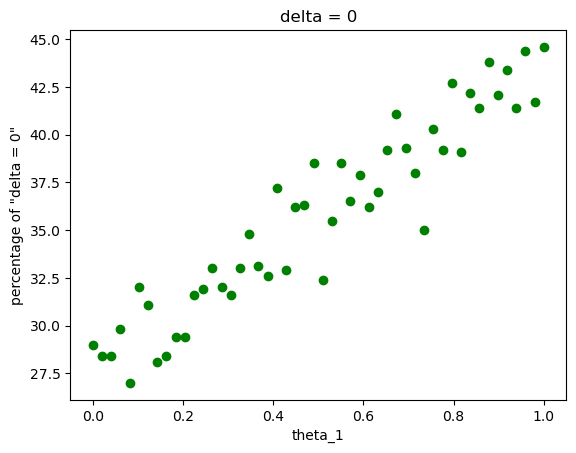

In [10]:
# As theta_1 goes from 1 to 0, plot how "delta=0" changes, and same with "star wins", 
# "branch 1 wins, fraction of 1s on branch 1", etc.

# cnt_1: branch 2 wins
# cnt_2: branch 3 wins
# cnt_3: branch 1 wins 
# cnt_0: delta = 0
# cnt_4 - cnt_0 : star wins

divisor = 1000//100
cnt_1_frac = [x/divisor for x in cnt_1]                       # branch 2 wins
cnt_2_frac = [x/divisor for x in cnt_2]                       # branch 3 wins
cnt_3_frac = [x/divisor for x in cnt_3]                       # branhc 1 wins
cnt_0_frac = [x/divisor for x in cnt_0]                       # delta = 0
cnt_4_frac = [(a - b)/divisor for a, b in zip(cnt_4, cnt_0)]  # star wins

# print(cnt_1_frac)

plt.scatter(h1_range, cnt_0_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"delta = 0\"')
plt.title('delta = 0')

plt.show()
# more clear, increasing
# range is wider, up to 45

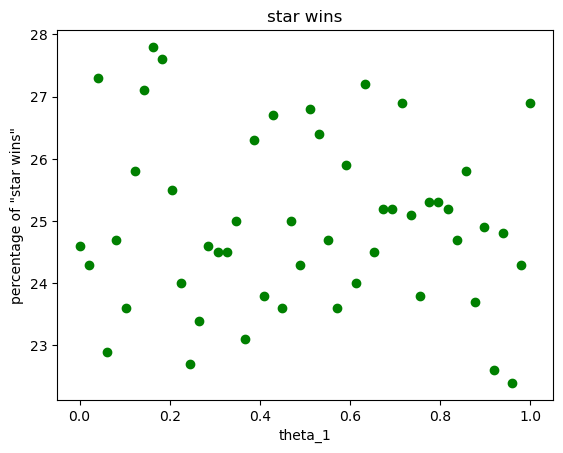

In [11]:
plt.scatter(h1_range, cnt_4_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"star wins\"')
plt.title('star wins')

plt.show()
# flat, around 25, three plots of "star wins" stay the same

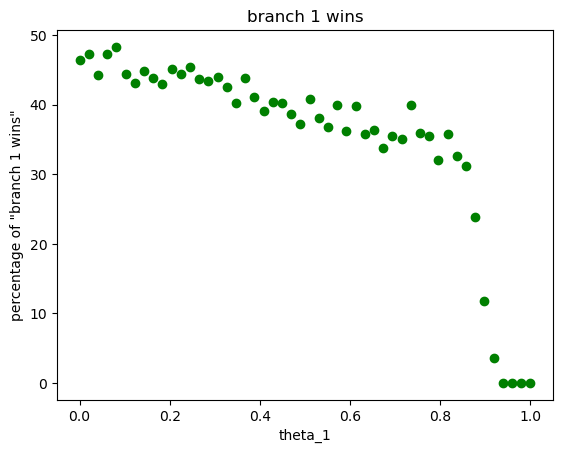

In [12]:
plt.scatter(h1_range, cnt_3_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 1 wins\"')
plt.title('branch 1 wins')

plt.show()
# move from the plot of "branch 1 wins" with theta2, 3 = 0.5 位移

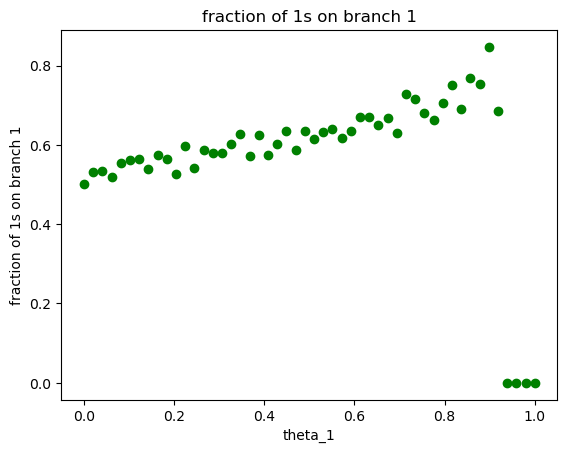

In [13]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_1_unique[u])):
        if theta_1_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_1_unique[u]) > 0: # when bracnch 1 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_1_unique[u]))
    elif len(theta_1_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 1 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 1')
plt.title('fraction of 1s on branch 1')

plt.show()

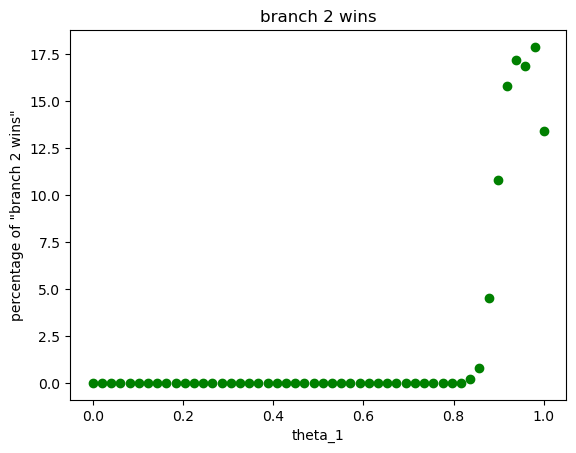

In [14]:
plt.scatter(h1_range, cnt_1_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 2 wins\"')
plt.title('branch 2 wins')

plt.show()

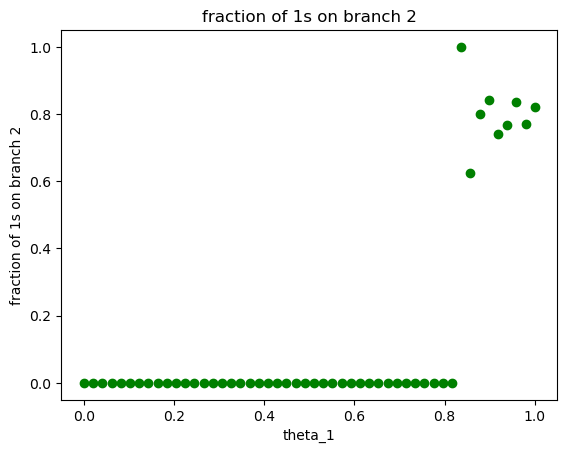

In [15]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_2_unique[u])):
        if theta_2_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_2_unique[u]) > 0: # when bracnch 2 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_2_unique[u]))
    elif len(theta_2_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 2 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 2')
plt.title('fraction of 1s on branch 2')

plt.show()

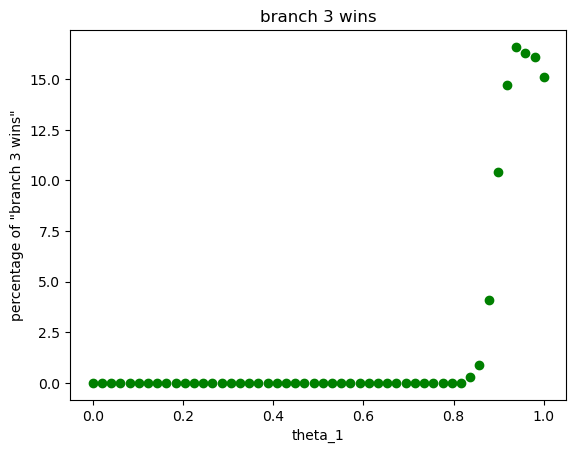

In [16]:
plt.scatter(h1_range, cnt_2_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 3 wins\"')
plt.title('branch 3 wins')

plt.show()

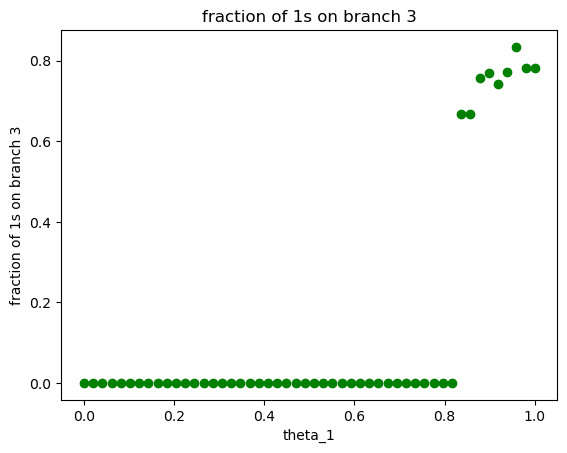

In [17]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_3_unique[u])):
        if theta_3_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_3_unique[u]) > 0: # when bracnch 3 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_3_unique[u]))
    elif len(theta_3_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 3 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 3')
plt.title('fraction of 1s on branch 3')

plt.show()